# Machine learning project

## TOC:
* [First Bullet Header](#first-bullet)
* [Second Bullet Header](#second-bullet)

# Imports

In [1]:
# UNCOMMENT THESE IF A LIBRARY IS MISSING
# ! pip install scikit-optimize
# ! pip install skfeature-chappers
# ! pip install mlxtend
# ! pip install imblearn

In [2]:
# import libraries/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
import itertools
import graphviz
import pydotplus
from sklearn.linear_model import LogisticRegression, RidgeCV
from math import ceil, floor
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFE, VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,ClusterCentroids
from imblearn.over_sampling import RandomOverSampler,SMOTE,SMOTEN,SMOTENC, ADASYN
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV,LogisticRegression,LogisticRegressionCV,SGDClassifier,Perceptron,PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.semi_supervised import LabelPropagation,LabelSpreading
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB

# source code: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# ignore warning messages
import warnings
warnings.filterwarnings("ignore")

# Data exploration

In [3]:
# import datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# number of rows and features in train and test set
nr_train_rows, nr_train_features = train.shape
nr_test_rows, nr_test_features = test.shape
print(f"Train set: {nr_train_rows} rows, {nr_train_features} features")
print(f"Test set : {nr_test_rows} rows, {nr_test_features} features")

Train set: 9999 rows, 17 features
Test set : 2300 rows, 16 features


In [5]:
train.head()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  102863333  21-Mar-20                 0                  0.0          0   
1  103117814  20-May-20                 0                  0.0          0   
2  103201891   4-Dec-20                 0                  0.0          0   
3  103226087  22-Dec-20                 0                  0.0          0   
4  103234445  24-Nov-20                 0                  0.0          2   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0              3           64.0000                      0.0000   
1           0.0             23          684.5000                      0.0217   
2           0.0              8           95.0000                      0.0250   
3           0.0              9          608.7500                      0.0000   
4         386.0             36         1609.9397                      0.0000   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0667                     0.0000   MacOSX        2   
1                    0.0449                     0.0000  Windows        2   
2                    0.0583                     0.0000  Windows        4   
3                    0.0250                    42.4225  Windows        2   
4                    0.0093                    12.5033  Windows        2   

          Country  Type_of_Traffic Type_of_Visitor  Buy  
0        Portugal                1        Returner    0  
1          France                6        Returner    0  
2           Italy                1        Returner    0  
3  United Kingdom                2        Returner    1  
4           Spain                3        Returner    1

In [6]:
train.dtypes

Access_ID                       int64
Date                           object
AccountMng_Pages                int64
AccountMng_Duration           float64
FAQ_Pages                       int64
FAQ_Duration                  float64
Product_Pages                   int64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
OS                             object
Browser                         int64
Country                        object
Type_of_Traffic                 int64
Type_of_Visitor                object
Buy                             int64
dtype: object

In [7]:
train.describe(include = "all").T

count unique        top  freq              mean  \
Access_ID                   9999.0    NaN        NaN   NaN  451972765.779278   
Date                          9999    305  25-May-20   120               NaN   
AccountMng_Pages            9999.0    NaN        NaN   NaN          2.324232   
AccountMng_Duration         9999.0    NaN        NaN   NaN         81.205854   
FAQ_Pages                   9999.0    NaN        NaN   NaN          0.508051   
FAQ_Duration                9999.0    NaN        NaN   NaN         34.559101   
Product_Pages               9999.0    NaN        NaN   NaN         31.685869   
Product_Duration            9999.0    NaN        NaN   NaN        1199.76943   
GoogleAnalytics_BounceRate  9999.0    NaN        NaN   NaN          0.022305   
GoogleAnalytics_ExitRate    9999.0    NaN        NaN   NaN          0.043181   
GoogleAnalytics_PageValue   9999.0    NaN        NaN   NaN           5.96312   
OS                            9999      8    Windows  5361               NaN   
Browser                     9999.0    NaN        NaN   NaN          2.352535   
Country                       9999      9   Portugal  3870               NaN   
Type_of_Traffic             9999.0    NaN        NaN   NaN          3.957496   
Type_of_Visitor               9999      3   Returner  8534               NaN   
Buy                         9999.0    NaN        NaN   NaN          0.155216   

                                         std          min          25%  \
Access_ID                   202498979.648277  102863333.0  273194966.0   
Date                                     NaN          NaN          NaN   
AccountMng_Pages                    3.340676          0.0          0.0   
AccountMng_Duration               179.715545          0.0          0.0   
FAQ_Pages                            1.27939          0.0          0.0   
FAQ_Duration                      139.796989          0.0          0.0   
Product_Pages                      44.550277          0.0          7.0   
Product_Duration                 1958.276304          0.0     183.5625   
GoogleAnalytics_BounceRate          0.048776          0.0          0.0   
GoogleAnalytics_ExitRate            0.048845          0.0       0.0143   
GoogleAnalytics_PageValue          18.753626          0.0          0.0   
OS                                       NaN          NaN          NaN   
Browser                             1.715698          1.0          2.0   
Country                                  NaN          NaN          NaN   
Type_of_Traffic                     3.675159          1.0          2.0   
Type_of_Visitor                          NaN          NaN          NaN   
Buy                                 0.362128          0.0          0.0   

                                    50%          75%          max  
Access_ID                   453616869.0  625975569.5  798444008.0  
Date                                NaN          NaN          NaN  
AccountMng_Pages                    1.0          4.0         27.0  
AccountMng_Duration                 7.5     92.20835      3398.75  
FAQ_Pages                           0.0          0.0         24.0  
FAQ_Duration                        0.0          0.0     2549.375  
Product_Pages                      18.0         38.0        705.0  
Product_Duration                  599.0    1470.2708   63973.5222  
GoogleAnalytics_BounceRate       0.0032       0.0168          0.2  
GoogleAnalytics_ExitRate         0.0251         0.05          0.2  
GoogleAnalytics_PageValue           0.0          0.0     361.7637  
OS                                  NaN          NaN          NaN  
Browser                             2.0          2.0         13.0  
Country                             NaN          NaN          NaN  
Type_of_Traffic                     2.0          4.0         15.0  
Type_of_Visitor                     NaN          NaN          NaN  
Buy                                 0.0          0.0          1.0

In [8]:
test.head()

Access_ID       Date  AccountMng_Pages  AccountMng_Duration  FAQ_Pages  \
0  798519314  24-Aug-20                 0                 0.00          0   
1  798663101  25-May-20                 2                37.50          0   
2  798663221   2-Nov-20                 0                 0.00          0   
3  798760918  14-May-20                 0                 0.00          0   
4  798856982   5-Nov-20                12               225.25          1   

   FAQ_Duration  Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
0           0.0             86         5332.5478                      0.0139   
1           0.0             55         1420.4725                      0.0012   
2           0.0             36          788.5000                      0.0000   
3           0.0              2          689.0000                      0.0000   
4           0.0            129         3367.0413                      0.0014   

   GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  Browser  \
0                    0.0654                     0.0000  Windows        2   
1                    0.0058                     0.0000  Android        1   
2                    0.0250                     0.0000  Windows        6   
3                    0.1000                     0.0000  Windows        2   
4                    0.0185                     1.0353  Windows        4   

    Country  Type_of_Traffic Type_of_Visitor  
0    Brazil                1        Returner  
1     Spain                4        Returner  
2     Spain                3        Returner  
3     Spain                2      New_Access  
4  Portugal               10        Returner

In [9]:
test.dtypes

Access_ID                       int64
Date                           object
AccountMng_Pages                int64
AccountMng_Duration           float64
FAQ_Pages                       int64
FAQ_Duration                  float64
Product_Pages                   int64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
OS                             object
Browser                         int64
Country                        object
Type_of_Traffic                 int64
Type_of_Visitor                object
dtype: object

In [10]:
test.describe(include = "all").T

count unique       top  freq              mean  \
Access_ID                   2300.0    NaN       NaN   NaN  880477916.422609   
Date                          2300    287  5-May-20    35               NaN   
AccountMng_Pages            2300.0    NaN       NaN   NaN              2.29   
AccountMng_Duration         2300.0    NaN       NaN   NaN         79.780933   
FAQ_Pages                   2300.0    NaN       NaN   NaN          0.486522   
FAQ_Duration                2300.0    NaN       NaN   NaN         34.266832   
Product_Pages               2300.0    NaN       NaN   NaN         31.928696   
Product_Duration            2300.0    NaN       NaN   NaN       1172.039254   
GoogleAnalytics_BounceRate  2300.0    NaN       NaN   NaN          0.021702   
GoogleAnalytics_ExitRate    2300.0    NaN       NaN   NaN          0.042565   
GoogleAnalytics_PageValue   2300.0    NaN       NaN   NaN          5.588465   
OS                            2300      8   Windows  1224               NaN   
Browser                     2300.0    NaN       NaN   NaN          2.366087   
Country                       2300      9  Portugal   895               NaN   
Type_of_Traffic             2300.0    NaN       NaN   NaN          4.012609   
Type_of_Visitor               2300      3  Returner  1988               NaN   

                                        std          min          25%  \
Access_ID                   47027503.411251  798519314.0  840149114.5   
Date                                    NaN          NaN          NaN   
AccountMng_Pages                     3.2523          0.0          0.0   
AccountMng_Duration              164.447609          0.0          0.0   
FAQ_Pages                          1.234311          0.0          0.0   
FAQ_Duration                     145.500683          0.0          0.0   
Product_Pages                     44.150226          0.0          8.0   
Product_Duration                1702.730695          0.0      186.875   
GoogleAnalytics_BounceRate         0.047214          0.0          0.0   
GoogleAnalytics_ExitRate           0.047539          0.0     0.014275   
GoogleAnalytics_PageValue         17.781708          0.0          0.0   
OS                                      NaN          NaN          NaN   
Browser                            1.701233          1.0          2.0   
Country                                 NaN          NaN          NaN   
Type_of_Traffic                    3.710291          1.0          2.0   
Type_of_Visitor                         NaN          NaN          NaN   

                                    50%           75%          max  
Access_ID                   880424357.0  920846849.25  962218682.0  
Date                                NaN           NaN          NaN  
AccountMng_Pages                    1.0           4.0         23.0  
AccountMng_Duration                8.55         97.85       2720.5  
FAQ_Pages                           0.0           0.0         12.0  
FAQ_Duration                        0.0           0.0    2252.0333  
Product_Pages                      18.0          38.0        534.0  
Product_Duration               598.6893   1439.535275   18504.1262  
GoogleAnalytics_BounceRate       0.0029       0.01675          0.2  
GoogleAnalytics_ExitRate         0.0252          0.05          0.2  
GoogleAnalytics_PageValue           0.0           0.0     258.5499  
OS                                  NaN           NaN          NaN  
Browser                             2.0           2.0         13.0  
Country                             NaN           NaN          NaN  
Type_of_Traffic                     2.0           4.0         15.0  
Type_of_Visitor                     NaN           NaN          NaN

In [11]:
# checking object types for typos or strange symbols
object_feats = ["OS", "Country", "Type_of_Visitor"]
dfs = [
    ("Train", train),
    ("Test", test)
]

for name, df in dfs:
    for feat in object_feats:
        print(f"{name} - {feat} categories:", df[feat].unique())

Train - OS categories: ['MacOSX' 'Windows' 'Android' 'Ubuntu' 'iOS' 'Other' 'Fedora' 'Chrome OS']
Train - Country categories: ['Portugal' 'France' 'Italy' 'United Kingdom' 'Spain' 'Other' 'Brazil'
 'Switzerland' 'Germany']
Train - Type_of_Visitor categories: ['Returner' 'New_Access' 'Other']
Test - OS categories: ['Windows' 'Android' 'MacOSX' 'iOS' 'Fedora' 'Chrome OS' 'Other' 'Ubuntu']
Test - Country categories: ['Brazil' 'Spain' 'Portugal' 'Germany' 'France' 'Italy' 'United Kingdom'
 'Switzerland' 'Other']
Test - Type_of_Visitor categories: ['Returner' 'New_Access' 'Other']


In [12]:
# exploring countries with the most website accesses
print(train.groupby("Country").size().sort_values())

accesses_pt = train.groupby("Country").size()["Portugal"]
accesses_es = train.groupby("Country").size()["Spain"]
accesses_br = train.groupby("Country").size()["Brazil"]
pc_ptes = round((accesses_pt + accesses_es)/train.groupby("Country").size().sum() * 100, 2)
pc_brazil = round((accesses_br)/train.groupby("Country").size().sum() * 100, 2)

print(f"Online store accesses (PT + ES): {accesses_pt + accesses_es} ({pc_ptes} %)")
print(f"Onliny store accesses (BR): {accesses_br} ({pc_brazil}) %")

Country
Switzerland        263
Germany            350
United Kingdom     429
Italy              613
Other              659
France             923
Brazil             947
Spain             1945
Portugal          3870
dtype: int64
Online store accesses (PT + ES): 5815 (58.16 %)
Onliny store accesses (BR): 947 (9.47) %


In [13]:
# exploring most used OS
total_accesses = len(train)
os_counts = train.groupby("OS").size().sort_values()
windows_count = os_counts["Windows"]
mac_count = os_counts["MacOSX"]
android_count = os_counts["Android"]
ios_count = os_counts["iOS"]
print(os_counts)
print(f"Windows and MacOS accesses: {round((windows_count + mac_count)/total_accesses*100, 2)} %")

# exploring devices (inferred by OS)
computer_accesses = os_counts[["Fedora", "Chrome OS", "Ubuntu", "MacOSX", "Windows"]].sum()
mobile_accesses = os_counts[["iOS", "Android"]].sum()

OS
Fedora          3
Other           5
Chrome OS      15
Ubuntu         68
iOS           378
MacOSX       2065
Android      2104
Windows      5361
dtype: int64
Windows and MacOS accesses: 74.27 %


In [14]:
# exploring visitor types
visitor_counts = train.groupby("Type_of_Visitor").size().sort_values()
print(visitor_counts)

new_count = visitor_counts["New_Access"]
r_count = visitor_counts["Returner"]

print(f"Returning customers: {round(r_count/total_accesses * 100, 2)} %")
print(f"New visitors: {round(r_count/total_accesses * 100, 2)} %")

Type_of_Visitor
Other           74
New_Access    1391
Returner      8534
dtype: int64
Returning customers: 85.35 %
New visitors: 85.35 %


In [15]:
# Series with countries ordered by number of accesses
country_accesses = train[["Country", "Buy"]].groupby("Country").size().sort_values(ascending = False)
country_accesses

# Series with OS ordered by number of accesses
os_accesses = train[["OS", "Buy"]].groupby("OS").size().sort_values(ascending = False)
os_accesses

OS
Windows      5361
Android      2104
MacOSX       2065
iOS           378
Ubuntu         68
Chrome OS      15
Other           5
Fedora          3
dtype: int64

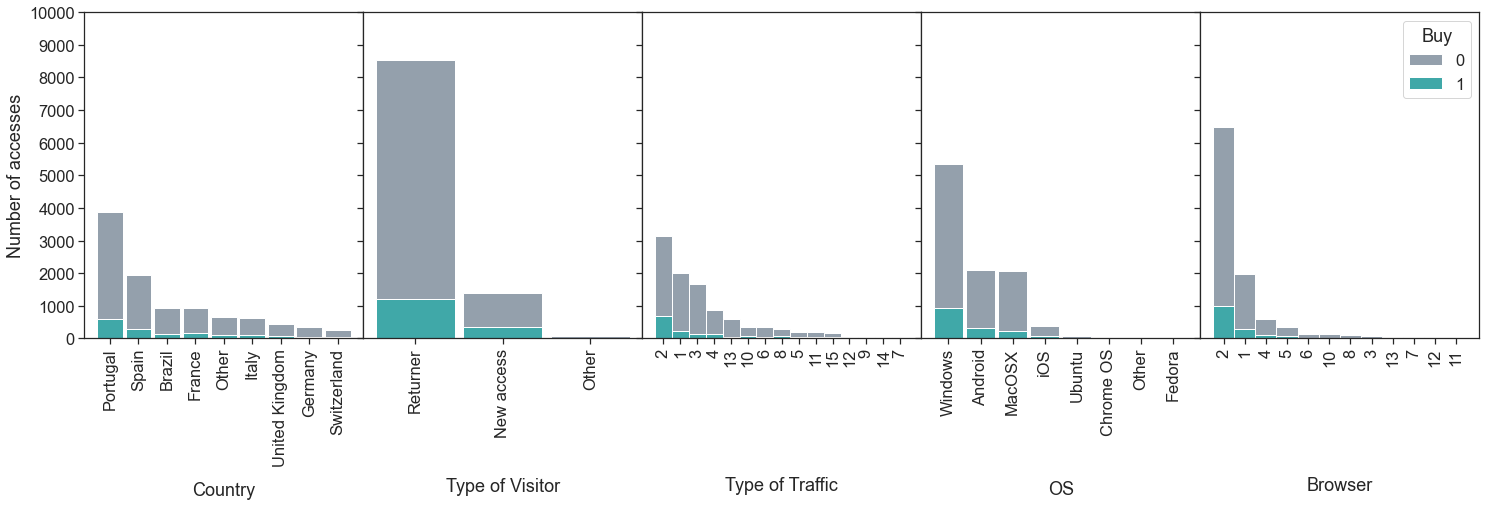

In [16]:
# setting a custom order for the categorical features (histplots do not take an "order" argument)
# customer order countries
country_order = ["Portugal", "Spain", "Brazil", "France", "Other", "Italy", "United Kingdom", "Germany",  "Switzerland"]
ordered_countries = train[["Country", "Buy"]].copy()
ordered_countries["C"] = pd.Categorical(
    ordered_countries["Country"],
    country_order)
ordered_countries = ordered_countries.sort_values("C")

# custom order OS
os_order = ["Windows", "Android", "MacOSX", "iOS", "Ubuntu", "Chrome OS", "Other", "Fedora"]
ordered_os = train[["OS", "Buy"]].copy()
ordered_os["O"] = pd.Categorical(
    ordered_os["OS"],
    os_order
)
ordered_os = ordered_os.sort_values("O")

# custom order Browser
browser_order = ["2", "1", "4", "5", "6", "10", "8", "3", "13", "7", "12", "11"]
ordered_browser = train[["Browser", "Buy"]].copy()
ordered_browser["Browser"] = ordered_browser["Browser"].astype("str")
ordered_browser["B"] = pd.Categorical(
    ordered_browser["Browser"],
    browser_order
)
ordered_browser = ordered_browser.sort_values("B")

# customer order Type of Traffic
traffic_order = ["2", "1", "3", "4", "13", "10", "6", "8", "5", "11", "15", "12", "9", "14", "7"]
ordered_traffic = train[["Type_of_Traffic", "Buy"]].copy()
ordered_traffic["Type_of_Traffic"] = ordered_traffic["Type_of_Traffic"].astype("str")
ordered_traffic["T"] = pd.Categorical(
    ordered_traffic["Type_of_Traffic"].astype("category"),
    traffic_order
)
ordered_traffic = ordered_traffic.sort_values("T")

# image compiling data exploration insights: country, visitor types, OS/device
country_ordered = train[["Country", "Buy"]].groupby("Country").sum

sns.set(style = "ticks", font_scale = 1.5)
fig, axes = plt.subplots(1, 5, figsize = [25, 6])
plt.subplots_adjust(wspace=0, hspace=0)
i = 1
for ax in axes.flatten():
    if i == 1:
        sns.histplot(
            ordered_countries,
            x = "Country",
            hue = "Buy",
            shrink = 0.9,
            multiple = "stack",
            palette = ["slategray", "darkcyan"],
            ax = ax
        )
        ax.set_ylabel("Number of accesses")
        ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
        ax.set_xlabel("Country", labelpad = 15)
        ax.set_xticklabels(country_order, rotation = 90)
        ax.get_legend().set_visible(False)
        
    if i == 2:
        sns.histplot(
            train,
            x = "Type_of_Visitor",
            hue = "Buy",
            shrink = 0.9,
            multiple = "stack",
            palette = ["slategray", "darkcyan"],
            ax = ax
        )
        ax.set_ylabel(None)
        ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
        ax.yaxis.set_ticklabels([])
        ax.set_xlabel("Type of Visitor", labelpad = 40)
        ax.set_xticklabels(["Returner", "New access", "Other"], rotation = 90)
        ax.get_legend().set_visible(False)

    if i == 3:
        sns.histplot(
            ordered_traffic,
            x = "Type_of_Traffic",
            hue = "Buy",
            # shrink = 0.9,
            multiple = "stack",
            palette = ["slategray", "darkcyan"],
            ax = ax
        )
        ax.set_ylabel(None)
        ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
        ax.yaxis.set_ticklabels([])
        ax.set_xlabel("Type of Traffic", labelpad = 110)
        ax.set_xticklabels(traffic_order, rotation = 90)
        ax.get_legend().set_visible(False)

    if i == 4:
        sns.histplot(
            ordered_os,
            x = "OS",
            hue = "Buy",
            shrink = 0.9,
            multiple = "stack",
            palette = ["slategray", "darkcyan"],
            ax = ax
        )
        ax.set_ylabel(None)
        ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
        ax.yaxis.set_ticklabels([])
        ax.set_xlabel("OS", labelpad = 45)
        ax.set_xticklabels(os_order, rotation = 90)
        ax.get_legend().set_visible(False)

    if i == 5:
        sns.histplot(
            ordered_browser,
            x = "Browser",
            hue = "Buy",
            # shrink = 0.9,
            multiple = "stack",
            palette = ["slategray", "darkcyan"],
            ax = ax
        )
        ax.set_ylabel(None)
        ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
        ax.yaxis.set_ticklabels([])
        ax.set_xlabel("Browser", labelpad = 110)
        ax.set_xticklabels(browser_order, rotation = 90)

    i += 1

plt.savefig('Fig2_Initial_Train_Cat_Exploration.jpeg', dpi=300, bbox_inches='tight')

In [17]:
# exploring relationship between number of accesses to the online store and covid cases (used as a proxy for lockdown/stricter measures)
# to get covid data: https://ourworldindata.org/coronavirus/country/portugal
covid = pd.read_csv("owid-covid-data.csv")

# get information for Portugal that is not NaN
portugal_covid = covid[covid.iso_code == "PRT"][["location", "date", "total_cases", "new_cases"]]
portugal_covid = portugal_covid[~portugal_covid.new_cases.isna()]

# convert date from object to datetime, get only available information for the year 2020
portugal_covid["date"] = pd.to_datetime(portugal_covid["date"], format = "%Y-%m-%d")
portugal_covid = portugal_covid[portugal_covid["date"].between("2020-01-01", "2020-12-31")]

# convert train Date to datetime
train.Date = pd.to_datetime(train.Date, format = "%d-%b-%y")

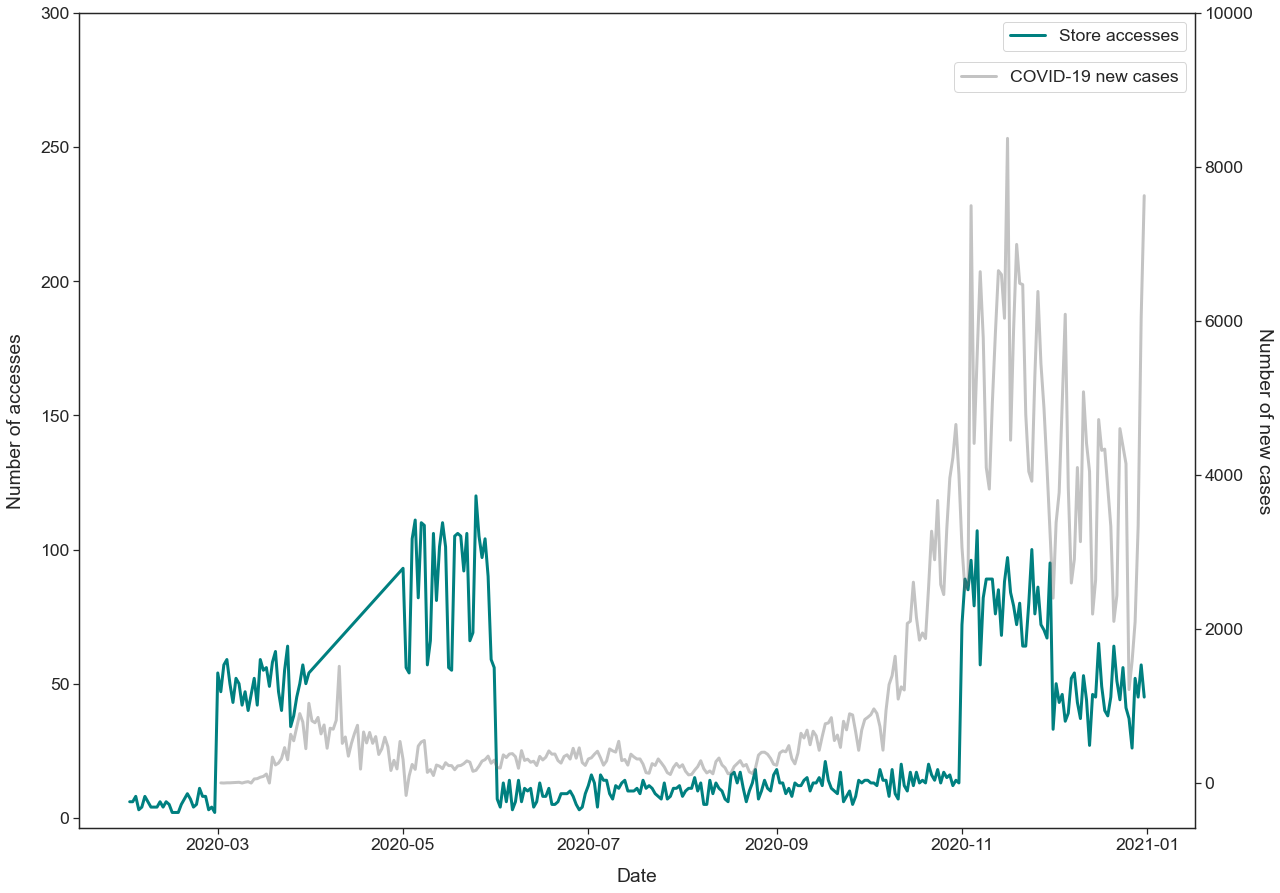

In [18]:
sns.set(style = "ticks", font_scale = 1.6)
# plot new cases and number of accesses to the website
fig, ax1 = plt.subplots(1, 1, figsize = [20, 15])

ax1.plot_date(
    train.groupby("Date").size().index,
    train.groupby("Date").size().values,
    color="teal",
    marker=None,
    label="Store accesses",
    linewidth=3,
    linestyle="-")
ax2 = ax1.twinx()
ax2.plot_date(
    portugal_covid.groupby("date").size().index,
    portugal_covid.groupby("date").mean().new_cases,
    color="dimgray",
    marker = "None",
    alpha = 0.4,
    label="COVID-19 new cases",
    linewidth=3,
    linestyle="-")

ax1.set_xlabel("Date", labelpad = 15)
ax1.set_ylabel("Number of accesses", labelpad = 15)
ax2.set_ylabel("Number of new cases", rotation = 270, labelpad = 20)
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])
ax2.set_yticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.legend(bbox_to_anchor=(1.00, 1.0))
ax2.legend(bbox_to_anchor=(1.00, 0.95))

# plt.savefig('cases_accesses.jpeg', dpi=300, bbox_inches='tight')

# Data preprocessing

In [19]:
def plot_multiple(df, features, plot_type, fig_dimensions = [15, 8], nr_rows = 1, save_img = "no", fig_name = None):

    sns.set(style = "ticks", font_scale = 1.4)

    fig, axes = plt.subplots(nr_rows, ceil(len(features) / nr_rows), figsize = fig_dimensions)
    
    # iterate through axes and associate each plot to one
    for ax, feat in zip(axes.flatten(), features):
        if (plot_type.lower() == "box") or (plot_type.lower() == "boxplot"):
            sns.boxplot(
                data = df,
                x = feat,
                color = "darkcyan",
                ax = ax
            )

        if (plot_type.lower() == "violin" or (plot_type.lower() == "violinplot")):
            sns.violinplot(
                data = df,
                x = feat,
                color = "darkcyan",
                ax = ax
            )

        if (plot_type.lower() == "histogram" or (plot_type.lower() == "histplot")):
            fig.subplots_adjust(hspace=0.3, wspace = 0.5)
            sns.histplot(
                data = df,
                x = feat,
                color = "darkcyan",
                ax = ax
            )

        ax.set_ylabel("Number of accesses")

    if save_img.lower() == "yes":
        plt.savefig(fig_name + '.jpeg', dpi=300, bbox_inches='tight')

    plt.show()

    return

In [20]:
def change_dtypes(df):

    # Date to datetime
    df.Date = pd.to_datetime(df.Date, format = "%d-%b-%y")

    # change features to categorical
    df.Browser = df.Browser.astype("category")
    df.Type_of_Traffic = df.Type_of_Traffic.astype("category")
    df.OS = df.OS.astype("category")
    df.Type_of_Visitor = df.Type_of_Visitor.astype("category")
    df.Country = df.Country.astype("category")
    
    return df

In [21]:
def remove_outliers(df, filters):

    # create a separate dataframe for the outliers
    outliers = pd.DataFrame()

    # remove outliers from main dataframe
    # add outliers to a separate dataframe
    for filter_ in filters:
        outliers = outliers.append(df[filter_])
        df = df[~filter_]

    return (df, outliers)

In [22]:
def corr_heatmap(df, corrlimit, method = "pearson"):

    '''
    Takes in a dataframe, df, and a coefficient, method,
    as arguments and creates a correlation heatmap showing
    the correlations between all pairs of features in the
    dataframe.
    '''

    sns.set(style = "ticks", font_scale = 1.2)
    plt.subplots(figsize = (20, 15))

    mask = np.triu(np.ones_like(df.corr(method = method), dtype = bool))
    correlationmatrix=df.corr(method = method)
    annot_labels = correlationmatrix
    annot_mask = abs(correlationmatrix) <corrlimit
    annot_labels=round(annot_labels,2).astype(str)
    annot_labels[annot_mask] ='' 
    corr_heatmap = sns.heatmap(correlationmatrix, mask = mask, vmin = -1, vmax = 1, annot = annot_labels, cmap = 'BrBG',fmt='')
    corr_heatmap.set_title(method.capitalize() + ' Correlation Heatmap', fontdict = {'fontsize': 14}, pad = 8)

    return

## First steps

In [23]:
len(train.Access_ID.unique())

9999

In [24]:
# set Access_ID as index
train.set_index("Access_ID", inplace = True)
test.set_index("Access_ID", inplace = True)

In [25]:
# check for duplicated rows in training set
print("Number of duplicated rows in training set:", len(train[train.duplicated()]))
print("Removing duplicates...")
train = train[~train.duplicated()]
print("Number of duplicated rows in training set:", len(train[train.duplicated()]))

# save length of the original dataframe (after duplicate removal)
train_initial_length = len(train)

# change data types
train = change_dtypes(train)
test = change_dtypes(test)
train.dtypes

Number of duplicated rows in training set: 14
Removing duplicates...
Number of duplicated rows in training set: 0


Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                  category
Browser                             category
Country                             category
Type_of_Traffic                     category
Type_of_Visitor                     category
Buy                                    int64
dtype: object

In [26]:
# split for inhouse validation (create a validation set without relying on Kaggle)
X_train_inhouse, X_val_inhouse, y_train_inhouse, y_val_inhouse = train_test_split(
    train.drop(columns = "Buy"), 
    train.Buy, 
    test_size = 0.2, 
    random_state = 15,
    stratify = train.Buy
)

train_inhouse = pd.concat([X_train_inhouse, y_train_inhouse], axis = 1)
train_inhouse_initial_length = len(train_inhouse)

In [27]:
print(f"Number of rows in the inhouse train dataset: {train_inhouse_initial_length}")
print(f"Number of rows in the inhouse validation dataset: {len(X_val_inhouse)}")

Number of rows in the inhouse train dataset: 7988
Number of rows in the inhouse validation dataset: 1997


## Feature creation and cross-field validation

In [28]:
def feature_creator(df):

    '''
    Takes in the train dataframe, df, and extracts
    the day of the week and the month from the Date
    column
    '''

    initial_cols = list(df.columns)

    # create column for day of the week, month, and weekend binary
    week_days = df["Date"].dt.dayofweek
    weekend = [1 if ((x == 5) or (x == 6)) else 0 for x in df.Date.dt.dayofweek]
    months = df["Date"].dt.month
    df["Week_Day"] = week_days.astype("category")
    df["Month"] = months.astype("category")
    df["Weekend"] = weekend
    df["Weekend"] = df["Weekend"].astype("category")

    # create column for meteorological season
    # meteorological seasons start at the first day of the months that include the equinoxes/solstices
    month_to_season = {
        1: "Winter",
        2: "Winter",
        3: "Spring",
        4: "Spring",
        5: "Spring",
        6: "Summer",
        7: "Summer",
        8: "Summer",
        9: "Autumn",
        10: "Autumn",
        11: "Autumn",
        12: "Winter"
    }
    season_mapper = {
        "Spring": 1,
        "Summer": 2,
        "Autumn": 3,
        "Winter": 4
    }
    df["Season"] = df.Month.apply(month_to_season.get)
    df["Season"].replace(season_mapper, inplace = True)
    df["Season"] = df["Season"].astype("category")

    # create a device column inferred from the OS used to access the pages
    device_mapper = {
        "Windows": "Desktop",
        "Android": "Mobile",
        "MacOSX": "Desktop",
        "iOS": "Mobile",
        "Ubuntu": "Desktop",
        "Chrome OS": "Desktop",
        "Fedora": "Desktop",
        "Other": "Other"       
    }
    df["Device"] = df.OS.apply(device_mapper.get)
    df["Device"] = df.Device.astype("category")

    # average duration spent on each page
    df["Mng_AvgDuration"] = (df.AccountMng_Duration/df.AccountMng_Pages).replace(np.nan, 0)
    df["Product_AvgDuration"] = (df.Product_Duration/df.Product_Pages).replace(np.nan, 0)
    df["FAQ_AvgDuration"] = (df.FAQ_Duration/df.FAQ_Pages).replace(np.nan, 0)

    # create a Total_Pages feature
    total_pages = df.AccountMng_Pages + df.FAQ_Pages + df.Product_Pages
    df["Total_Pages"] = total_pages

    # create a Total_Duration feature
    total_durations = df.AccountMng_Duration + df.FAQ_Duration + df.Product_Duration
    df["Total_Duration"] = total_durations

    # create an average time spent in each page (includes Product and Mng)
    df["Avg_Duration"] = (df.Total_Duration/df.Total_Pages).replace(np.nan, 0)

    new_cols = set(df.columns).difference(initial_cols)
    print(f"Created {len(new_cols)} new features:\n", new_cols)

    return df

In [29]:
# create new features for train and test
train = feature_creator(train)
test = feature_creator(test)

# create new features for inhouse train and validation
train_inhouse = feature_creator(train_inhouse)
X_val_inhouse = feature_creator(X_val_inhouse)

Created 11 new features:
 {'Total_Duration', 'Total_Pages', 'FAQ_AvgDuration', 'Season', 'Week_Day', 'Avg_Duration', 'Device', 'Mng_AvgDuration', 'Weekend', 'Product_AvgDuration', 'Month'}
Created 11 new features:
 {'Total_Duration', 'Total_Pages', 'Season', 'FAQ_AvgDuration', 'Week_Day', 'Avg_Duration', 'Device', 'Mng_AvgDuration', 'Weekend', 'Product_AvgDuration', 'Month'}
Created 11 new features:
 {'Total_Duration', 'Total_Pages', 'FAQ_AvgDuration', 'Season', 'Week_Day', 'Avg_Duration', 'Device', 'Mng_AvgDuration', 'Weekend', 'Product_AvgDuration', 'Month'}
Created 11 new features:
 {'Total_Duration', 'Total_Pages', 'Season', 'FAQ_AvgDuration', 'Week_Day', 'Avg_Duration', 'Device', 'Mng_AvgDuration', 'Weekend', 'Product_AvgDuration', 'Month'}


In [30]:
# Coherence checks for train
train_incoherences = pd.DataFrame()

# an individual needs to visit at least 1 page to be considered a potential buyer
# there are 6 observations without a single visit
train_incoherences = train_incoherences.append(train[train.Total_Pages == 0])
train = train[~(train.Total_Pages == 0)]

# strange that people can visit > 0 pages and yet have a duration of 0
# too many observations to remove, indicates something systematic -> will impute
# might happen because in some cases no info about time spent on page can be retrieved
# train[(train.AccountMng_Pages != 0) & (train.AccountMng_Duration == 0)]
# train[(train.FAQ_Pages != 0) & (train.FAQ_Duration == 0)]
# train[(train.Product_Pages != 0) & (train.Product_Duration == 0)]

# Coherence checks for inhouse train
train_inhouse_incoherences = pd.DataFrame()
train_inhouse_incoherences = train_inhouse_incoherences.append(train_inhouse[train_inhouse.Total_Pages == 0])
train_inhouse = train_inhouse[~(train_inhouse.Total_Pages == 0)]

In [31]:
# updating metric and non-metric features (same for all of the previous dataframes)
metric_features = list(train.select_dtypes(include = [np.number]).columns.drop(["Buy"]))
non_metric_features = list(train.select_dtypes(exclude = [np.number]).columns.drop("Date"))

print(f"{len(metric_features)} metric features:", metric_features)
print(f"{len(non_metric_features)} non-metric features:", non_metric_features)

15 metric features: ['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Mng_AvgDuration', 'Product_AvgDuration', 'FAQ_AvgDuration', 'Total_Pages', 'Total_Duration', 'Avg_Duration']
10 non-metric features: ['OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'Week_Day', 'Month', 'Weekend', 'Season', 'Device']


## Outlier removal

In [32]:
def remove_minor_categories(df):

    '''
    Remove categories with very little representation
    in the non metric features of the dataframe passed as argument.
    '''

    initial_len = len(df)
    cat_out = pd.DataFrame()

    # changing from categorical to int to freely modify categories
    df.OS = df.OS.astype("str")
    df.Browser = df.Browser.astype("int")
    df.Country = df.Country.astype("str")
    df.Type_of_Traffic = df.Type_of_Traffic.astype("int")
    df.Type_of_Visitor = df.Type_of_Visitor.astype("str")
    df.Device = df.Device.astype("str")
    
    # Device
    #  remove Other
    cat_out = cat_out.append(df[df.Device == "Other"])
    df = df[df.Device != "Other"]

    # OS
    # remove minority categories
    filters_os = (
        (df.OS == "Ubuntu")
        | (df.OS == "Fedora")
        | (df.OS == "Chrome OS")
        | (df.OS == "Other")
    )
    cat_out = cat_out.append(df[filters_os])
    df = df[~filters_os]

    # Type_of_Visitor
    #  remove "Other"
    cat_out = cat_out.append(df[(df.Type_of_Visitor == "Other")])
    df = df[df.Type_of_Visitor != "Other"]

    # number of observations removed
    nr_removed = len(cat_out)
    pc_removed = round(len(cat_out) / initial_len * 100, 2)
    print(f"Removed {nr_removed} observations ({pc_removed}% of the initial dataset)")

    return (df, cat_out)

In [33]:
def merge_minor_categories(df, non_metric_features):

    # changing from categorical to int to freely modify categories
    df.OS = df.OS.astype("str")
    df.Browser = df.Browser.astype("int")
    df.Country = df.Country.astype("str")
    df.Type_of_Traffic = df.Type_of_Traffic.astype("int")
    # df.Type_of_Visitor = df.Type_of_Visitor.astype("str")

    # Browser
    #  merge any category that is not one of the major categories into a single label, 0 (Others)
    df.loc[~((df.Browser == 1) | (df.Browser == 2) | (df.Browser == 4) | (df.Browser == 5)), "Browser"] = 0

    # Country
    #  merge european countries (except Portugal and Spain) in a single category, Europe (4)
    # df.loc[((df.Country == 4) | (df.Country == 5) | (df.Country == 6) | (df.Country == 7) | (df.Country == 8)), "Country"] = 4

    # Type_of_Traffic
    #  merge minority categories into label 0 (Other)
    filters_traffic = (
        (df.Type_of_Traffic == 1)
        | (df.Type_of_Traffic == 2)
        | (df.Type_of_Traffic == 3)
        | (df.Type_of_Traffic == 4)
        | (df.Type_of_Traffic == 5)
        | (df.Type_of_Traffic == 6)
        | (df.Type_of_Traffic == 8)
        | (df.Type_of_Traffic == 10)
        | (df.Type_of_Traffic == 11)
        | (df.Type_of_Traffic == 13)
        | (df.Type_of_Traffic == 15) 
    )
    df.loc[~(filters_traffic), "Type_of_Traffic"] = 0

    return df

In [34]:
def encode_categories(df):

    # OS
    os_mapper = {
        "Windows": 1,
        "Android": 2,
        "MacOSX": 3,
        "iOS": 4,
        "Ubuntu": 5,
        "Chrome OS": 6,
        "Fedora": 7,
        "Other": 0  
    }
    df.OS.replace(os_mapper, inplace = True)

    # Device
    device_mapper = {
        "Desktop": 1,
        "Mobile": 2,
        "Other": 0
    }
    df.Device.replace(device_mapper, inplace = True)

    # Country
    country_mapper = {
            "Portugal": 1,
            "Spain": 2,
            "Brazil": 3,
            "France": 4,
            "Italy": 5,
            "United Kingdom": 6,
            "Germany": 7,
            "Switzerland": 8,
            "Other": 0    
    }
    df.Country.replace(country_mapper, inplace = True)

    # Type_of_Visitor
    visitor_mapper = {
        "Returner": 1,
        "New_Access": 2,
        "Other": 0
    }
    df.Type_of_Visitor.replace(visitor_mapper, inplace = True)

    # set data types to int (e.g., to enable SMOTE)
    df.OS = df.OS.astype("category")
    df.Browser = df.Browser.astype("category")
    df.Country = df.Country.astype("category")
    df.Type_of_Traffic = df.Type_of_Traffic.astype("category")
    df.Type_of_Visitor = df.Type_of_Visitor.astype("category")
    df.Device = df.Device.astype("category")
    

    return df

In [35]:
def plot_categoricals(df, non_metric_features, fig_name):

    sns.set(style = "ticks", font_scale = 1.4)
    fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize = [25, 15])
    fig.tight_layout(pad = 3)
    fig.subplots_adjust(hspace=0.3)
    for ax, feat in zip(axes.flatten(), non_metric_features):
        count = df.groupby(feat).size().sort_values(ascending = False)
        sns.barplot(
            x = count.index,
            y = count.values,
            palette = ['lightgray' if (x < max(count.values)) else 'darkcyan' for x in count.values],
            order = count.index,
            ax = ax)
        ax.set_xlabel(feat, fontsize = 14)
        ax.set_ylabel("Number of accesses", fontsize = 14)
        ax.set_xticklabels(count.index, rotation = 45)

    plt.savefig(fig_name + '.jpeg', dpi=300, bbox_inches='tight')

    return

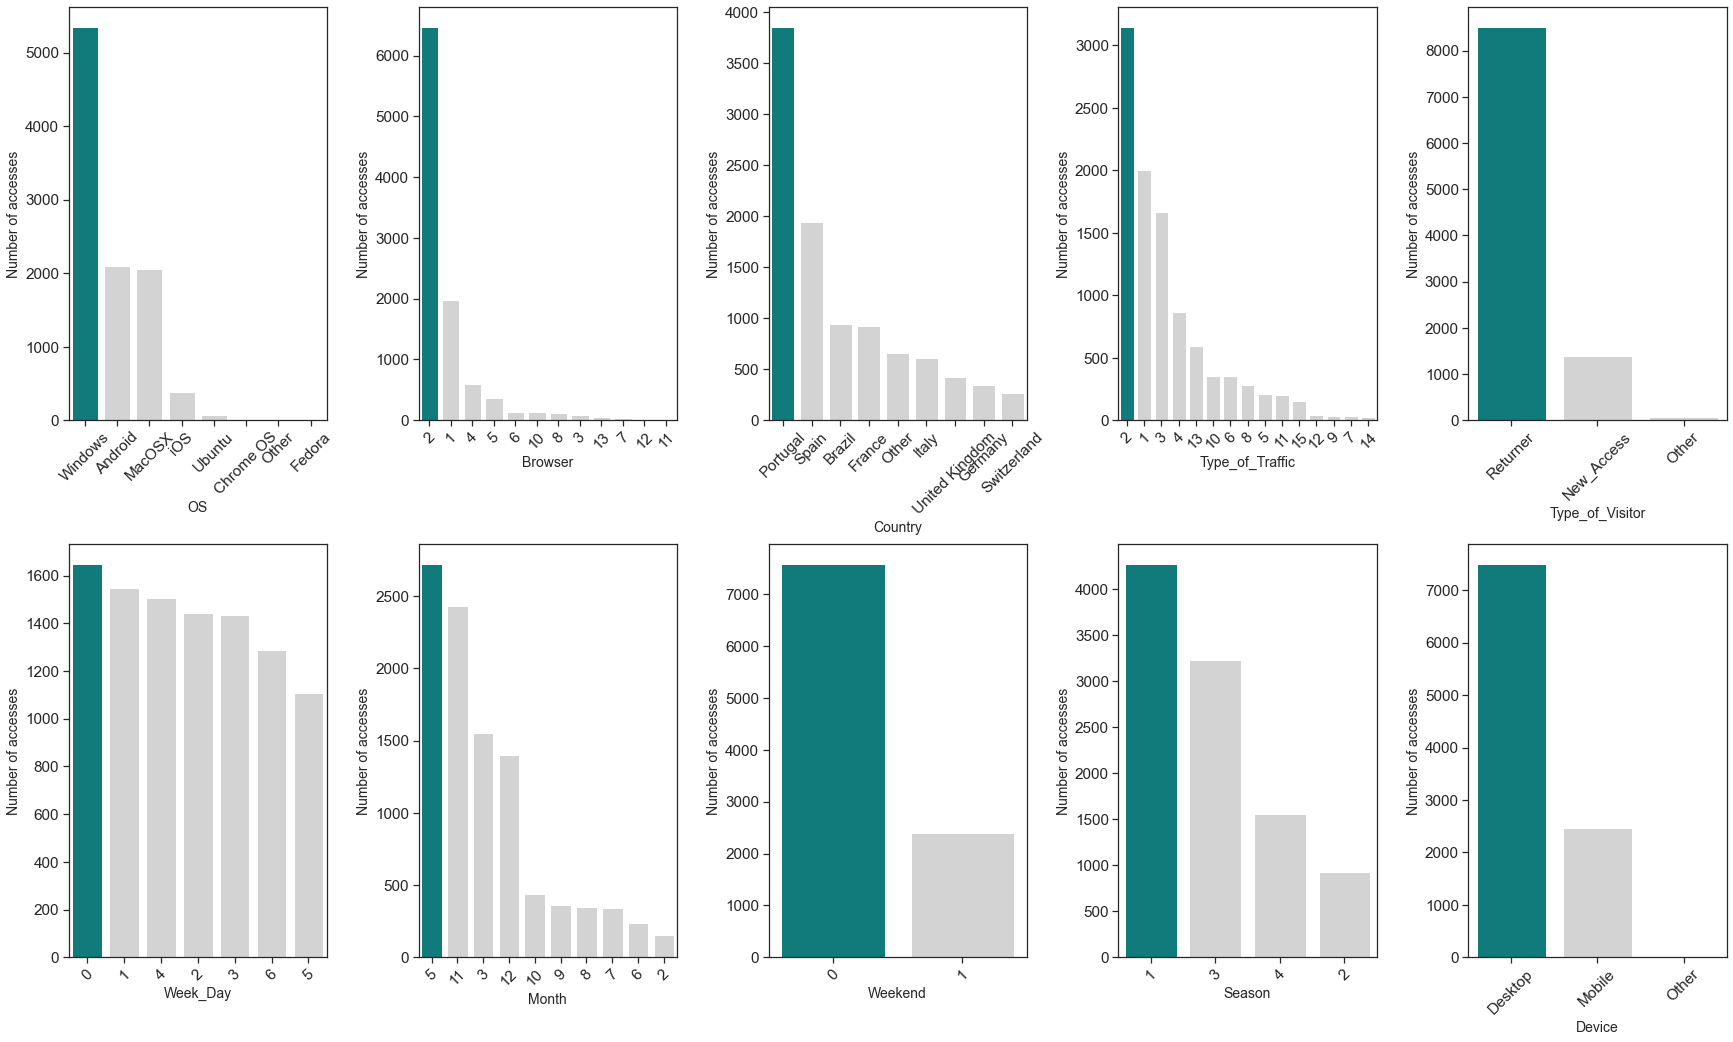

In [36]:
# categorical features in train set
#  some categories have very low representation
plot_categoricals(train, non_metric_features, "train_categories_before")

Removed 118 observations (1.18% of the initial dataset)


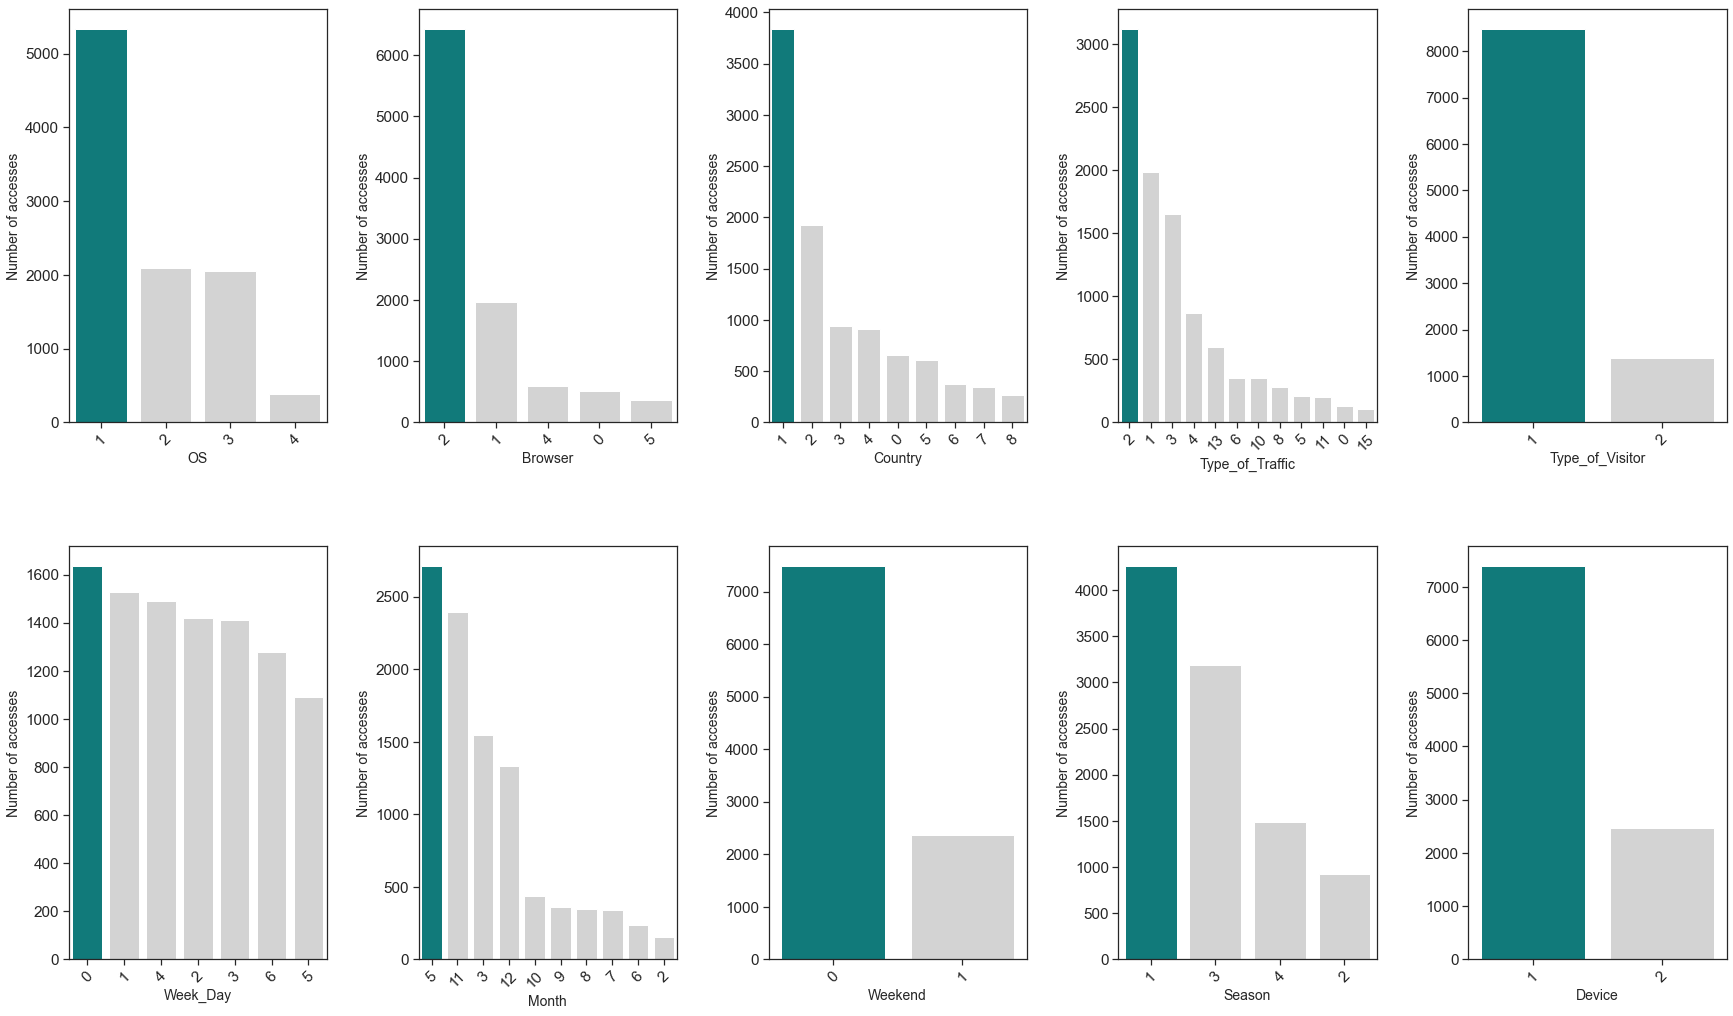

In [37]:
# remove/merge minor categories and encode those required in the training set
train, train_cat_out = remove_minor_categories(train)
train = merge_minor_categories(train, non_metric_features)
train = encode_categories(train)
plot_categoricals(train, non_metric_features, "train_categories_after")

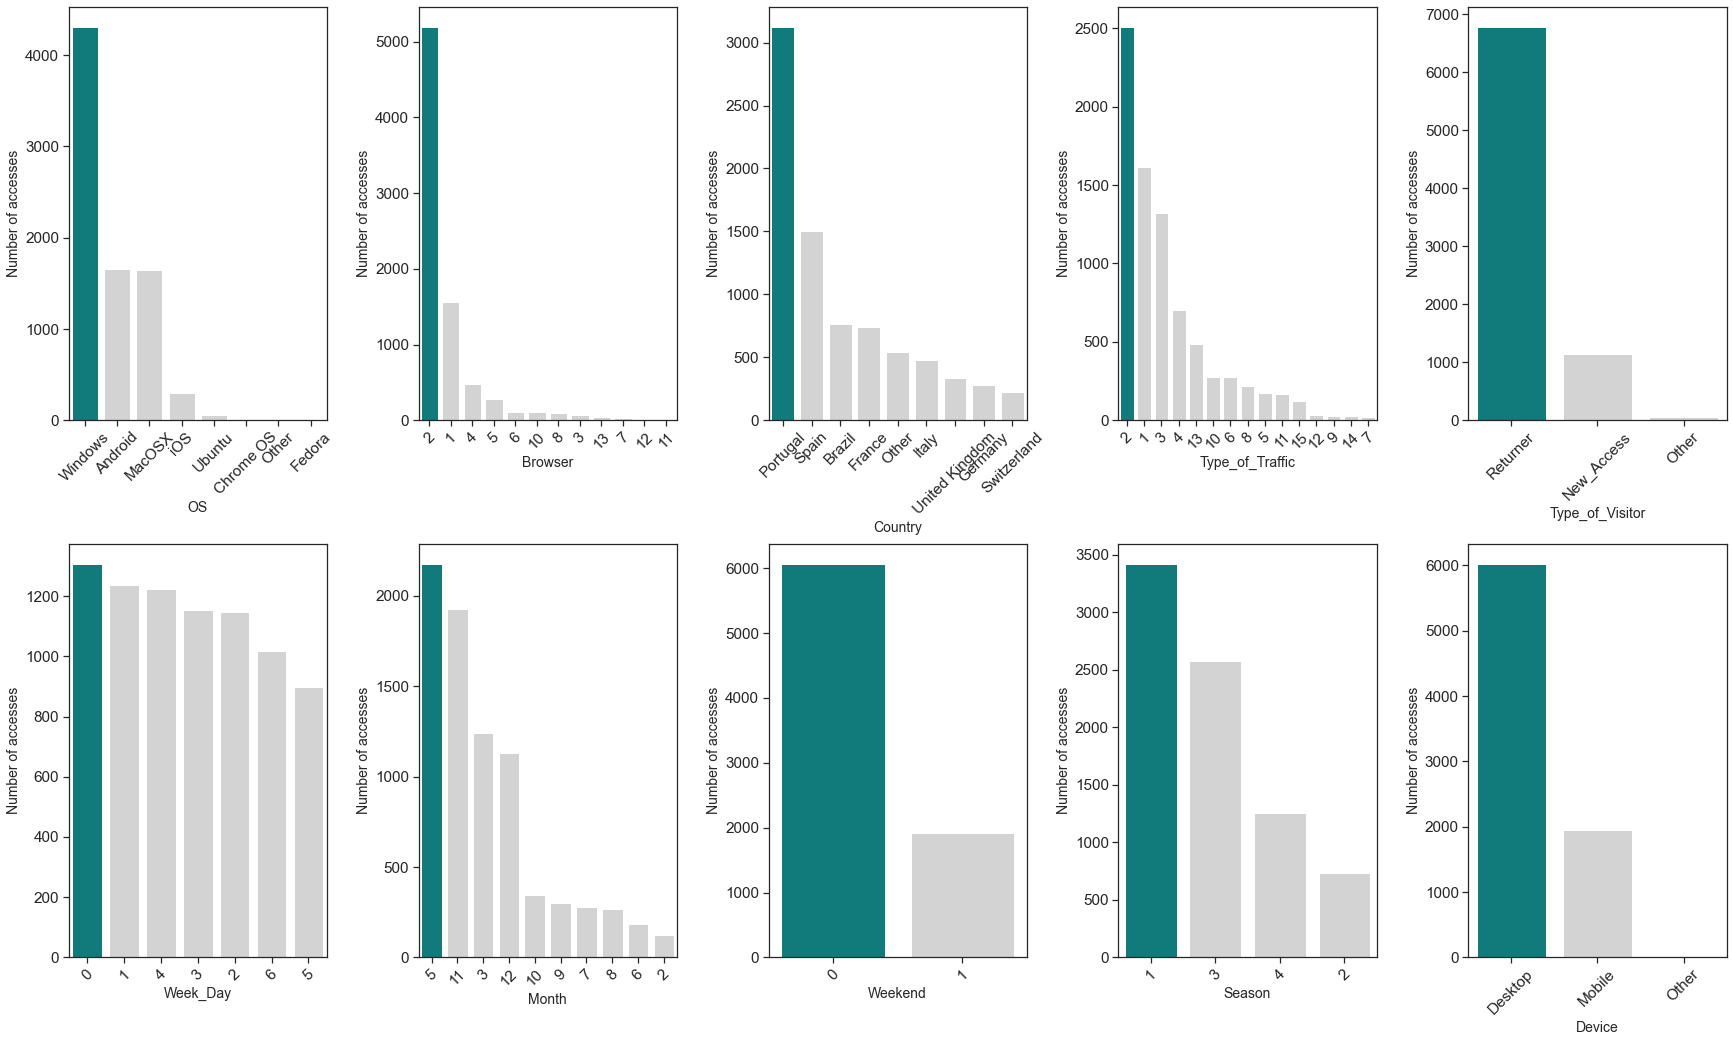

In [38]:
# categorical features in inhouse training set
plot_categoricals(train_inhouse, non_metric_features, "train_inhouse_categories_before")

Removed 91 observations (1.14% of the initial dataset)


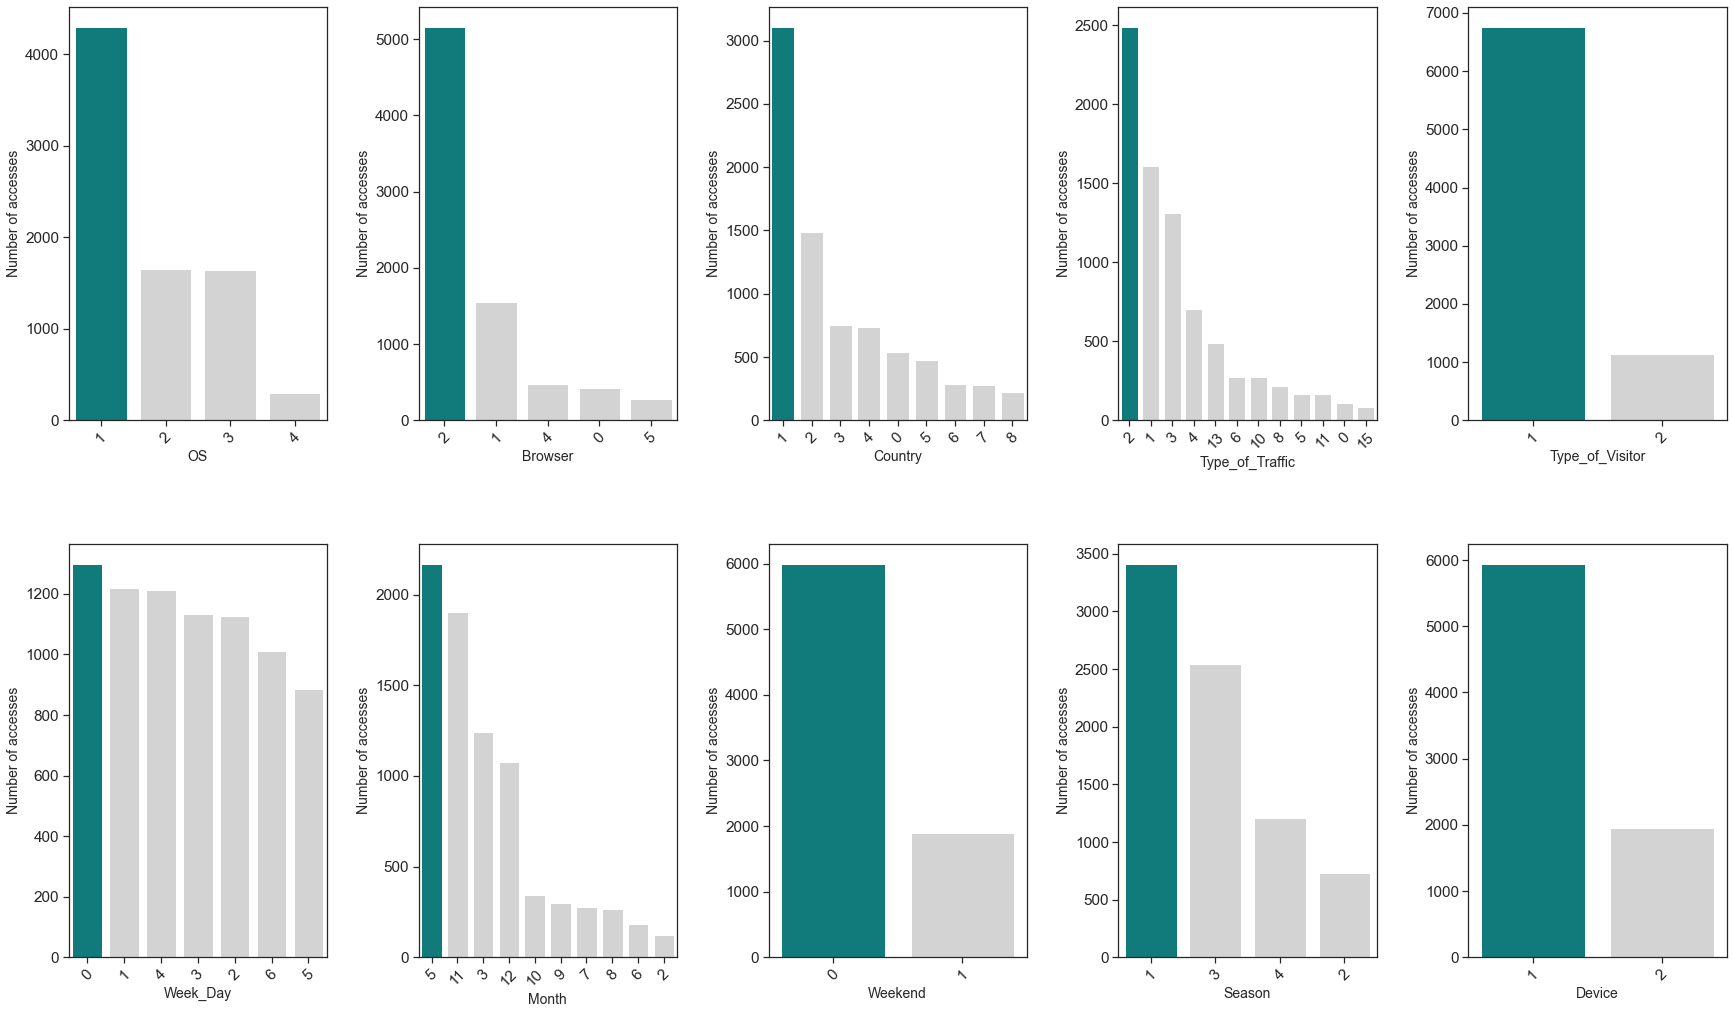

In [39]:
# remove/merge minor categories and encode those required in the inhouse training set
train_inhouse, train_inhouse_cat_out = remove_minor_categories(train_inhouse)
train_inhouse = merge_minor_categories(train_inhouse, non_metric_features)
train_inhouse = encode_categories(train_inhouse)
plot_categoricals(train_inhouse, non_metric_features, "train_inhouse_categories_after")

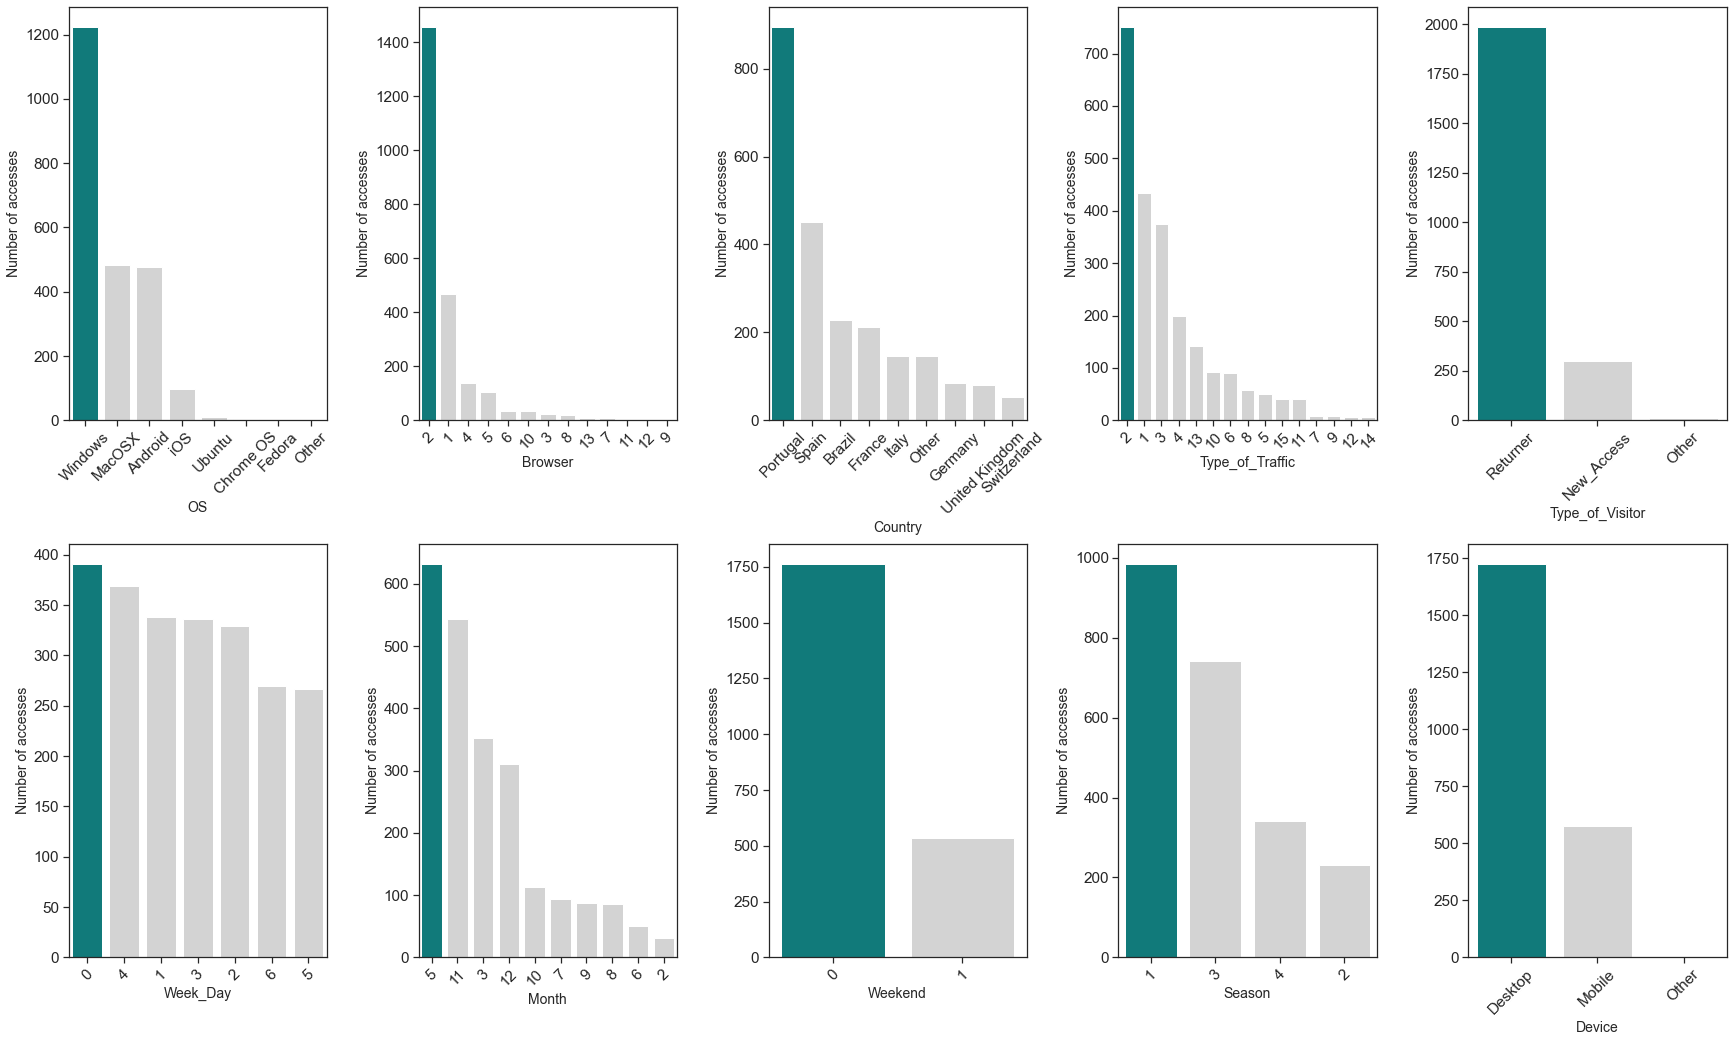

In [40]:
# categorical features in the test set
plot_categoricals(test, non_metric_features, "test_categories_before")

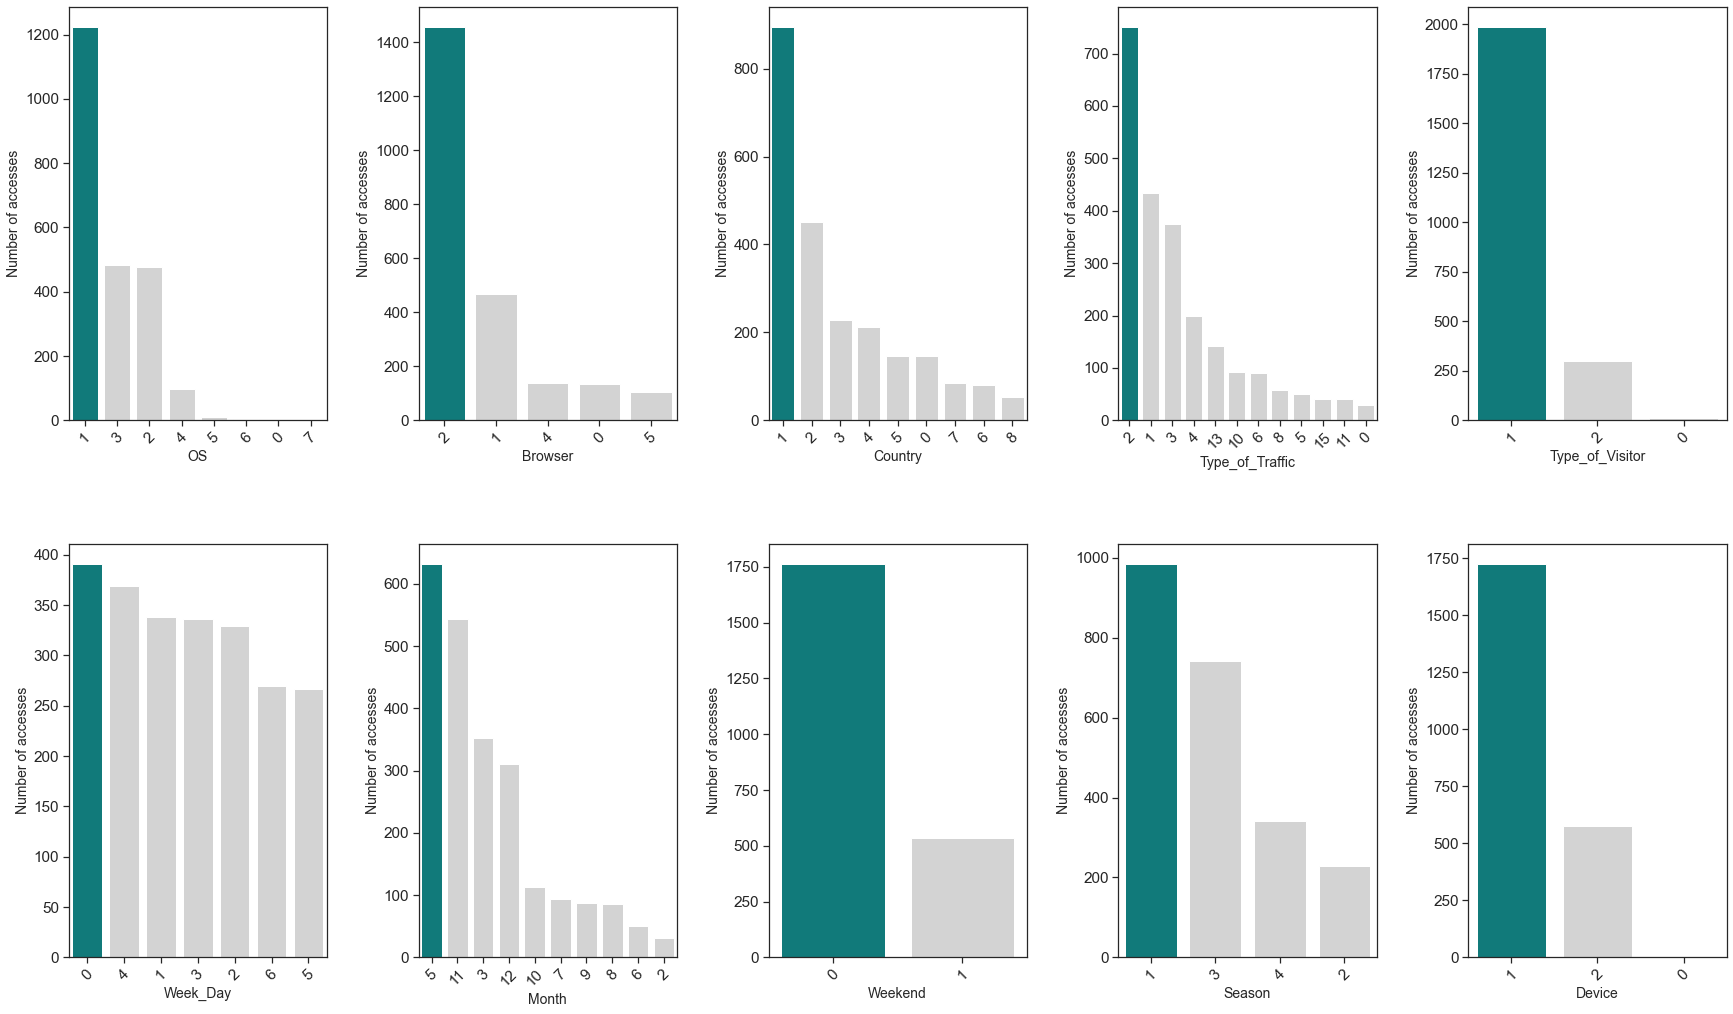

In [41]:
# merge minor categories and encode those required (but do not remove observations) in the test set
test = merge_minor_categories(test, non_metric_features)
test = encode_categories(test)
plot_categoricals(test, non_metric_features, "test_categories_after")

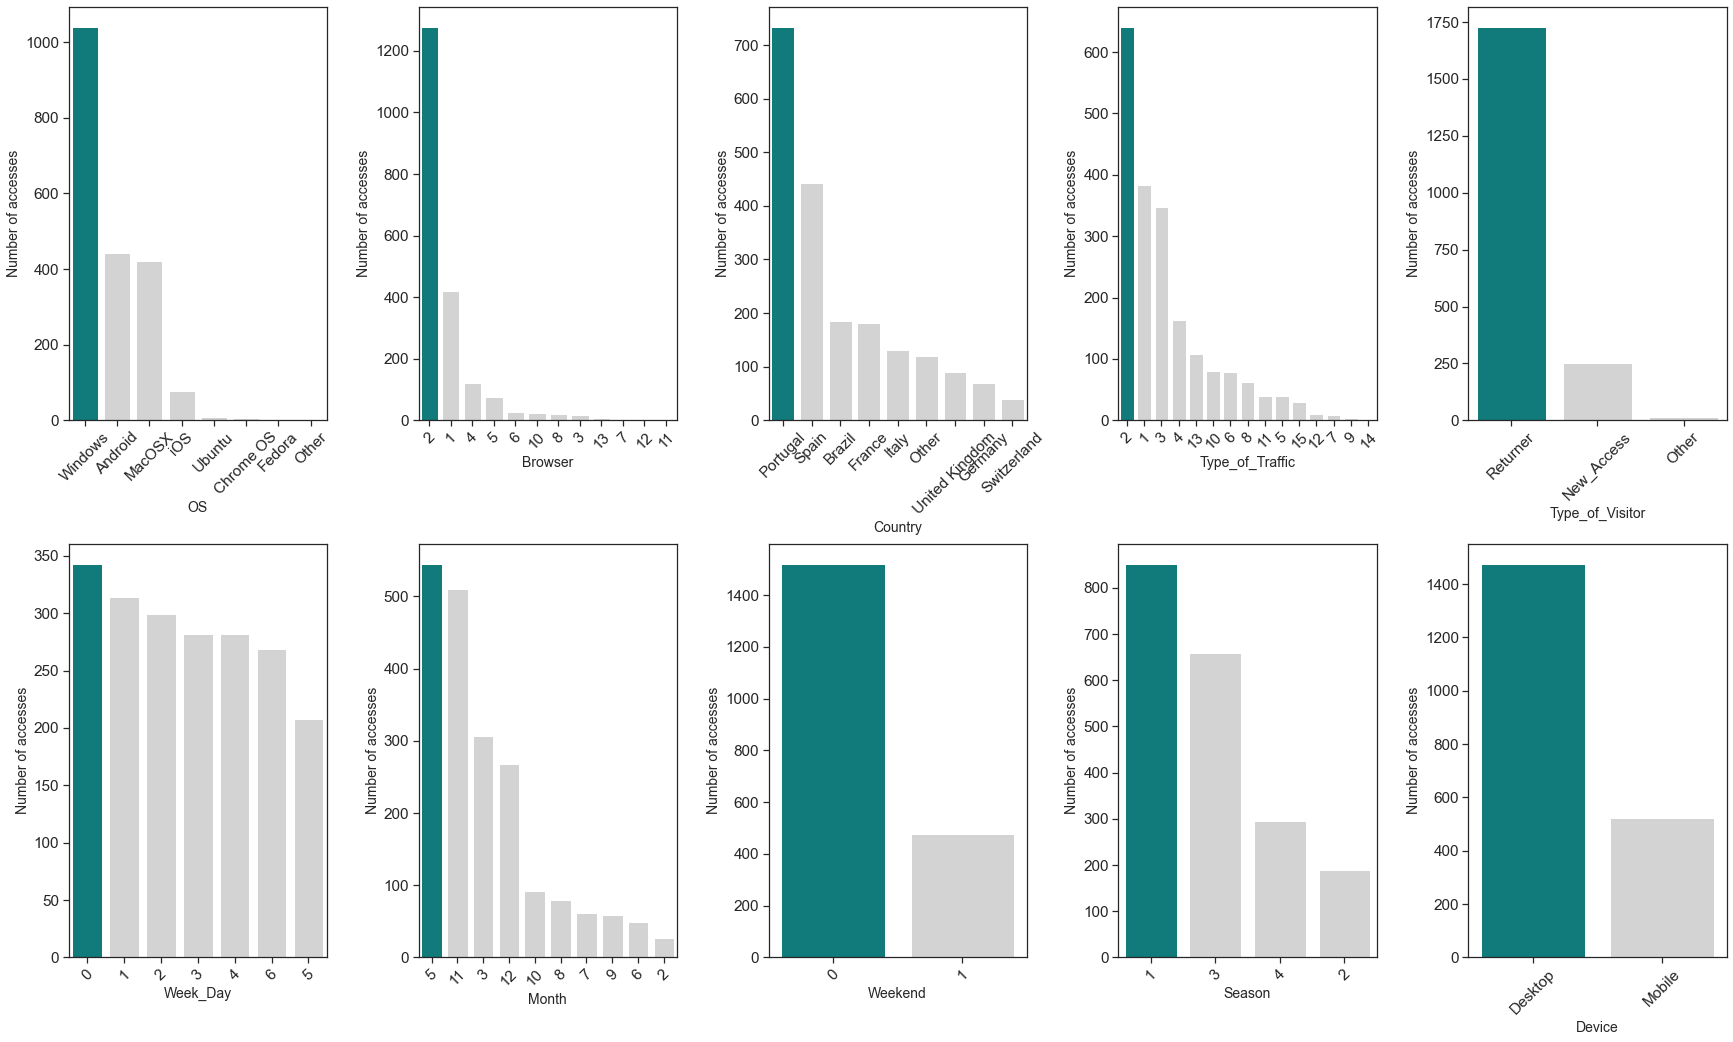

In [42]:
# categorical features in the validation set
plot_categoricals(X_val_inhouse, non_metric_features, "inhouse_val_categories_before")

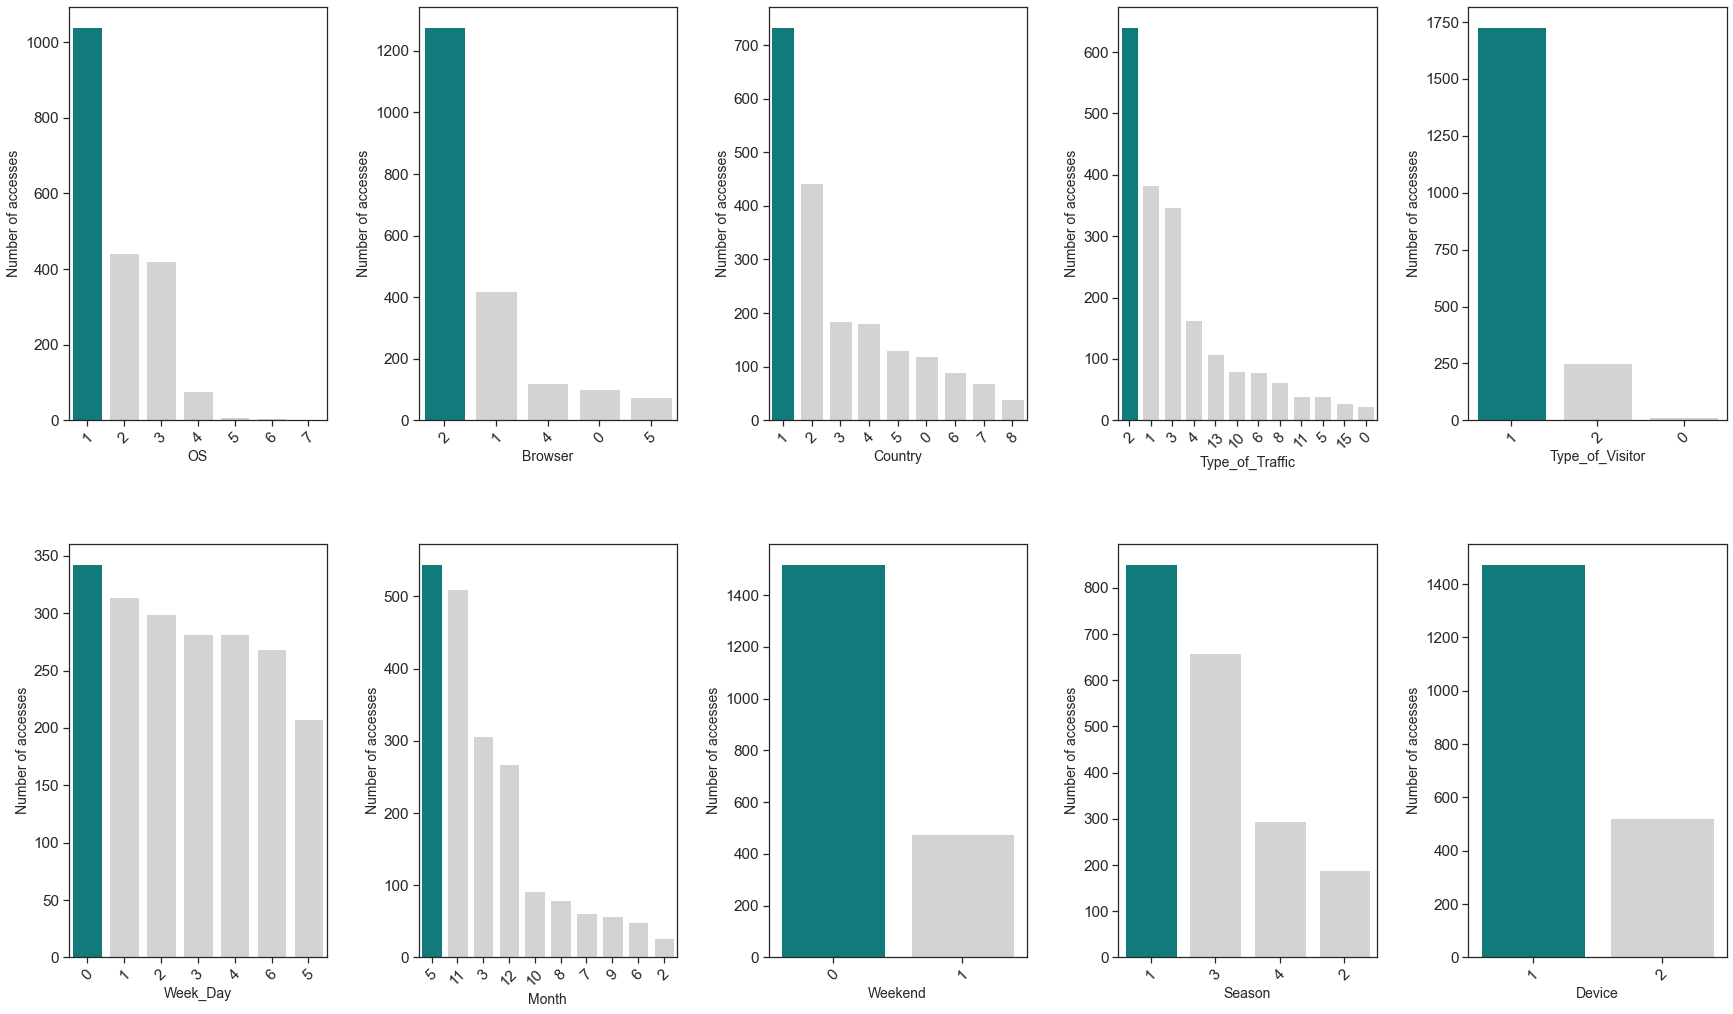

In [43]:
# merge minor categories and encode those required (but do not remove observations) in the validation set
X_val_inhouse = merge_minor_categories(X_val_inhouse, non_metric_features)
X_val_inhouse = encode_categories(X_val_inhouse)
plot_categoricals(X_val_inhouse, non_metric_features, "inhouse_val_categories_after")

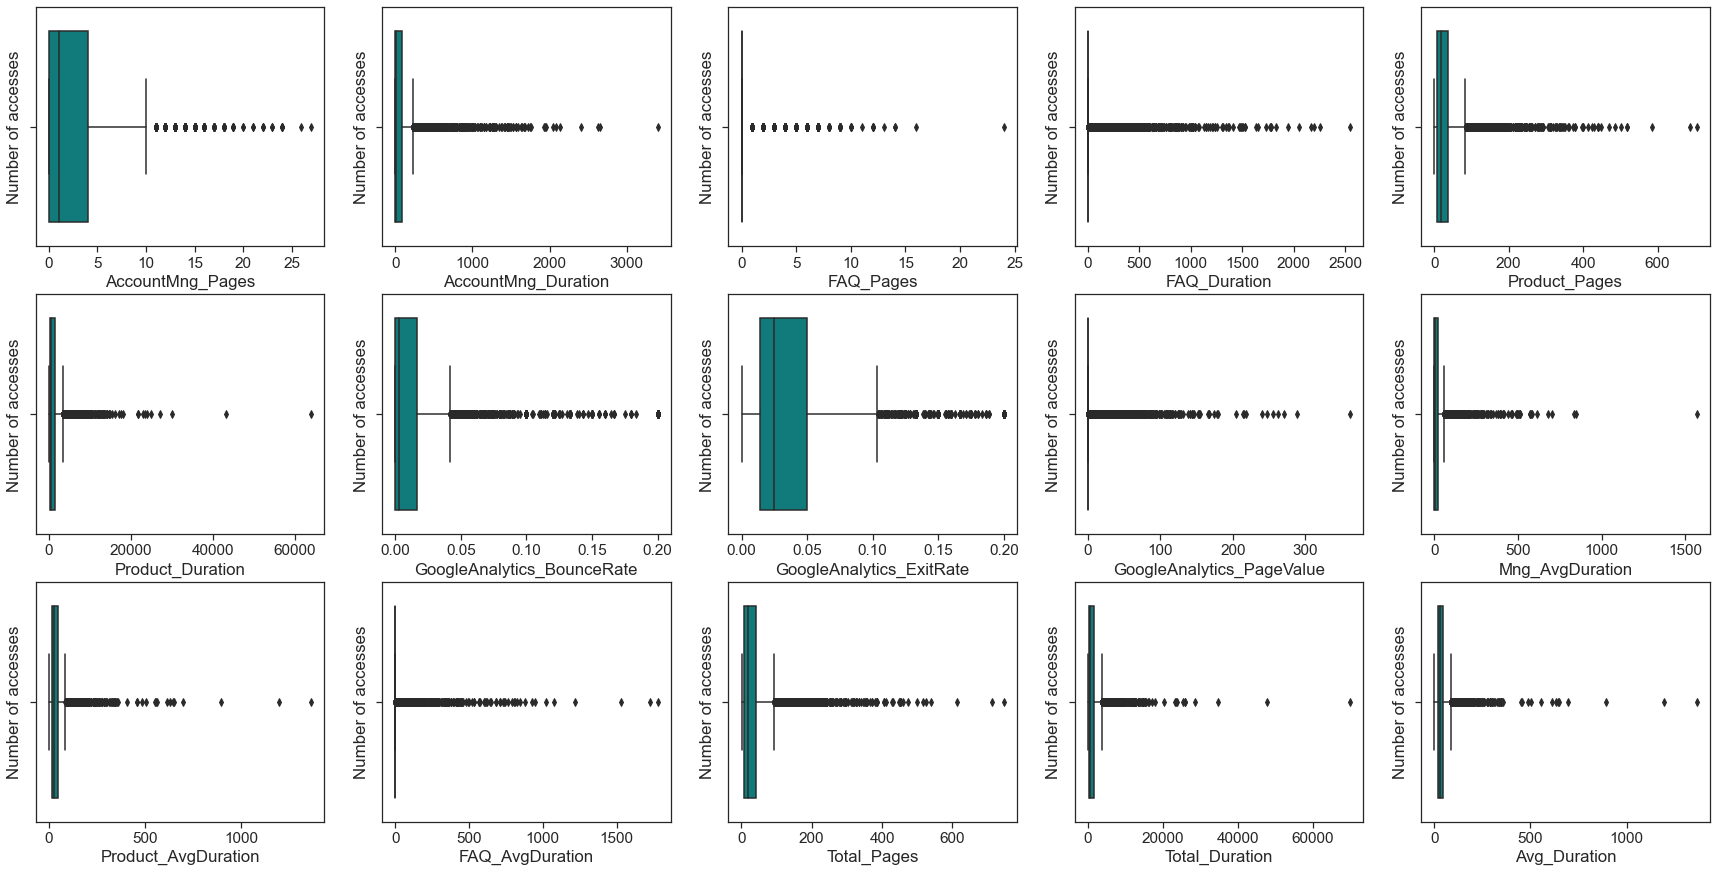

In [44]:
# Metric features: combined manual/IQR outlier removal strategy for the train set
plot_multiple(train, metric_features, "boxplot", fig_dimensions = [30, 15], nr_rows = 3)

In [45]:
# filters = (
#     (train.AccountMng_Duration.ge(1800)),
#     (train.FAQ_Pages.ge(20)),
#     (train.FAQ_Duration.ge(2000)),
#     (train.Product_Pages.ge(550)),
#     (train.Product_Duration.ge(20000)),
#     (train.GoogleAnalytics_PageValue.ge(300)),
#     (train.Mng_AvgDuration.ge(650)),
#     (train.Product_AvgDuration.ge(400)),
#     (train.FAQ_AvgDuration.ge(1000)),
#     (train.Total_Pages.ge(500)),
#     (train.Total_Duration.ge(20000)),
#     (train.Avg_Duration.ge(400))
# )

# train, train_metric_out = remove_outliers(train, filters)

# # outliers removed from train set
# nr_outliers = train_initial_length - len(train)
# pc_outliers = round(nr_outliers / train_initial_length * 100, 2)
# print(f"Total number of observations removed in the training set: {nr_outliers} ({pc_outliers}% of the original dataset)")

# # boxplots after removing outliers
# plot_multiple(train, metric_features, "boxplot", fig_dimensions = [30, 15], nr_rows = 3)

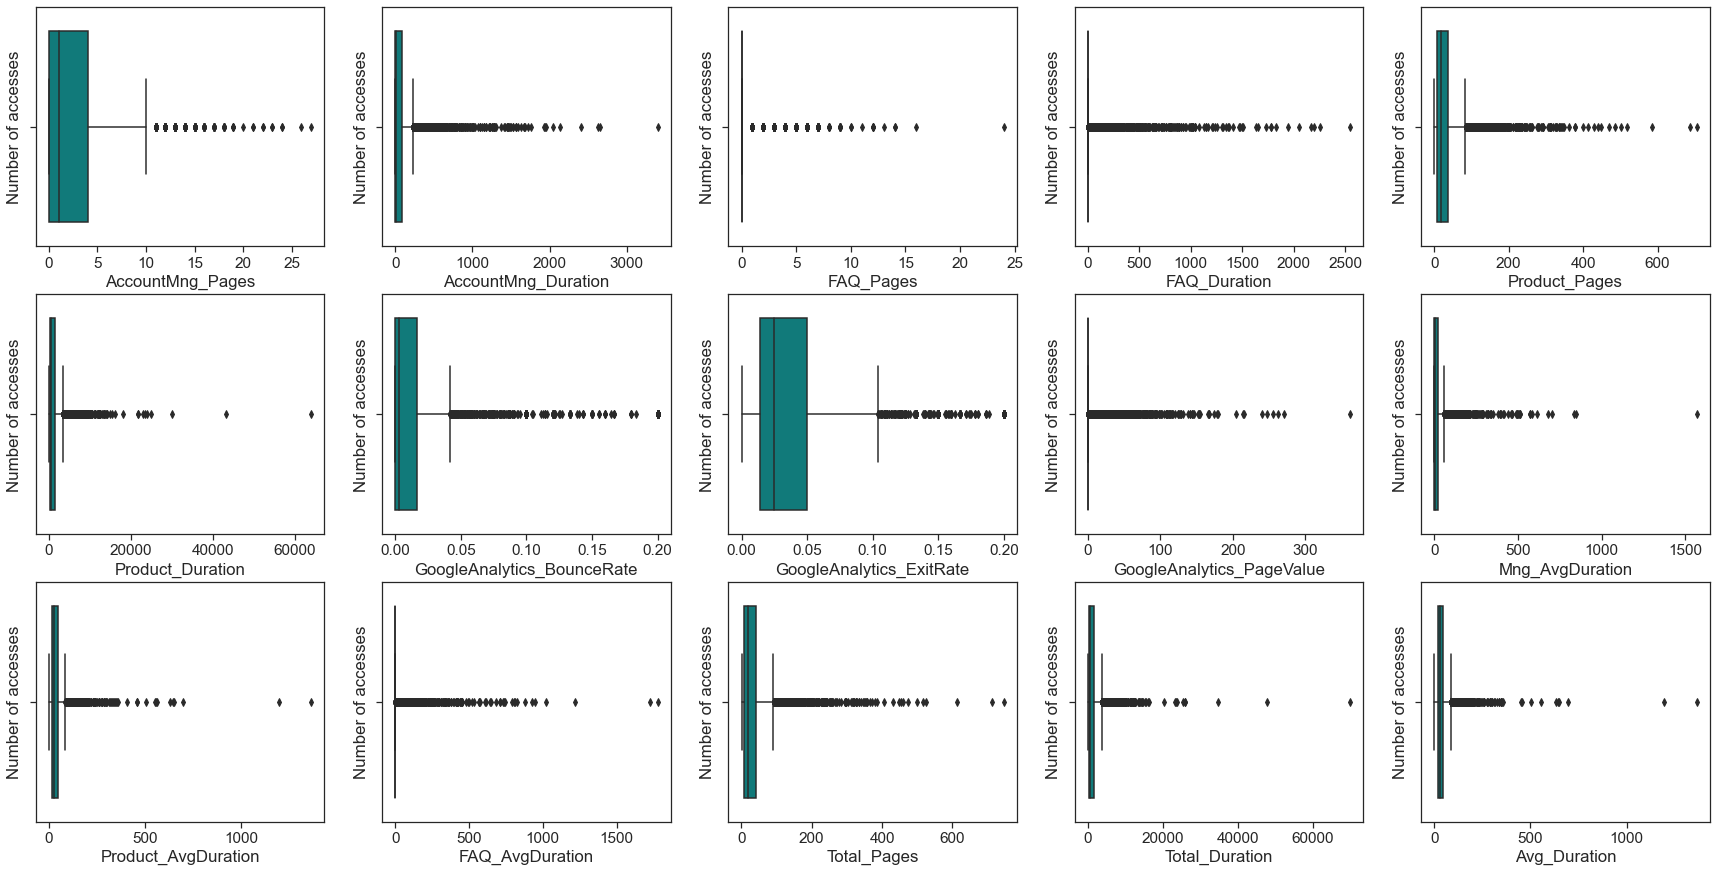

In [46]:
# Metric features: combined manual/IQR outlier removal strategy for the train_inhouse set
plot_multiple(train_inhouse, metric_features, "boxplot", fig_dimensions = [30, 15], nr_rows = 3, save_img = "yes", fig_name = "Fig6_TrainInhouse_Boxplot")

In [47]:
# filters_inhouse = (
#     (train_inhouse.AccountMng_Duration.ge(1800)),
#     (train_inhouse.FAQ_Pages.ge(20)),
#     (train_inhouse.FAQ_Duration.ge(2000)),
#     (train_inhouse.Product_Pages.ge(560)),
#     (train_inhouse.Product_Duration.ge(16000)),
#     (train_inhouse.GoogleAnalytics_PageValue.ge(300)),
#     (train_inhouse.Mng_AvgDuration.ge(650)),
#     (train_inhouse.Product_AvgDuration.ge(400)),
#     (train_inhouse.FAQ_AvgDuration.ge(1100)),
#     (train_inhouse.Total_Pages.ge(600)),
#     (train_inhouse.Total_Duration.ge(20000)),
#     (train_inhouse.Avg_Duration.ge(800))
# )

# train_inhouse, train_inhouse_metric_out = remove_outliers(train_inhouse, filters_inhouse)

# # outliers removed from inhouse train dataset
# nr_outliers = train_inhouse_initial_length - len(train_inhouse)
# pc_outliers = round(nr_outliers / train_inhouse_initial_length * 100, 2)
# print(f"Total number of observations removed in inhouse training set: {nr_outliers} ({pc_outliers}% of the original dataset)")

# # boxplots after removing outliers
# plot_multiple(train_inhouse, metric_features, "boxplot", fig_dimensions = [30, 15], nr_rows = 3, save_img = "yes", fig_name = "Fig6_TrainInhouse_Boxplots_After")

## Feature skewness

In [48]:
def transform_features(df, features, transformation):

    # create dataframe with the transformed features
    df_transformed = pd.DataFrame()

    for feat in features:
        name = feat + "_" + transformation
        if transformation.lower() == "sqrt":
            df_transformed[name] = np.sqrt(df[feat])
        # ensure all values are positive and apply log10 transformation
        if transformation.lower() == "log10":
            df_transformed[name] = np.log10(df[feat] + 1)

    merged_df = pd.concat([df, df_transformed], axis = 1)

    return merged_df

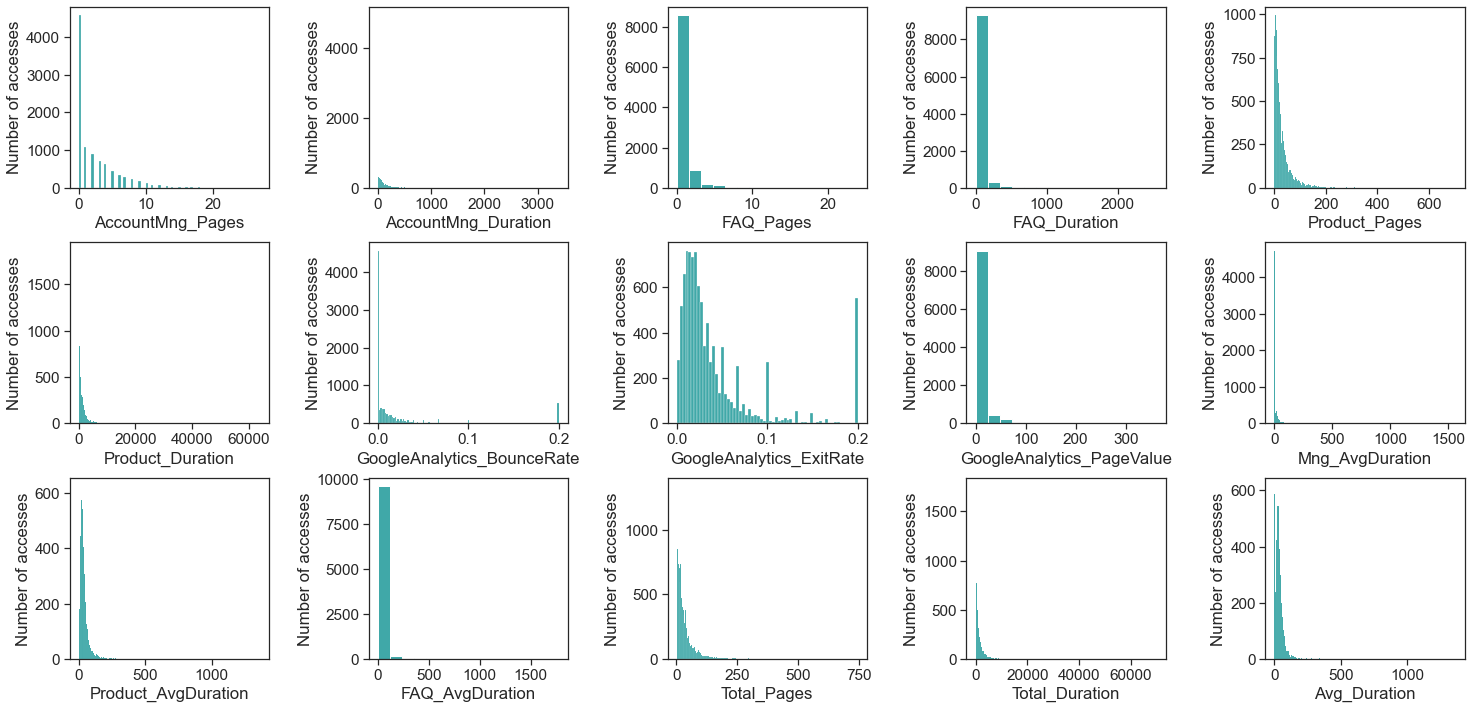

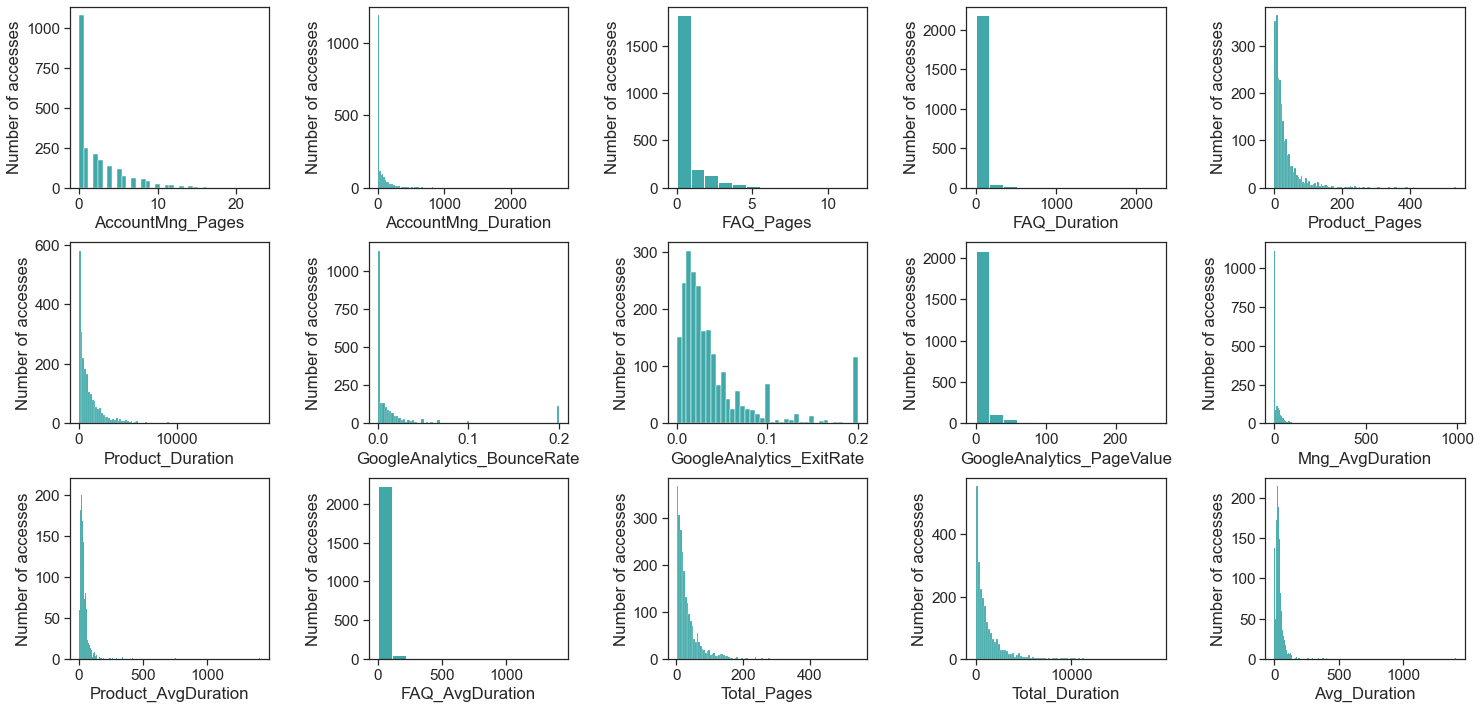

In [49]:
# Metric features: histplots of metric features in the train set
plot_multiple(train, metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)

# histplots of metric features in the test set
plot_multiple(test, metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)

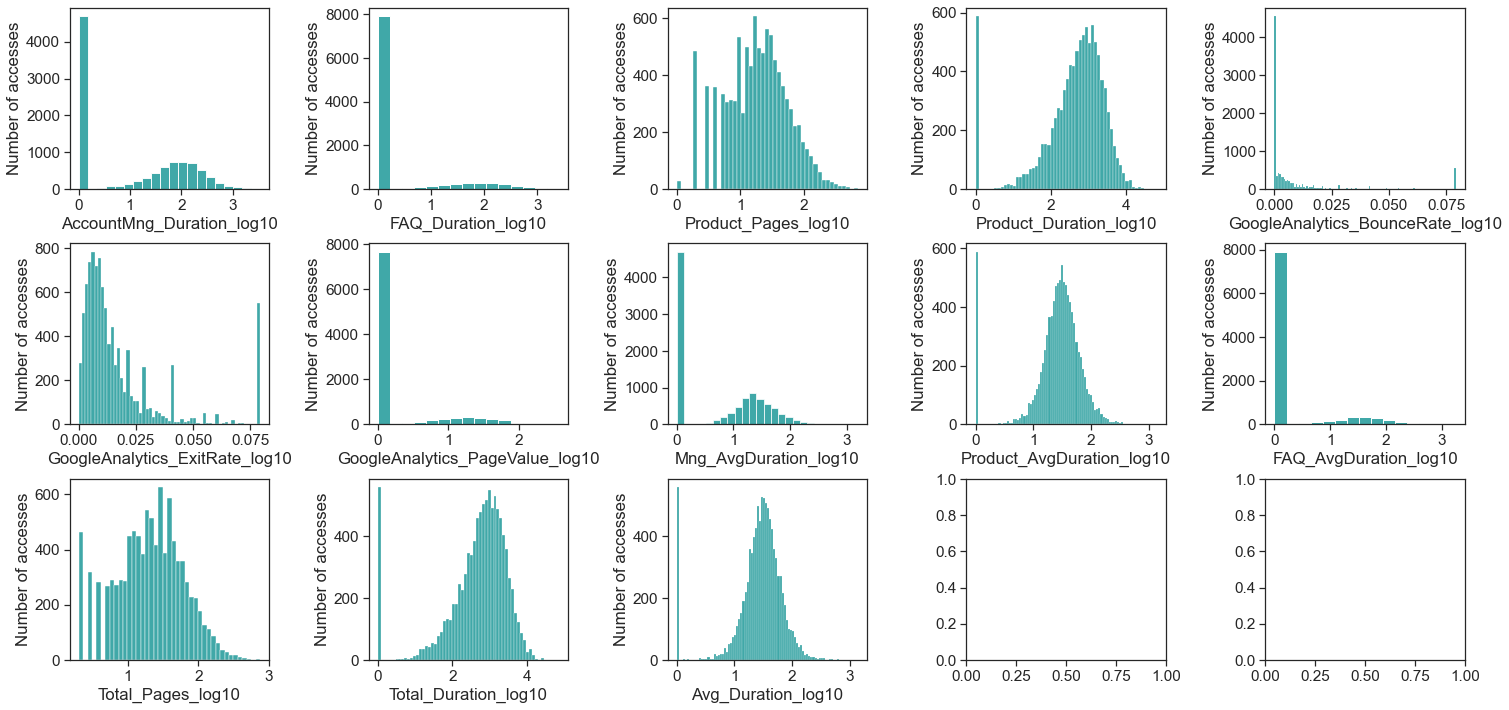

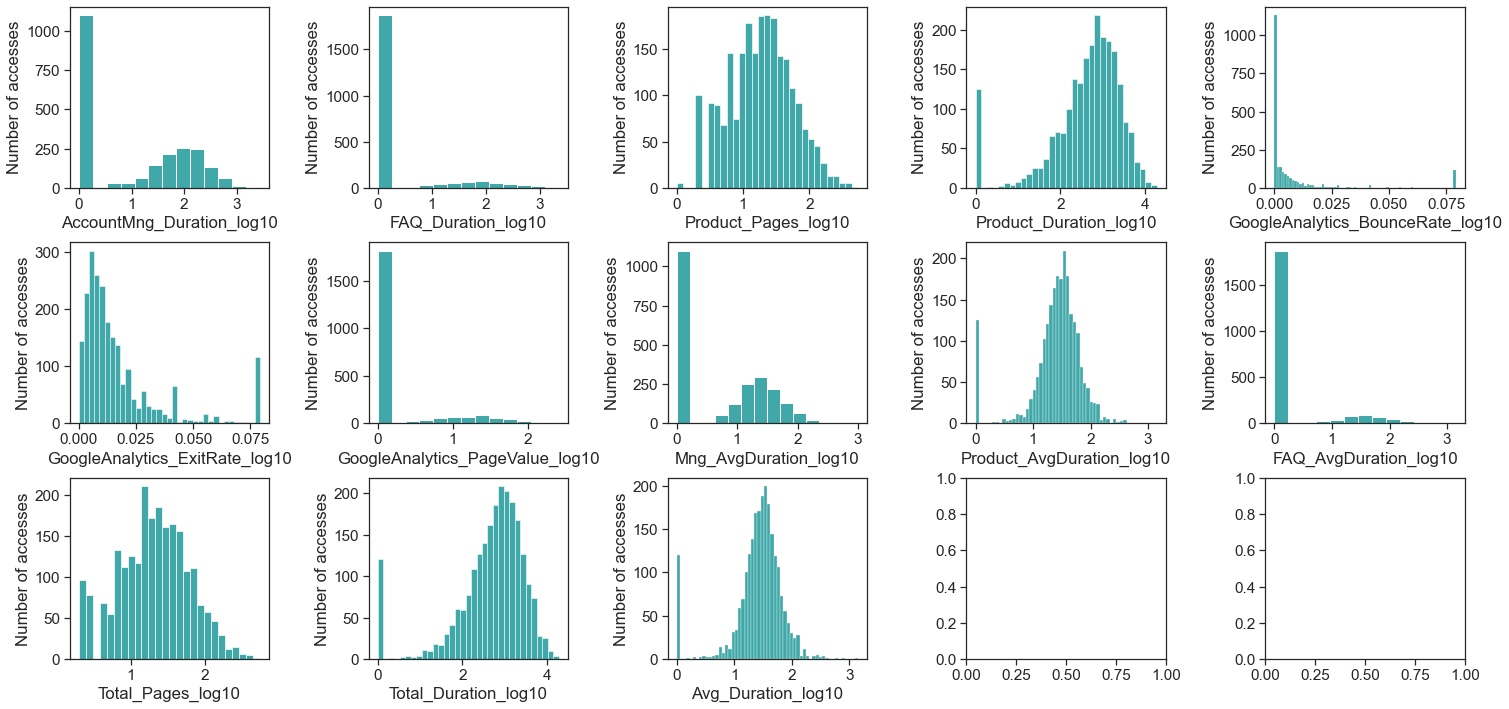

In [50]:
# boxplots of metric features after log10 transformation of skewed features (train and test)
skewed_metric_features = [
    "AccountMng_Duration",
    "FAQ_Duration",
    "Product_Pages",
    "Product_Duration",
    "GoogleAnalytics_BounceRate",
    "GoogleAnalytics_ExitRate",
    "GoogleAnalytics_PageValue",
    "Mng_AvgDuration",
    "Product_AvgDuration",
    "FAQ_AvgDuration",
    "Total_Pages",
    "Total_Duration",
    "Avg_Duration"
]

train = transform_features(train, skewed_metric_features, "log10")
test = transform_features(test, skewed_metric_features, "log10")
# train = transform_features(train, skewed_metric_features, "sqrt")
# test = transform_features(test, skewed_metric_features, "sqrt")
transformed_metric_features = train.columns[train.columns.str.endswith("log10")]

# histograms of transformed features
plot_multiple(train, transformed_metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)
plot_multiple(test, transformed_metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)

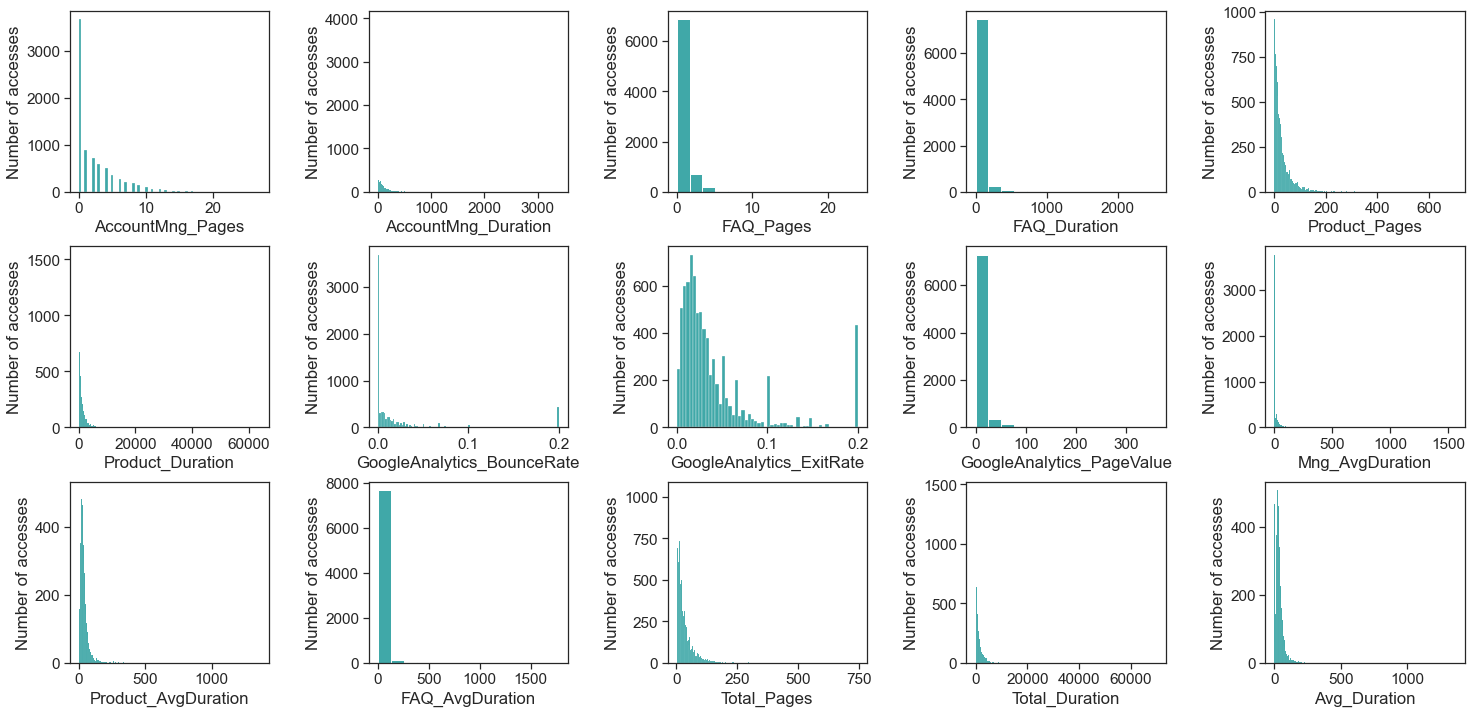

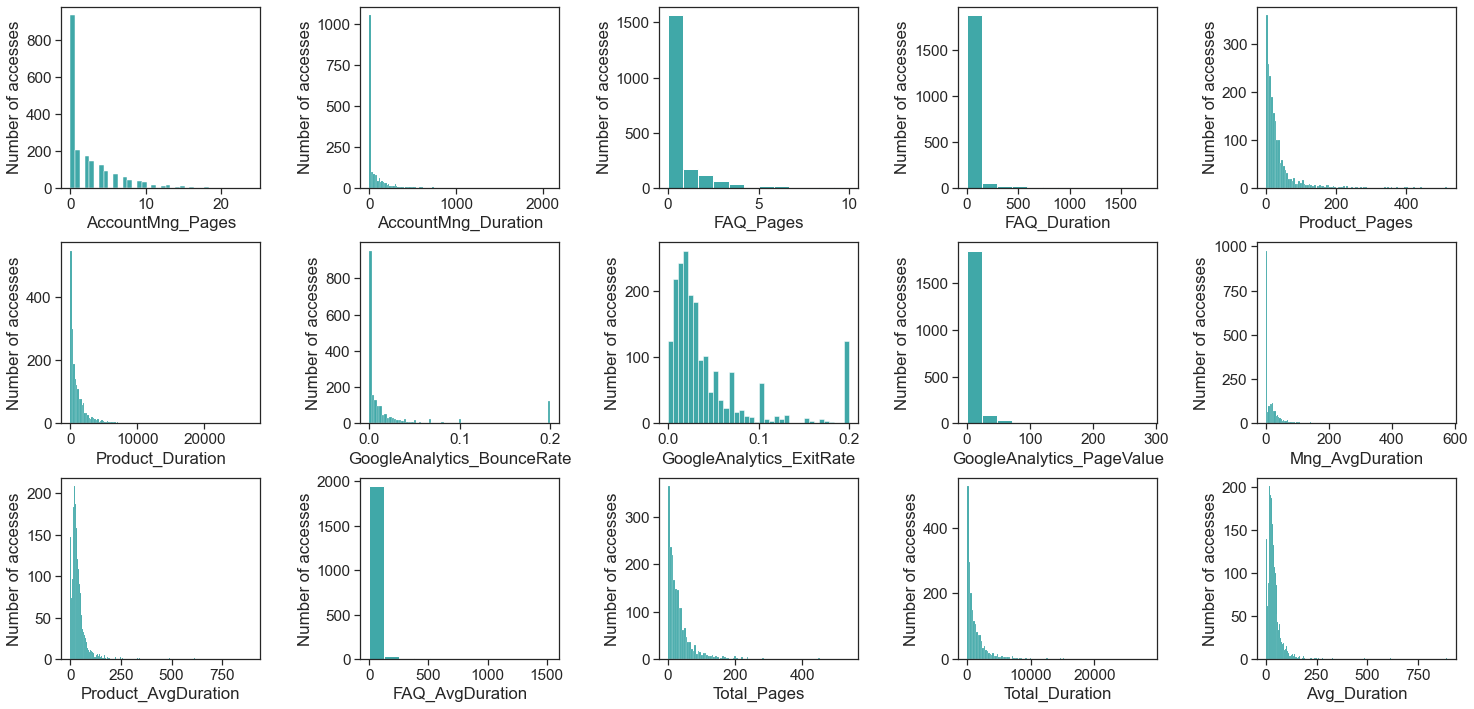

In [51]:
# Metric features: histplots of metric features in the train_inhouse set
plot_multiple(train_inhouse, metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)

# histplots of metric features in the validation set
plot_multiple(X_val_inhouse, metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)

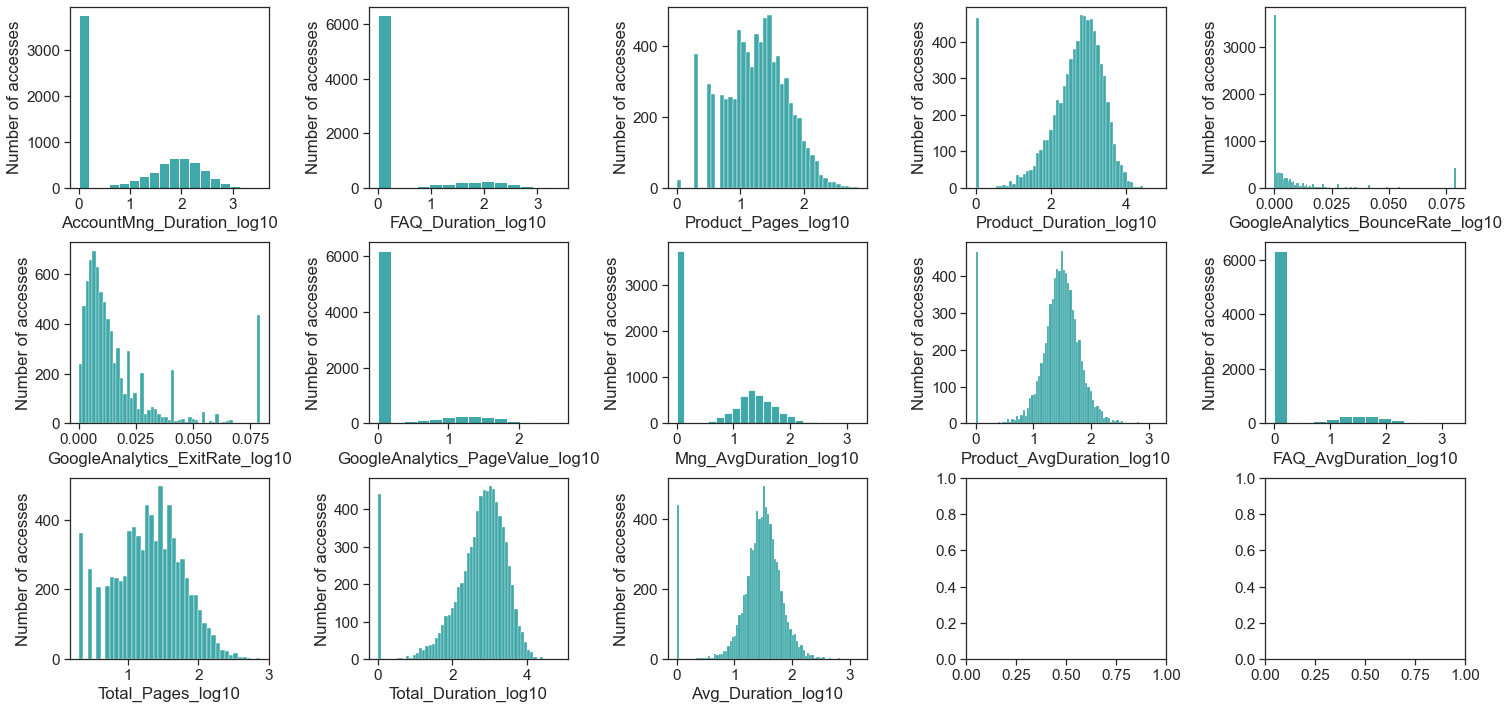

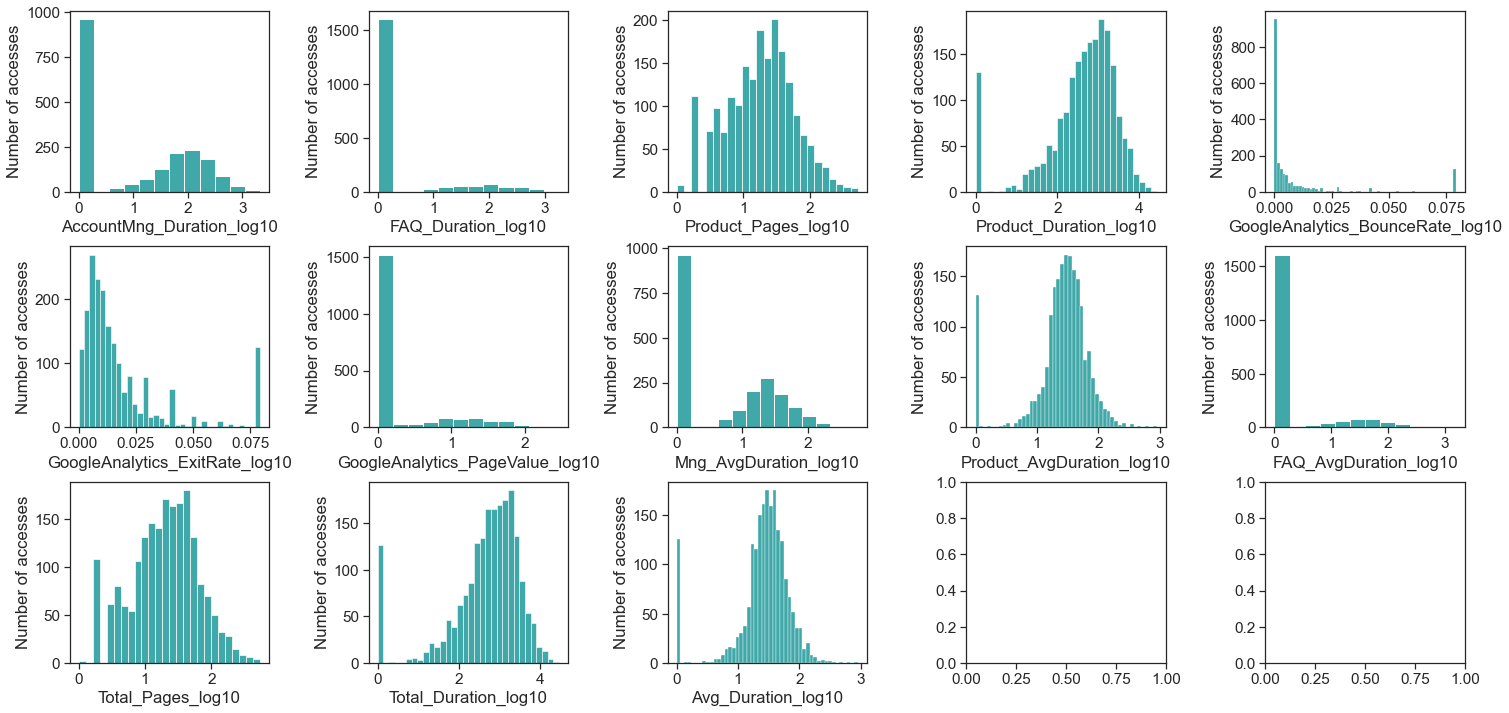

In [52]:
train_inhouse = transform_features(train_inhouse, skewed_metric_features, "log10")
X_val_inhouse = transform_features(X_val_inhouse, skewed_metric_features, "log10")

transformed_metric_features = train_inhouse.columns[train_inhouse.columns.str.endswith("log10")]

plot_multiple(train_inhouse, transformed_metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)
plot_multiple(X_val_inhouse, transformed_metric_features, "histplot", fig_dimensions = [25, 12], nr_rows = 3)

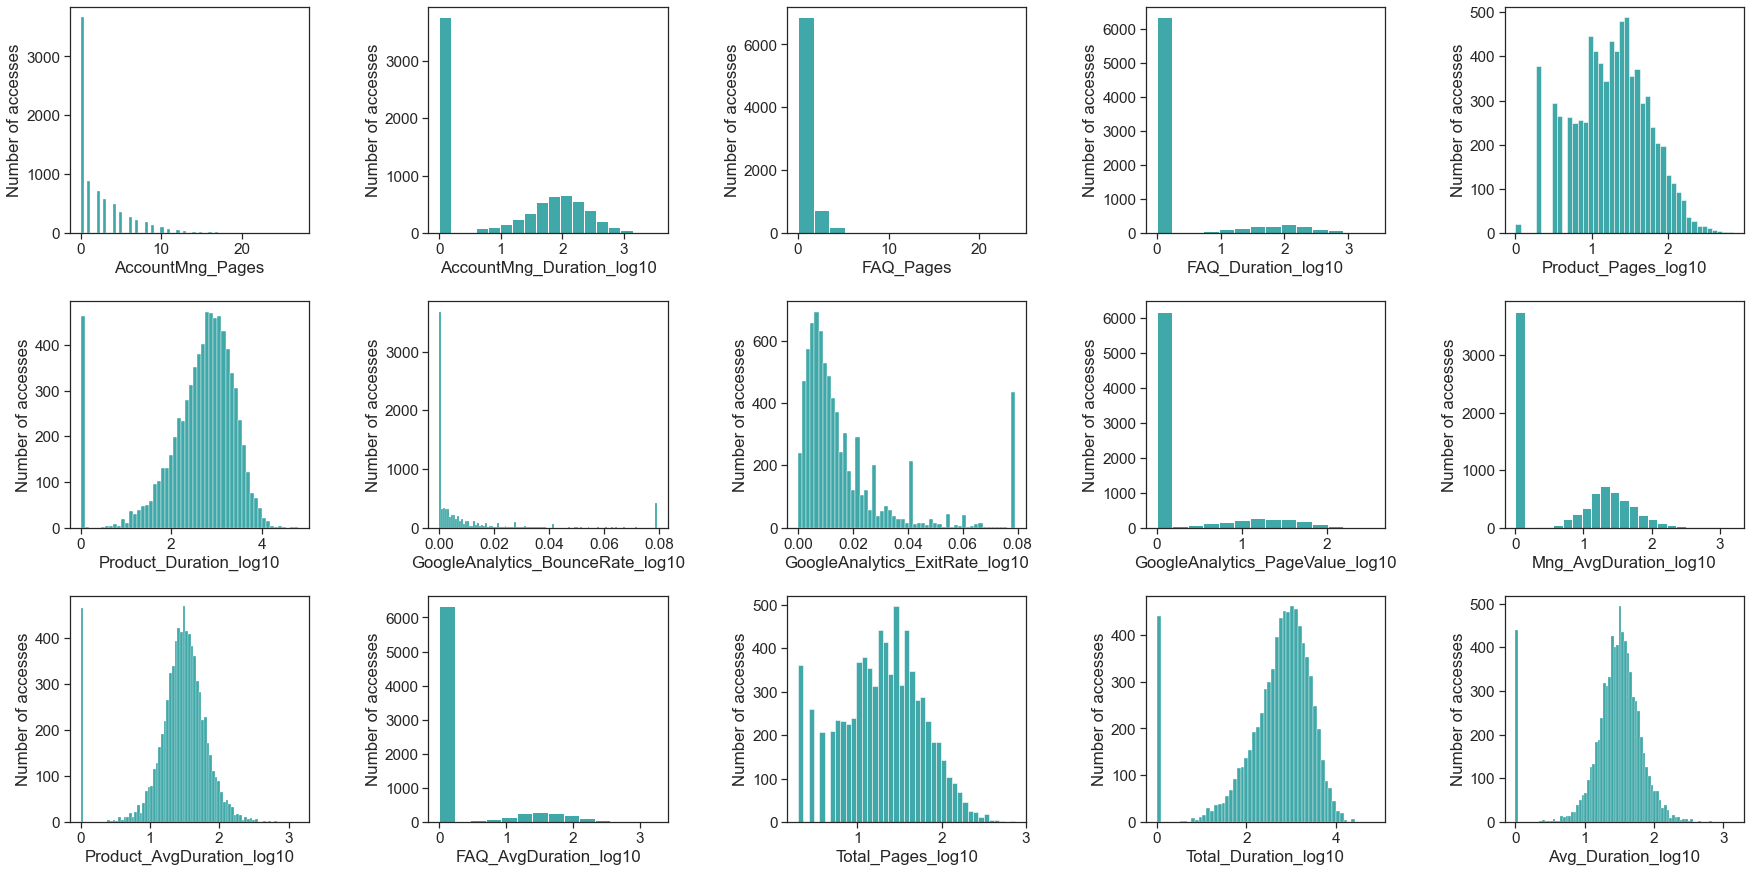

In [53]:
final_plot_features = [
    "AccountMng_Pages",
    "AccountMng_Duration_log10",
    "FAQ_Pages",
    "FAQ_Duration_log10",
    "Product_Pages_log10",
    "Product_Duration_log10",
    "GoogleAnalytics_BounceRate_log10",
    "GoogleAnalytics_ExitRate_log10",
    "GoogleAnalytics_PageValue_log10",
    "Mng_AvgDuration_log10",
    "Product_AvgDuration_log10",
    "FAQ_AvgDuration_log10",
    "Total_Pages_log10",
    "Total_Duration_log10",
    "Avg_Duration_log10"
]

plot_multiple(train_inhouse, final_plot_features, "histplot", fig_dimensions = [30, 15], nr_rows = 3, save_img = "yes", fig_name = "Fig7_InhouseTrain_Histograms")

In [54]:
# from sklearn.preprocessing import Binarizer
# from sklearn.preprocessing import KBinsDiscretizer

# def create_binned_features(df):

#     # 1 if visited, 0 if not
#     accountvisit_binarizer = Binarizer().fit(np.array(df.AccountMng_Pages).reshape(-1,1))
#     accountvisit_binary = accountvisit_binarizer.transform(np.array(df.AccountMng_Pages).reshape(-1,1))
#     df["Visited_Mng"] = accountvisit_binary[:,0]
#     df["Visited_Mng"] = df["Visited_Mng"].astype("category")

#     faqvisit_binarizer = Binarizer().fit(np.array(df.FAQ_Pages).reshape(-1,1))
#     faqvisit_binary = faqvisit_binarizer.transform(np.array(df.FAQ_Pages).reshape(-1,1))
#     df["Visited_FAQ"] = faqvisit_binary[:,0]
#     df["Visited_FAQ"] = df["Visited_FAQ"].astype("category")

#     # 1 page has value, 0 otherwise
#     value_binarizer = Binarizer().fit(np.array(df.GoogleAnalytics_PageValue).reshape(-1,1))
#     value_binary = value_binarizer.transform(np.array(df.GoogleAnalytics_PageValue).reshape(-1,1))
#     df["Page_HasValue"] = value_binary[:,0]
#     df["Page_HasValue"] = df["Page_HasValue"].astype("category")
#     # has_page_value = [0 if val == 0 else 1 for val in df.GoogleAnalytics_PageValue]

#     # 1 bounce/exit are higher than or qual to 0.05, 0 otherwise
#     bounce_binarizer = Binarizer(0.0499).fit(np.array(df.GoogleAnalytics_BounceRate).reshape(-1,1))
#     bounce_binary = bounce_binarizer.transform(np.array(df.GoogleAnalytics_BounceRate).reshape(-1,1))
#     df["High_BounceRate"] = bounce_binary[:,0]
#     df["High_BounceRate"] = df["High_BounceRate"].astype("category")

#     exit_binarizer = Binarizer(0.0499).fit(np.array(df.GoogleAnalytics_ExitRate).reshape(-1,1))
#     exit_binary = exit_binarizer.transform(np.array(df.GoogleAnalytics_ExitRate).reshape(-1,1))
#     df["High_ExitRate"] = exit_binary[:,0]
#     df["High_ExitRate"] = df["High_ExitRate"].astype("category")

#     return df


# def generate_principal_components(df, metric_features):
    
#     data_pca = df[metric_features].copy()
#     pca = PCA().fit(data_pca)
#     pca_ = pca.transform(data_pca)
#     pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
#     pca_df = pd.DataFrame(pca_, index=data_pca.index, columns = pca_feat_names)

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#     # draw plots
#     ax1.plot(pca.explained_variance_, marker=".", markersize=12)
#     ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
#     ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

#     # customizations
#     ax2.legend()
#     ax1.set_title("Scree Plot", fontsize=14)
#     ax2.set_title("Variance Explained", fontsize=14)
#     ax1.set_ylabel("Eigenvalue")
#     ax2.set_ylabel("Proportion")
#     ax1.set_xlabel("Components")
#     ax2.set_xlabel("Components")
#     ax1.set_xticks(range(0, pca.n_components_, 2))
#     ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
#     ax2.set_xticks(range(0, pca.n_components_, 2))
#     ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

#     plt.show()

#     return pca_df

# # final dataframes with all of the features
# train = create_binned_features(train)
# test = create_binned_features(test)
# train_inhouse = create_binned_features(train_inhouse)
# X_val_inhouse = create_binned_features(X_val_inhouse)

## Remove outliers with DBSCAN

In [55]:
def data_scaler(df, scaler_name):

    '''
    Takes in a dataframe, df, and the name of the scaler,
    scaler_name, as arguments and applies the corresponding
    scaling method to the dataframe.

    Arguments:
     df (dataframe): dataframe without the target, y
     scaler_name (str): name of the scaler (minmax,
    standard, robust)

    Returns:
     df_scaled (dataframe): scaled version of the original df
    '''

    df_scaled = df.copy()
    features = list(df.columns)

    if scaler_name.lower() == "minmax":
        scaler = MinMaxScaler().fit(df)
        df_scaled[features] = scaler.transform(df)

    if scaler_name.lower() == "standard":
        scaler = StandardScaler().fit(df)
        df_scaled[features] = scaler.transform(df)

    if scaler_name.lower() == "robust":
        scaler = RobustScaler().fit(df)
        df_scaled[features] = scaler.transform(df)
    
    return (scaler, df_scaled)

In [56]:
# Searching for outliers with DBSCAN
# train_temp = train[metric_features]

# standard_scaler, train_temp_scaled = data_scaler(train_temp, "standard")

# sns.set(style = "whitegrid")
# plt.subplots(figsize = (10, 10))
# neigh = NearestNeighbors(n_neighbors = 30)
# neigh.fit(train_temp_scaled)
# distances, _ = neigh.kneighbors(train_temp_scaled)
# distances = np.sort(distances[:, -1])
# plt.plot(distances)
# plt.show()

# dbscan = DBSCAN(eps = 2.2, min_samples = 30, n_jobs=-1)
# dbscan_labels = dbscan.fit_predict(train_temp_scaled)

# # overview of the cluster
# Counter(dbscan_labels)

In [57]:
# # add outliers (47 as per DBSCAN) to metric_out df
# train_temp_scaled["Label"] = dbscan_labels
# metric_out = pd.concat([train_metric_out, train_temp_scaled[(train_temp_scaled.Label == -1)].drop(columns = "Label")])

# # store indexes on non-outliers
# non_outlier_indexes = train_temp_scaled[train_temp_scaled.Label == 0].index

# # update dataframes and target after outlier removal
# train_log = train.loc[non_outlier_indexes, :]
# # target = target[non_outlier_indexes]

# # final number of outliers removed
# nr_outliers = train_initial_length - len(train_log)
# pc_outliers = round(nr_outliers / train_initial_length * 100, 2)
# print(f"Total number of observations removed in training set: {nr_outliers} ({pc_outliers}% of the original dataset)")

In [58]:
# # same dbscan outlier removal process for inhouse train
# train_inhouse_temp = train_inhouse[metric_features]

# standard_scaler, train_inhouse_temp_scaled = data_scaler(train_inhouse_temp, "standard")

# sns.set(style = "whitegrid")
# plt.subplots(figsize = (10, 10))
# neigh = NearestNeighbors(n_neighbors = 30)
# neigh.fit(train_inhouse_temp_scaled)
# distances, _ = neigh.kneighbors(train_inhouse_temp_scaled)
# distances = np.sort(distances[:, -1])
# plt.plot(distances)
# plt.show()

# dbscan = DBSCAN(eps = 2.2, min_samples = 30, n_jobs=-1)
# dbscan_labels = dbscan.fit_predict(train_inhouse_temp_scaled)

# # overview of the cluster
# Counter(dbscan_labels)

In [59]:
# # add outliers (49 as per DBSCAN) to metric_out df
# train_inhouse_temp_scaled["Label"] = dbscan_labels
# metric_out = pd.concat([train_inhouse_metric_out, train_inhouse_temp_scaled[(train_inhouse_temp_scaled.Label == -1)].drop(columns = "Label")])

# # store indexes on non-outliers
# non_outlier_indexes = train_inhouse_temp_scaled[train_inhouse_temp_scaled.Label == 0].index

# # update dataframes and target after outlier removal
# train_inhouse_log = train_inhouse.loc[non_outlier_indexes, :]
# # target = target[non_outlier_indexes]

# # final number of outliers removed
# nr_outliers = train_inhouse_initial_length - len(train_inhouse_log)
# pc_outliers = round(nr_outliers / train_inhouse_initial_length * 100, 2)
# print(f"Total number of observations removed in inhouse training set: {nr_outliers} ({pc_outliers}% of the original dataset)")

## Scaling metric features

In [60]:
# updating metric and non-metric features (same for all of the previous dataframes)
metric_features = list(train.select_dtypes(include = [np.number]).columns.drop(["Buy"]))
non_metric_features = list(train.select_dtypes(exclude = [np.number]).columns.drop("Date"))
# binary_features = ["Weekend", "Visited_Mng", "Visited_FAQ", "Page_HasValue", "High_BounceRate"]

print(f"{len(metric_features)} metric features:", metric_features)
print(f"{len(non_metric_features)} non-metric features:", non_metric_features)

28 metric features: ['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Mng_AvgDuration', 'Product_AvgDuration', 'FAQ_AvgDuration', 'Total_Pages', 'Total_Duration', 'Avg_Duration', 'AccountMng_Duration_log10', 'FAQ_Duration_log10', 'Product_Pages_log10', 'Product_Duration_log10', 'GoogleAnalytics_BounceRate_log10', 'GoogleAnalytics_ExitRate_log10', 'GoogleAnalytics_PageValue_log10', 'Mng_AvgDuration_log10', 'Product_AvgDuration_log10', 'FAQ_AvgDuration_log10', 'Total_Pages_log10', 'Total_Duration_log10', 'Avg_Duration_log10']
10 non-metric features: ['OS', 'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'Week_Day', 'Month', 'Weekend', 'Season', 'Device']


In [61]:
# preparing data and test for Kaggle
data = pd.concat([train[metric_features], train[non_metric_features]], axis = 1)
test = pd.concat([test[metric_features], test[non_metric_features]], axis = 1)
target = train.Buy
# preparing final dataframes for inhouse testing (all features)
X_train = pd.concat([train_inhouse[metric_features], train_inhouse[non_metric_features]], axis = 1)
X_val = pd.concat([X_val_inhouse[metric_features], X_val_inhouse[non_metric_features]], axis = 1)
y_train = train_inhouse.Buy
y_val = y_val_inhouse

In [62]:
# if no outlier removal, scale metric features with RobustScaler
# if removing outliers, scale metric features with either RobustScaler or StandardScaler
scaler = RobustScaler()

data_scaled = data.copy()
test_scaled = test.copy()
scaler_data = scaler.fit(data[metric_features])
data_scaled[metric_features] = scaler_data.transform(data[metric_features])
test_scaled[metric_features] = scaler_data.transform(test[metric_features])

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
scaler_train = scaler.fit(X_train[metric_features])
X_train_scaled[metric_features] = scaler_train.transform(X_train[metric_features])
X_val_scaled[metric_features] = scaler_train.transform(X_val[metric_features])

## Feature Selection

In [63]:
def bar_charts_categorical(df, feature, target):
    
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$Frequency$")

   
    obs_pct = np.array([
        np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)]
    )
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$p$")

    plt.show()

    return

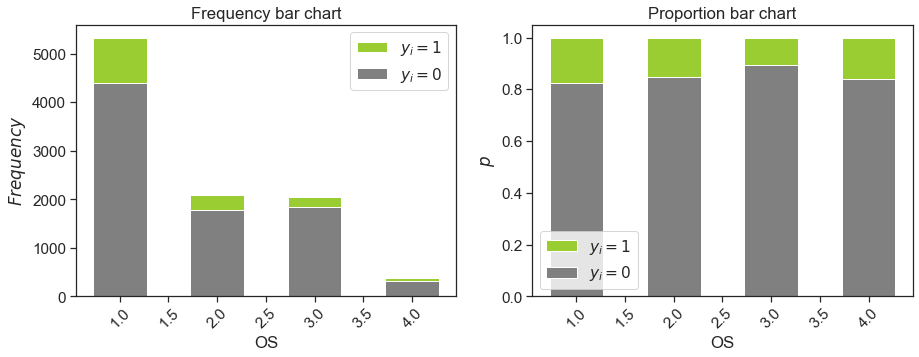

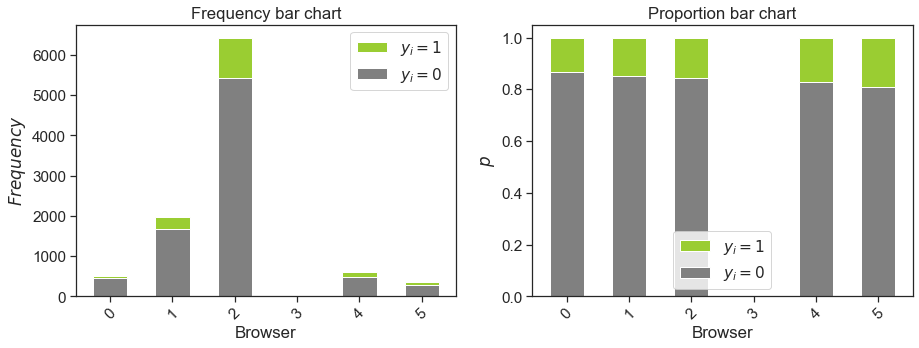

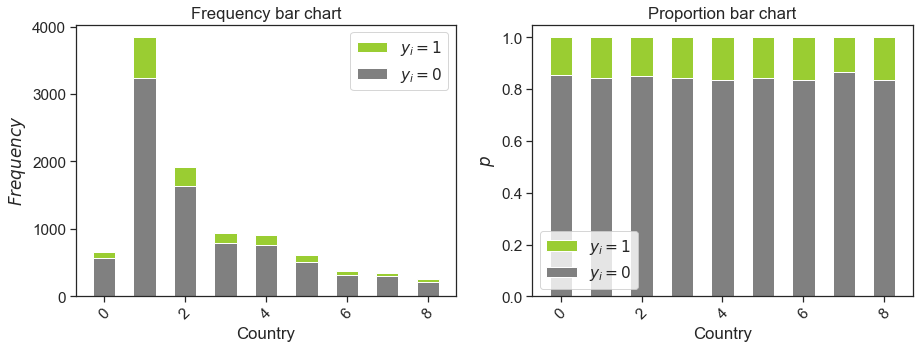

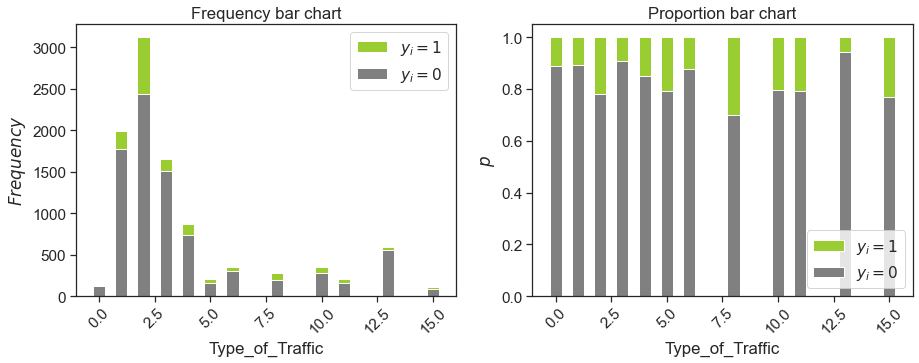

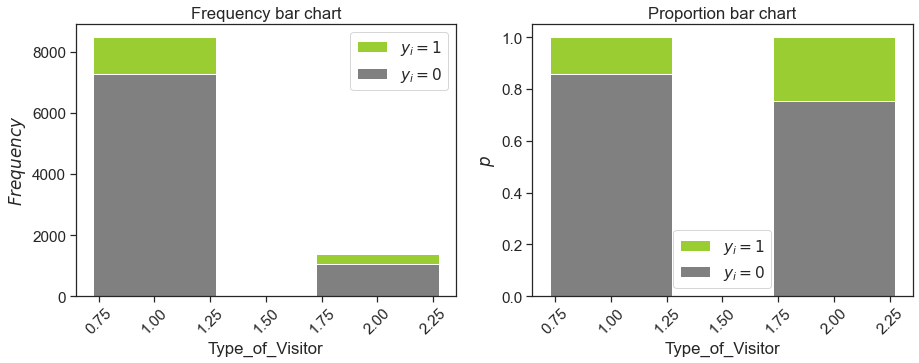

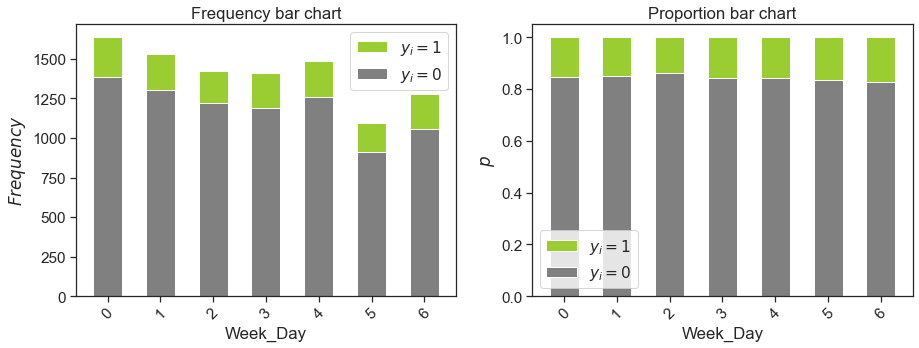

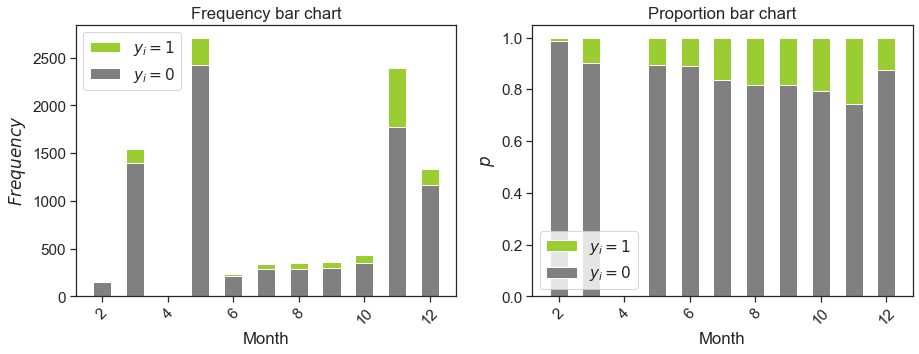

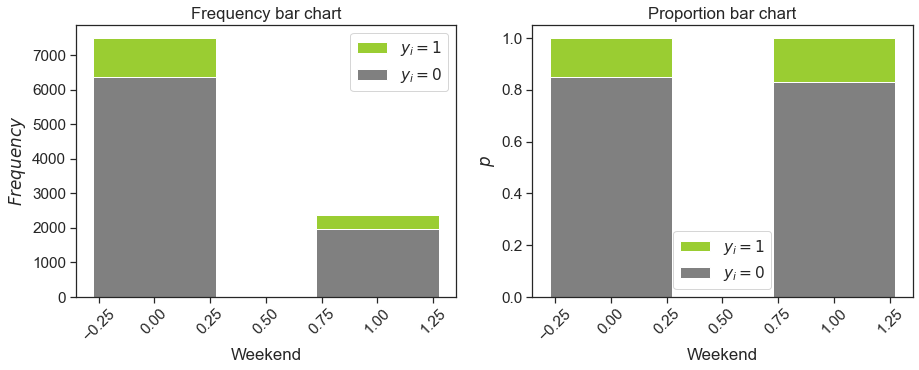

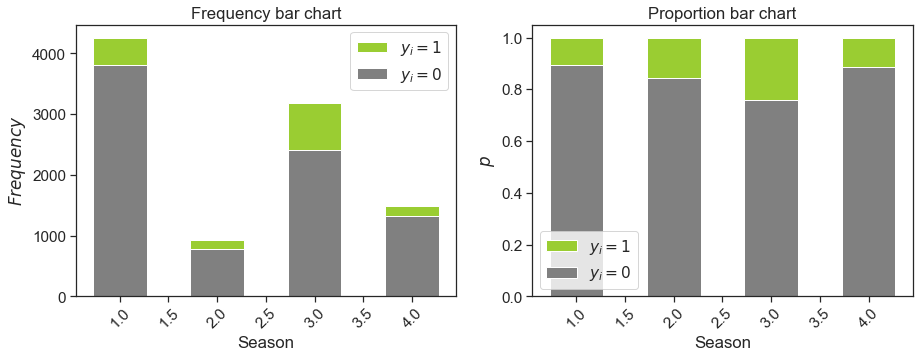

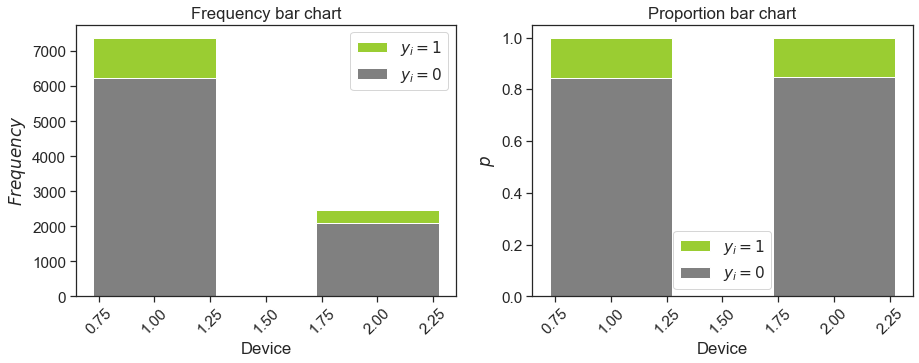

In [64]:
proportion_df = pd.concat([data, target], axis = 1)

for i in range(len(non_metric_features)):
    bar_charts_categorical(df = proportion_df, target = "Buy", feature = non_metric_features[i])

### Pairwise correlations

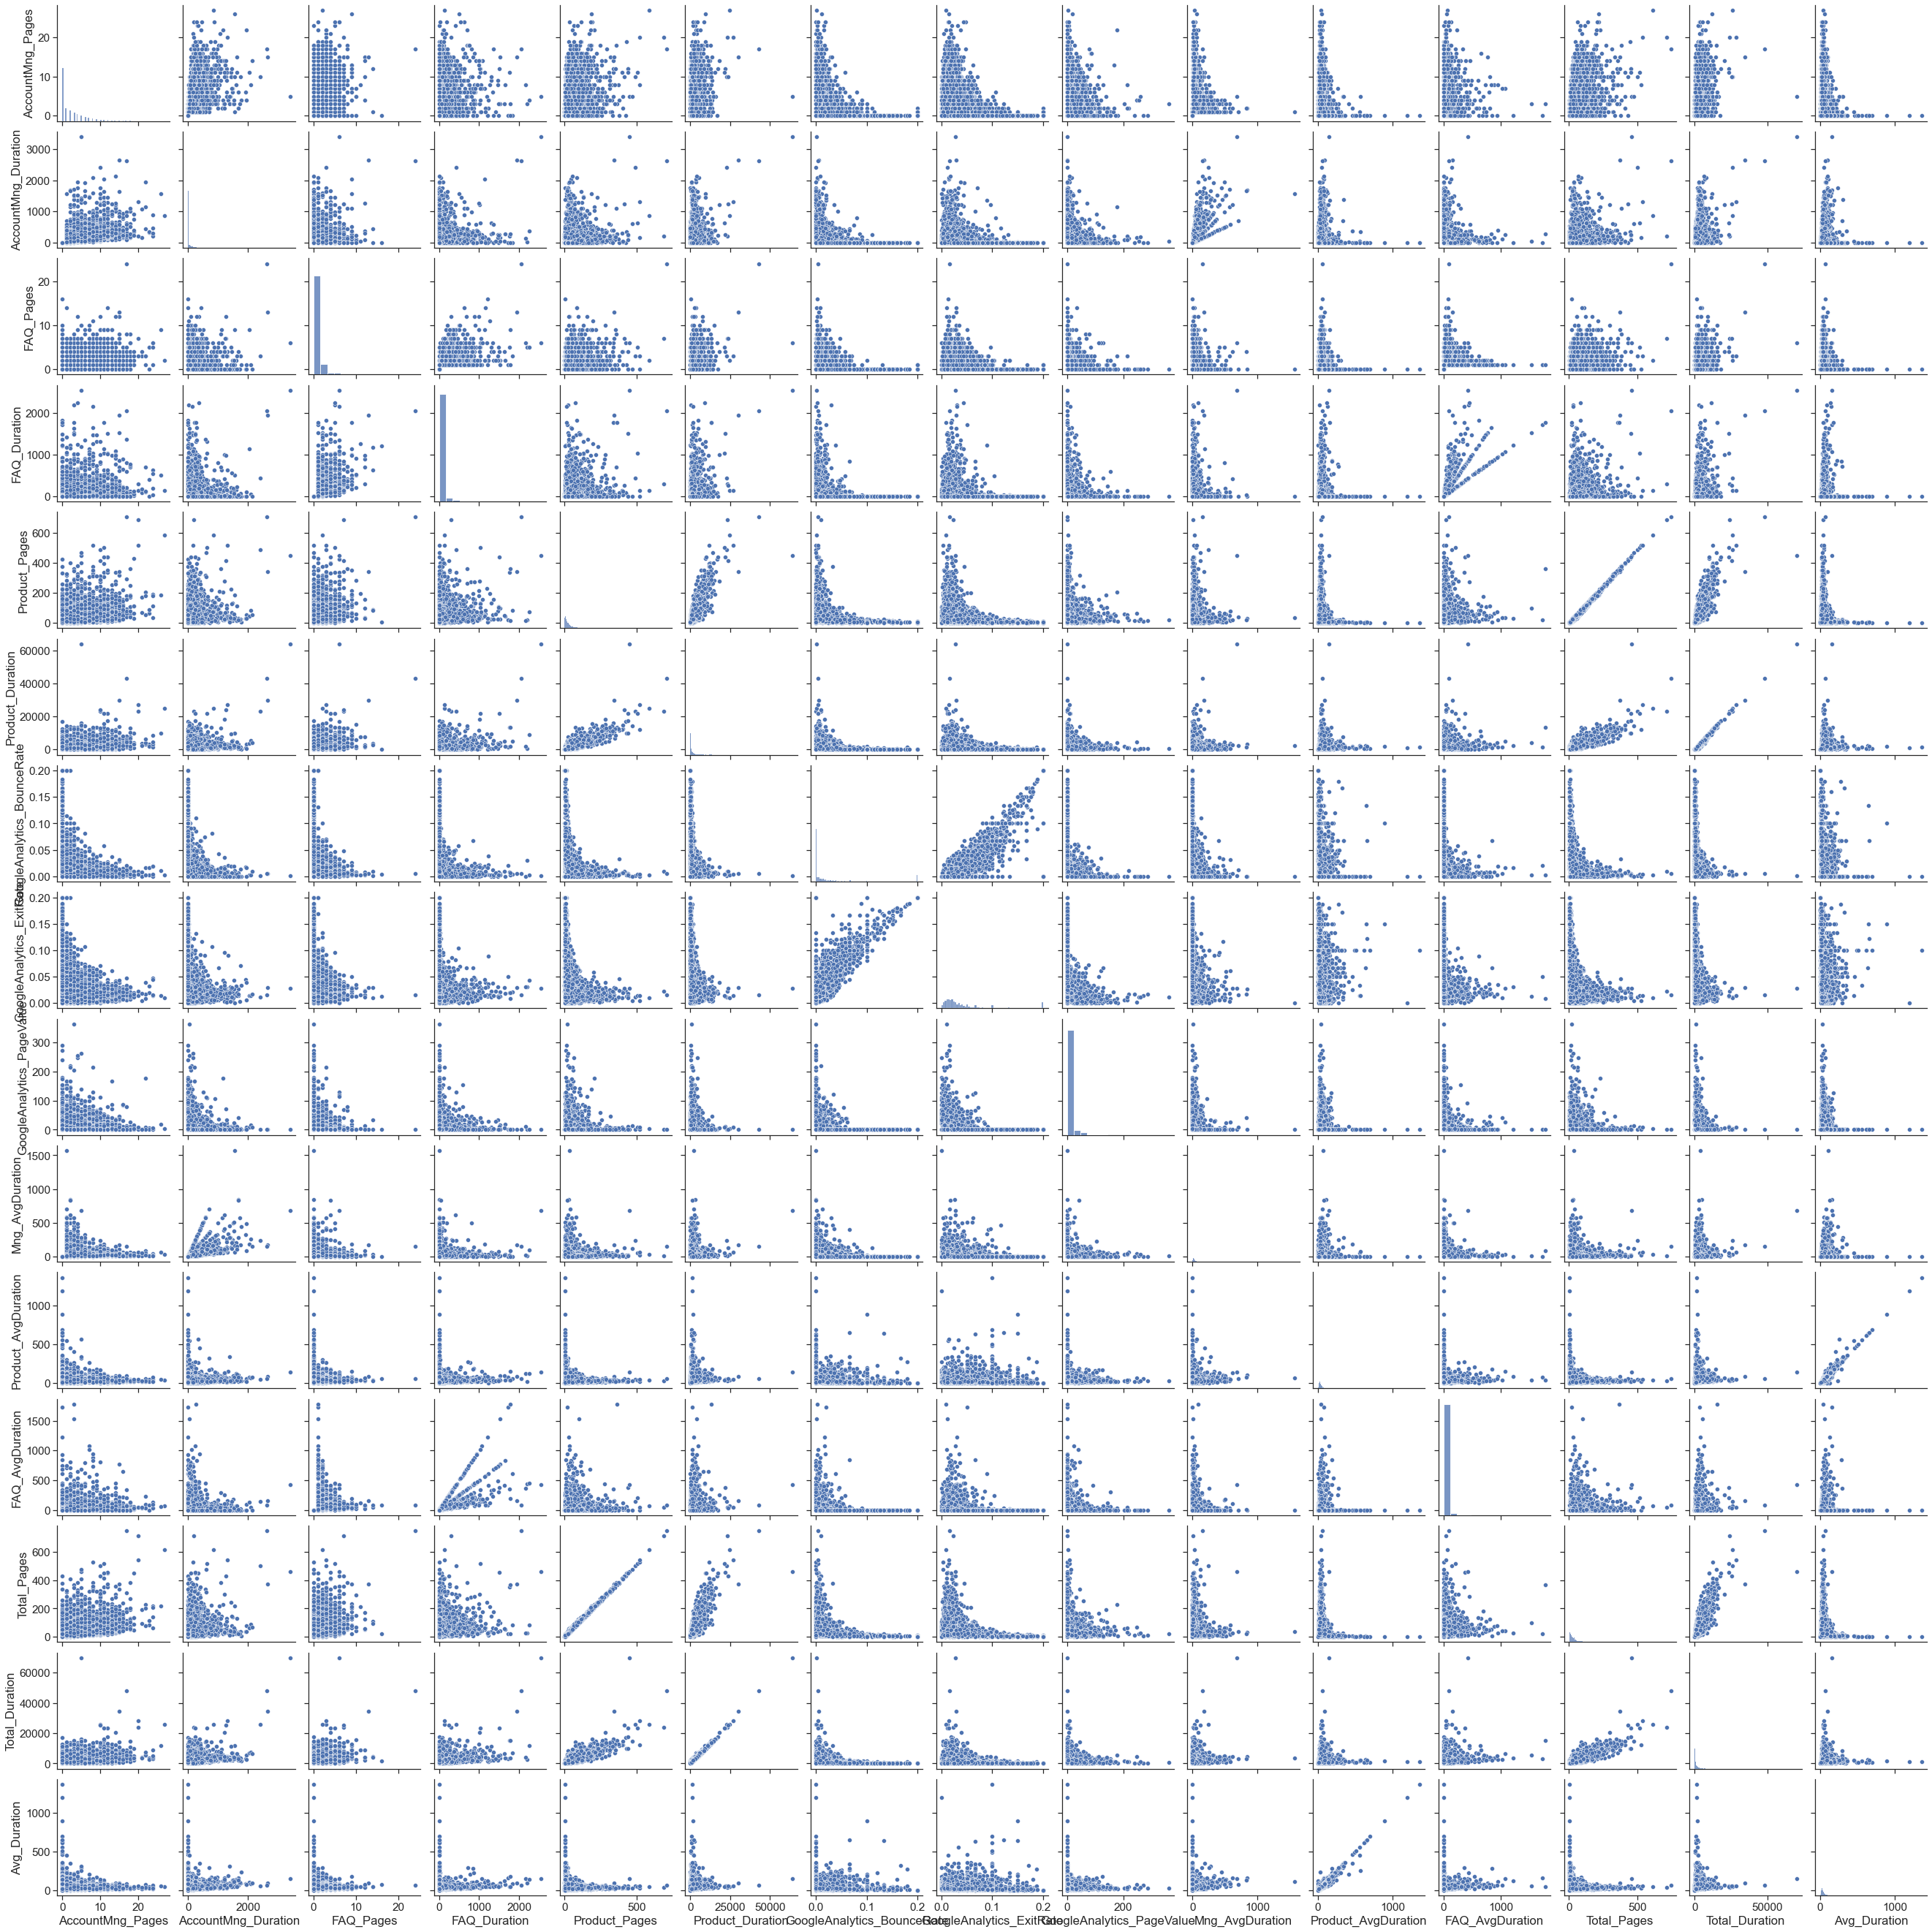

In [65]:
# plot only the original metric features (no sqrt or log10 transformation) for ease of visualisation
part_metric_features = pd.Series(metric_features)
part_metric_features = part_metric_features[~((part_metric_features.str.endswith("log10")) | (part_metric_features.str.endswith("sqrt")))]
sns.pairplot(data[part_metric_features])

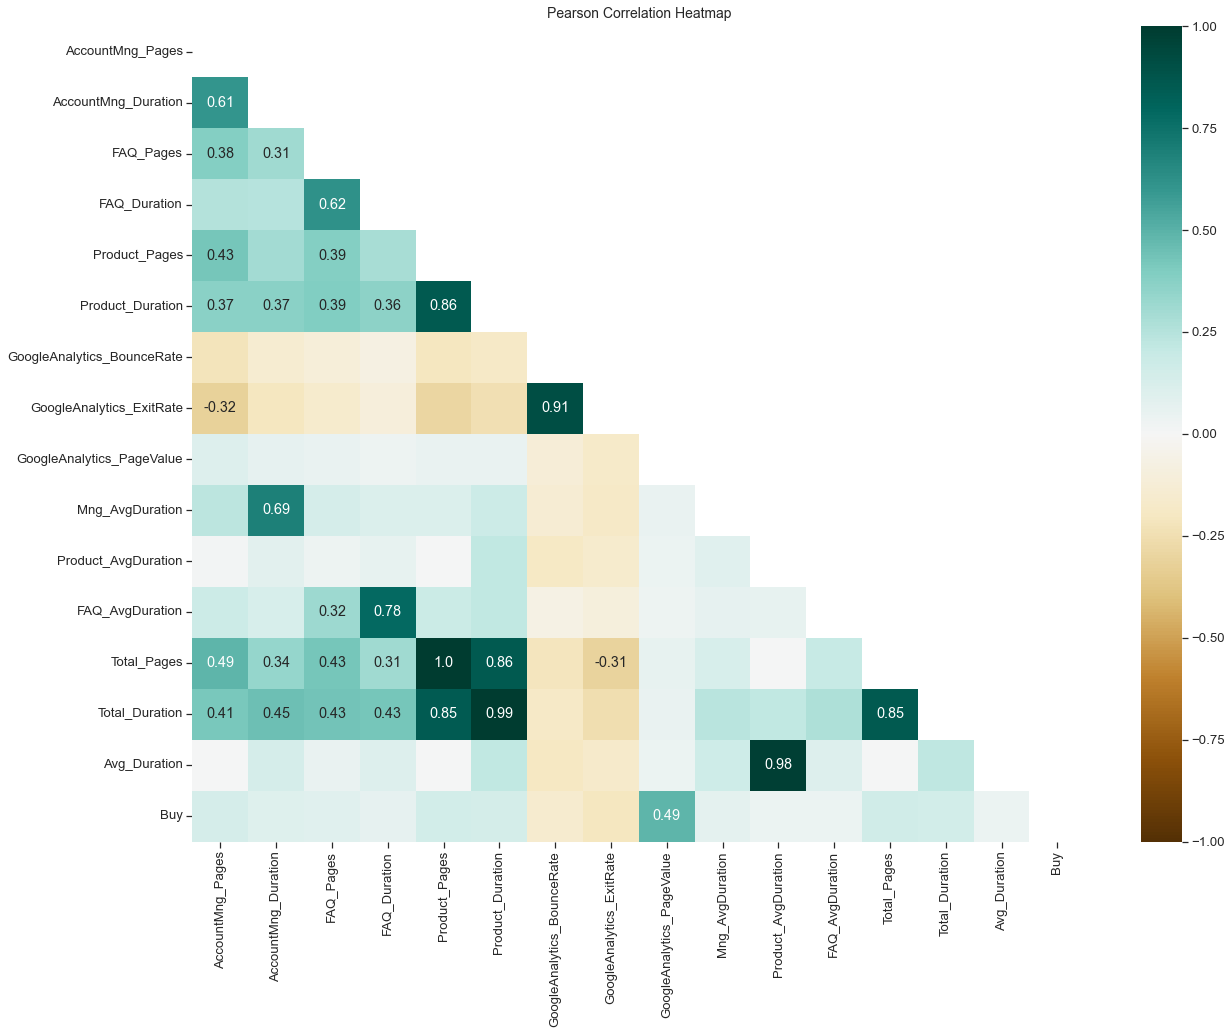

In [66]:
# convert non_metric_features to int to make them easier to handle downstream
data[non_metric_features] = data[non_metric_features].astype("int")
test[non_metric_features] = test[non_metric_features].astype("int")
X_train[non_metric_features] = X_train[non_metric_features].astype("int")
X_val[non_metric_features] = X_val[non_metric_features].astype("int")

# data[binary_features] = data[binary_features].astype("int")
# test[binary_features] = test[binary_features].astype("int")
# X_train[binary_features] = X_train[binary_features].astype("int")
# X_val[binary_features] = X_val[binary_features].astype("int")

# Correlation Heatmap
df_corr = pd.concat([data[list(part_metric_features)], target], axis = 1)

# spearman correlation heatmap
corr_heatmap(df_corr, 0.3, method = "pearson")

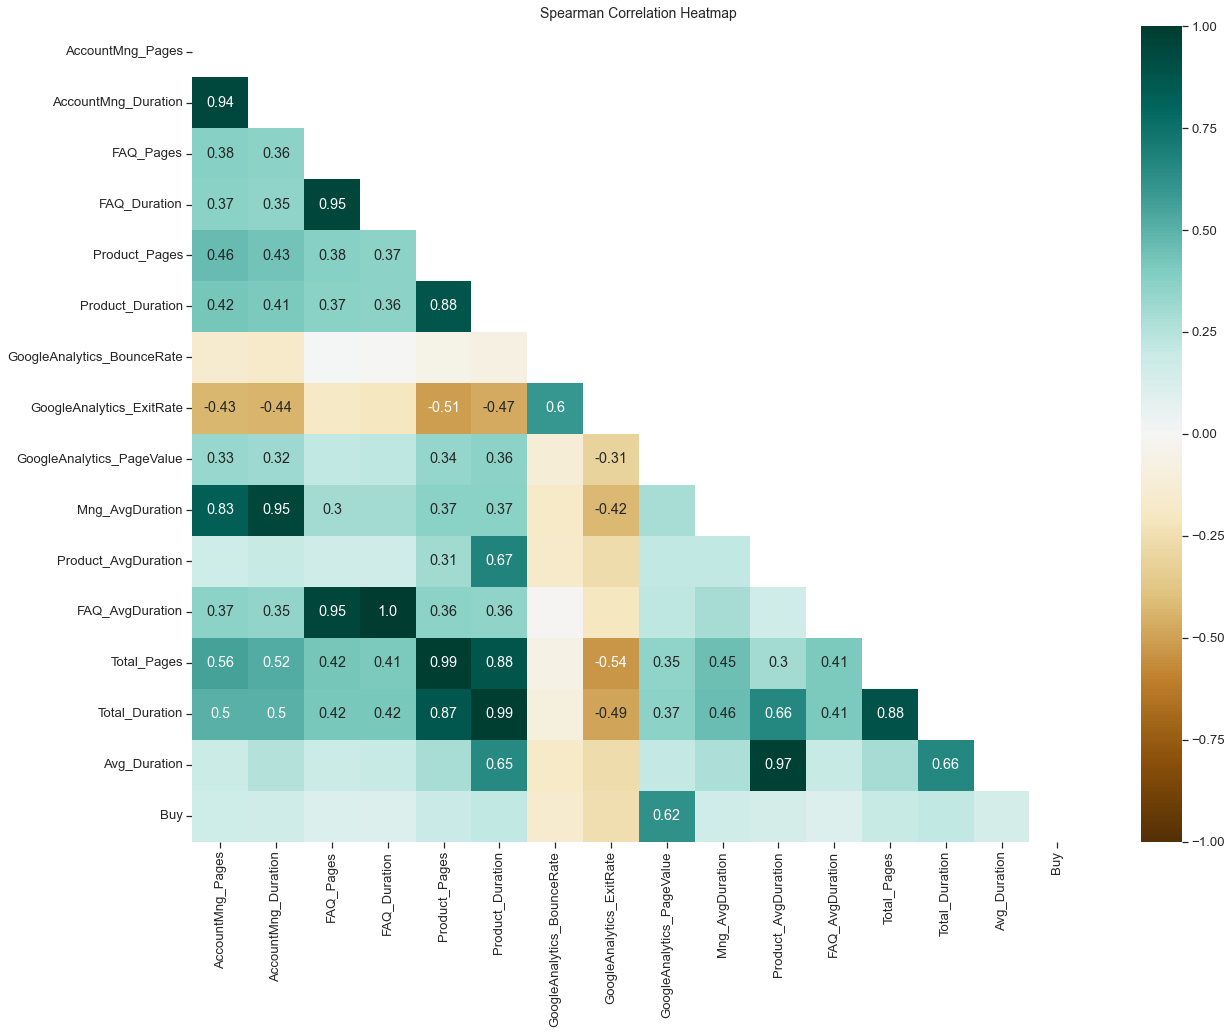

In [67]:
# pearson correlation heatmap
corr_heatmap(df_corr, 0.3, method = "spearman")

### Recursive Feature Elimination

In [68]:
# Recursive Feature Elimination
numfeats_list = np.arange(1, len(X_train[part_metric_features].columns)+1)
scores = {}

for n in range(len(numfeats_list)):
    logreg = LogisticRegression()
    rfe = RFE(estimator = logreg, n_features_to_select = numfeats_list[n])
        
    X_train_rfe = rfe.fit_transform(X_train_scaled[part_metric_features], y_train)
    X_val_rfe = rfe.transform(X_val_scaled[part_metric_features])
    logreg.fit(X_train_rfe, y_train)
        
    score = logreg.score(X_val_rfe, y_val)
    scores[n+1] = score

# RFE selected features
best_num_feats = max(scores, key = scores.get)
print(f"RFE selected {best_num_feats} metric features. Score: {round(scores[best_num_feats], 3)}")

rfe = RFE(estimator = logreg, n_features_to_select = best_num_feats)
rfe.fit(X = X_train_scaled[part_metric_features], y = y_train)
selected_features = pd.Series(rfe.support_, index = part_metric_features, name = "RFE")

print("Features discarded:")
print(list(selected_features[selected_features == False].index))

RFE selected 6 metric features. Score: 0.884
Features discarded:
['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Mng_AvgDuration', 'Product_AvgDuration', 'FAQ_AvgDuration', 'Avg_Duration']


### LASSO Coefficient

Lasso picked 9 variables and eliminated the other 6 variables.


GoogleAnalytics_ExitRate     -0.030632
FAQ_AvgDuration              -0.000027
AccountMng_Duration          -0.000000
FAQ_Duration                 -0.000000
Product_Pages                 0.000000
Product_AvgDuration           0.000000
Total_Duration                0.000000
Avg_Duration                  0.000000
FAQ_Pages                     0.000291
AccountMng_Pages              0.000628
Mng_AvgDuration               0.002803
GoogleAnalytics_BounceRate    0.003388
Product_Duration              0.008557
GoogleAnalytics_PageValue     0.009132
Total_Pages                   0.014121
Name: Lasso, dtype: float64

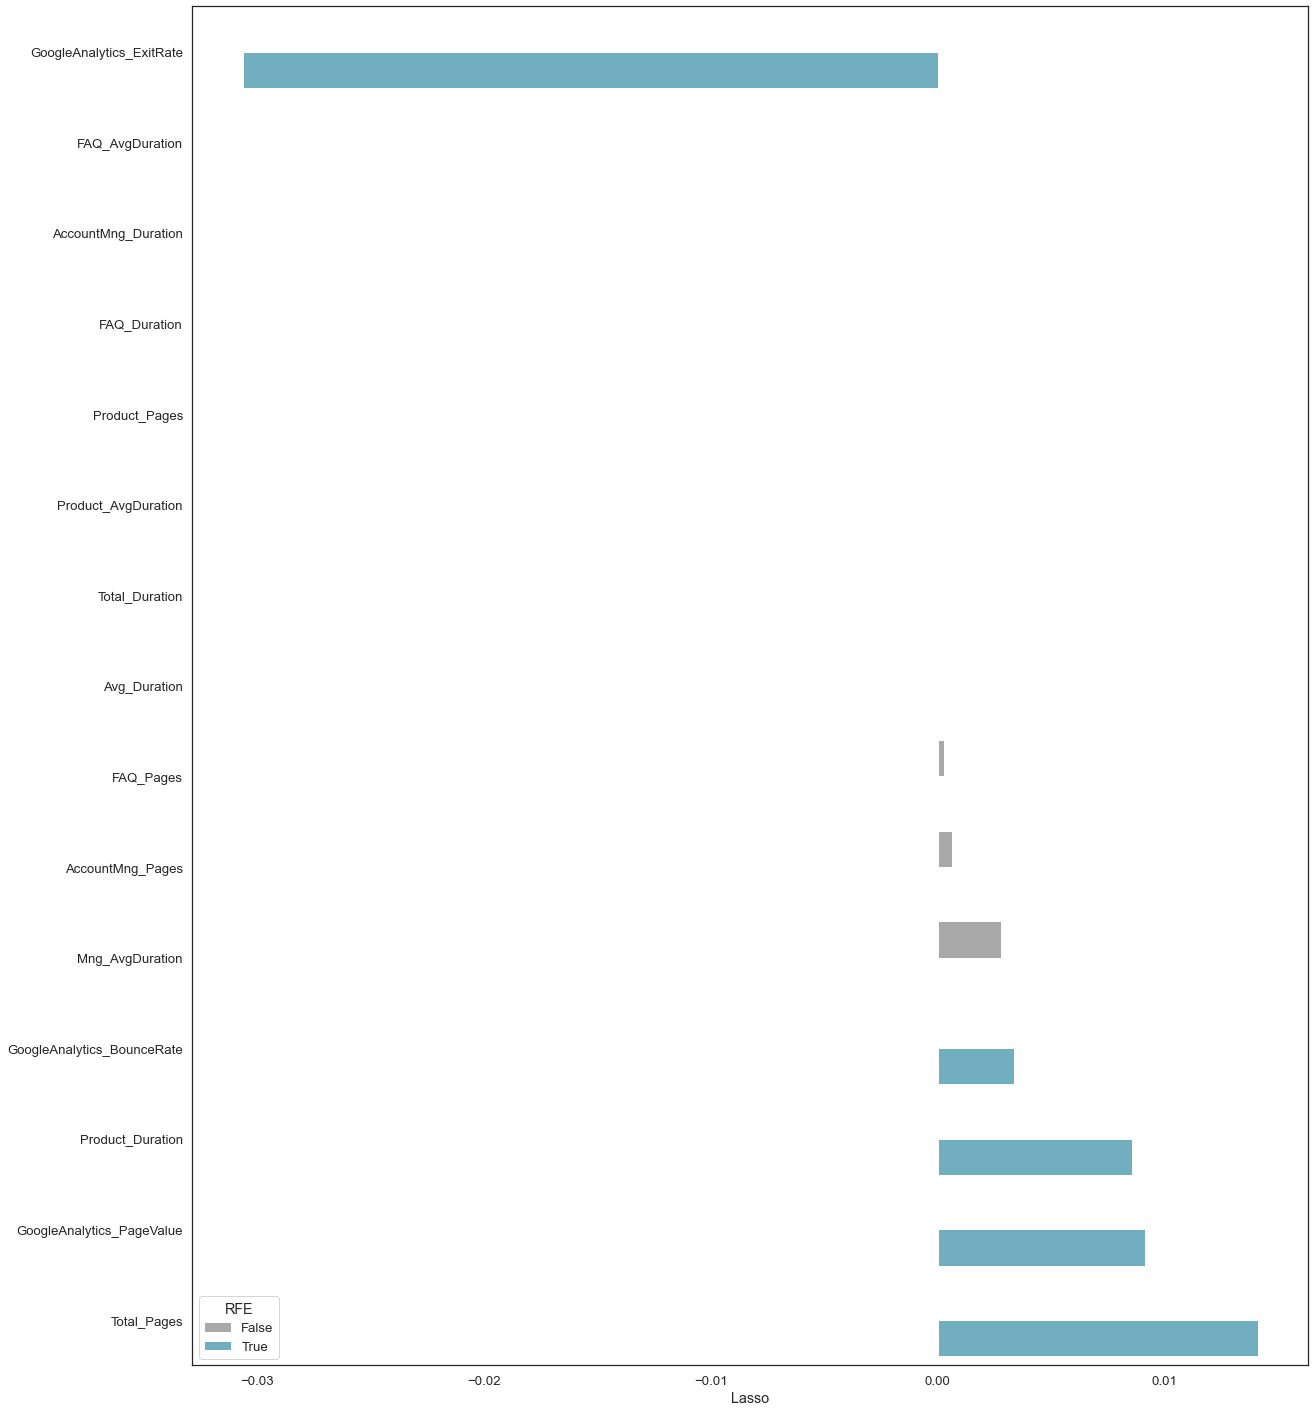

In [69]:
# LASSO Regression
reg = LassoCV()
reg.fit(X_train_scaled[part_metric_features], y_train)
lasso_coef = pd.Series(reg.coef_, index = part_metric_features, name = "Lasso")
print("Lasso picked " + str(sum(lasso_coef != 0)) + " variables and eliminated the other " +  str(sum(lasso_coef == 0)) + " variables.")

selection_df = pd.concat([selected_features, lasso_coef], axis = 1)

sns.set_style("white")
plt.subplots(figsize = [20, 25])
sns.barplot(data = selection_df,
    x = lasso_coef,
    y = selection_df.index,
    hue = "RFE",
    palette = ["darkgray", "C9"],
    order = list(selection_df.sort_values("Lasso").index)
)

lasso_coef.sort_values()

### RIDGE Regression

Best alpha using built-in RidgeCV: 450.000000
Best score using built-in RidgeCV: 0.266095


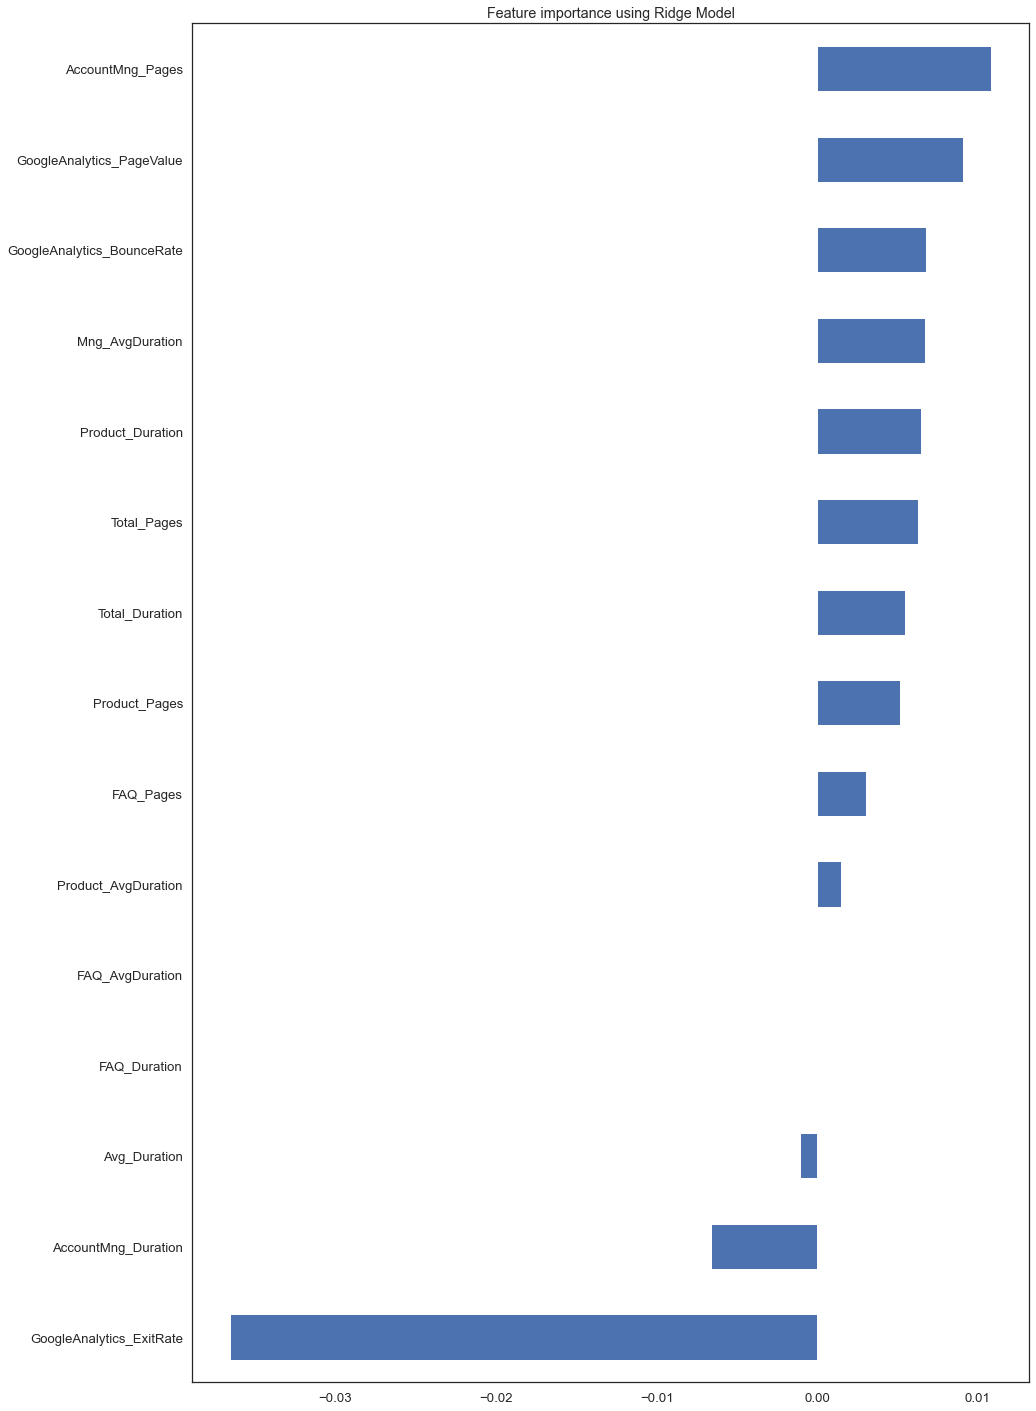

In [70]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(15,25))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

    return

# RIDGE: metric features
# alphas adjusted based on different attempts
ridge = RidgeCV(alphas = (1, 10, 100, 200, 430, 450, 480, 500, 550)).fit(X_train_scaled[part_metric_features], y_train)
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)
print("Best score using built-in RidgeCV: %f" %ridge.score(X_train_scaled[part_metric_features], y_train))
ridge_coef = pd.Series(ridge.coef_, index = part_metric_features)
ridge_coef.sort_values().tail(20)

plot_importance(ridge_coef,'Ridge')

### Chi-Squared Test

OS is IMPORTANT for Prediction
Browser is NOT an important predictor. (Discard Browser from model)
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction
Week_Day is NOT an important predictor. (Discard Week_Day from model)
Month is IMPORTANT for Prediction
Weekend is NOT an important predictor. (Discard Weekend from model)
Season is IMPORTANT for Prediction
Device is NOT an important predictor. (Discard Device from model)


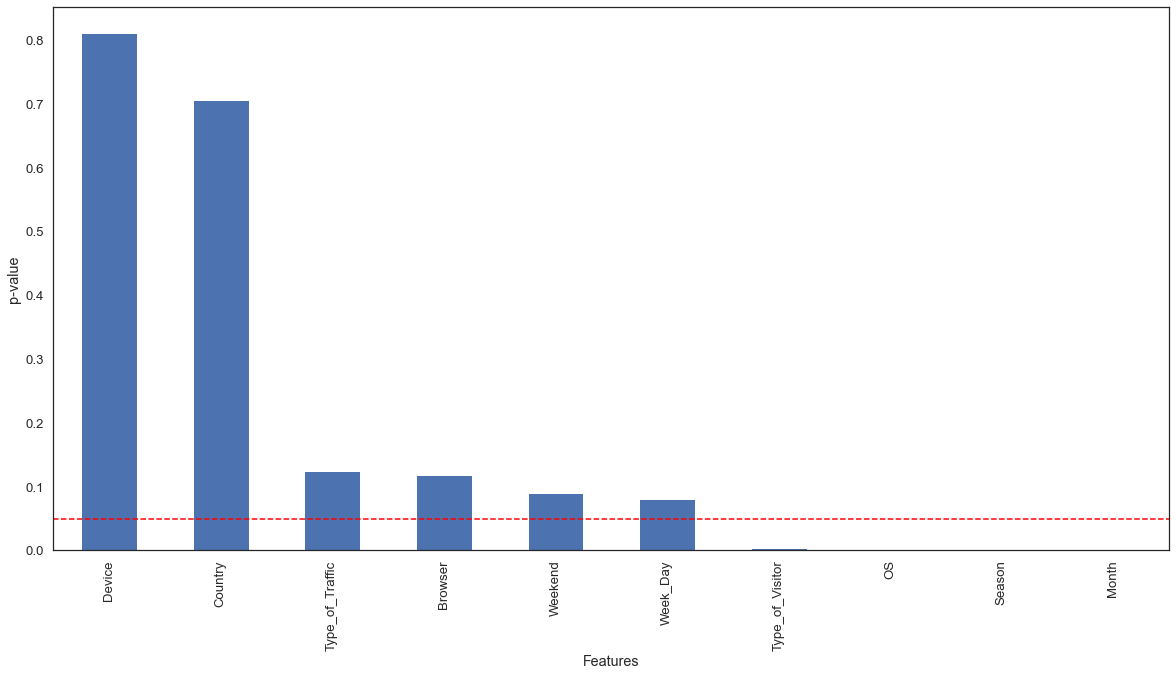

In [71]:
def TestIndependence(X,y,var,alpha=0.05):

    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

    return

# Chi-Squared test including both categorical and binary (OHC) features
for feat in X_train[non_metric_features].columns:
    TestIndependence(X_train[feat], y_train, feat)

chi_scores = chi2(X_train[non_metric_features], y_train)
p_values = pd.Series(chi_scores[1], index = non_metric_features)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(20,10))
p_values.plot.bar()
plt.xlabel("Features")
plt.ylabel("p-value")
plt.axhline(0.05, color = "red", linestyle = "--")

### Mutual Info Classifier

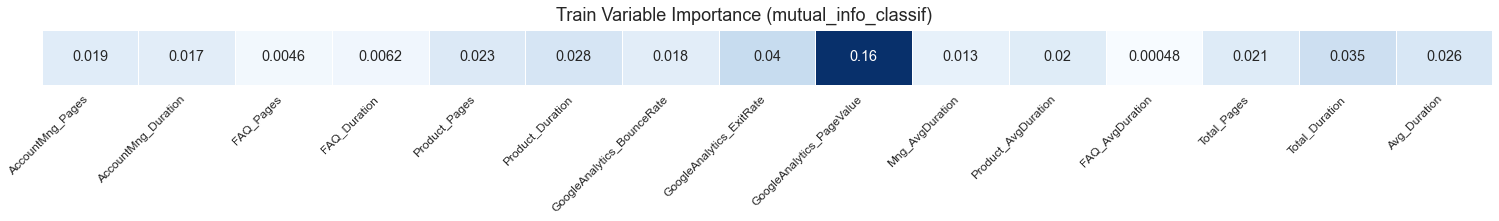

In [72]:
from sklearn.feature_selection import mutual_info_classif

# mutual info classifier for the metric_features
mutual_information = mutual_info_classif(X_train_scaled[part_metric_features], y_train, random_state = 123)
plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_train_scaled[part_metric_features].columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Train Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

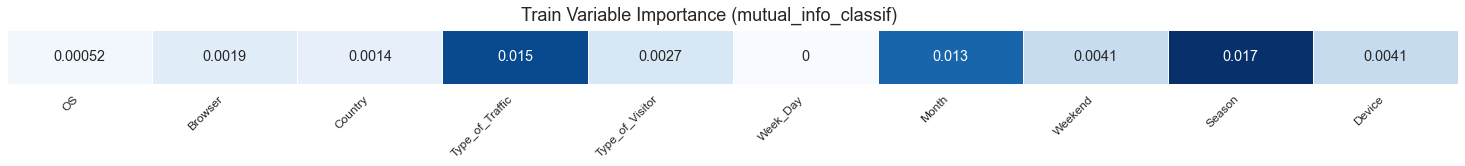

In [73]:
# mutual info classifier for categorical features
mutual_information = mutual_info_classif(X_train[non_metric_features], y_train, random_state = 123)
plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_train[non_metric_features].columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Train Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

### ANOVA

In [74]:
# SelectKBest to get features with best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k = 6).fit(X_train_scaled[part_metric_features], y_train)
fvalues = fvalue_selector.transform(X_train_scaled[part_metric_features])

# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = X_train_scaled[part_metric_features].iloc[:, cols]
features_to_keep.columns

Index(['Product_Pages', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Total_Pages',
       'Total_Duration'],
      dtype='object')

### Decision Tree Classifier

<AxesSubplot:xlabel='Value', ylabel='Feature'>

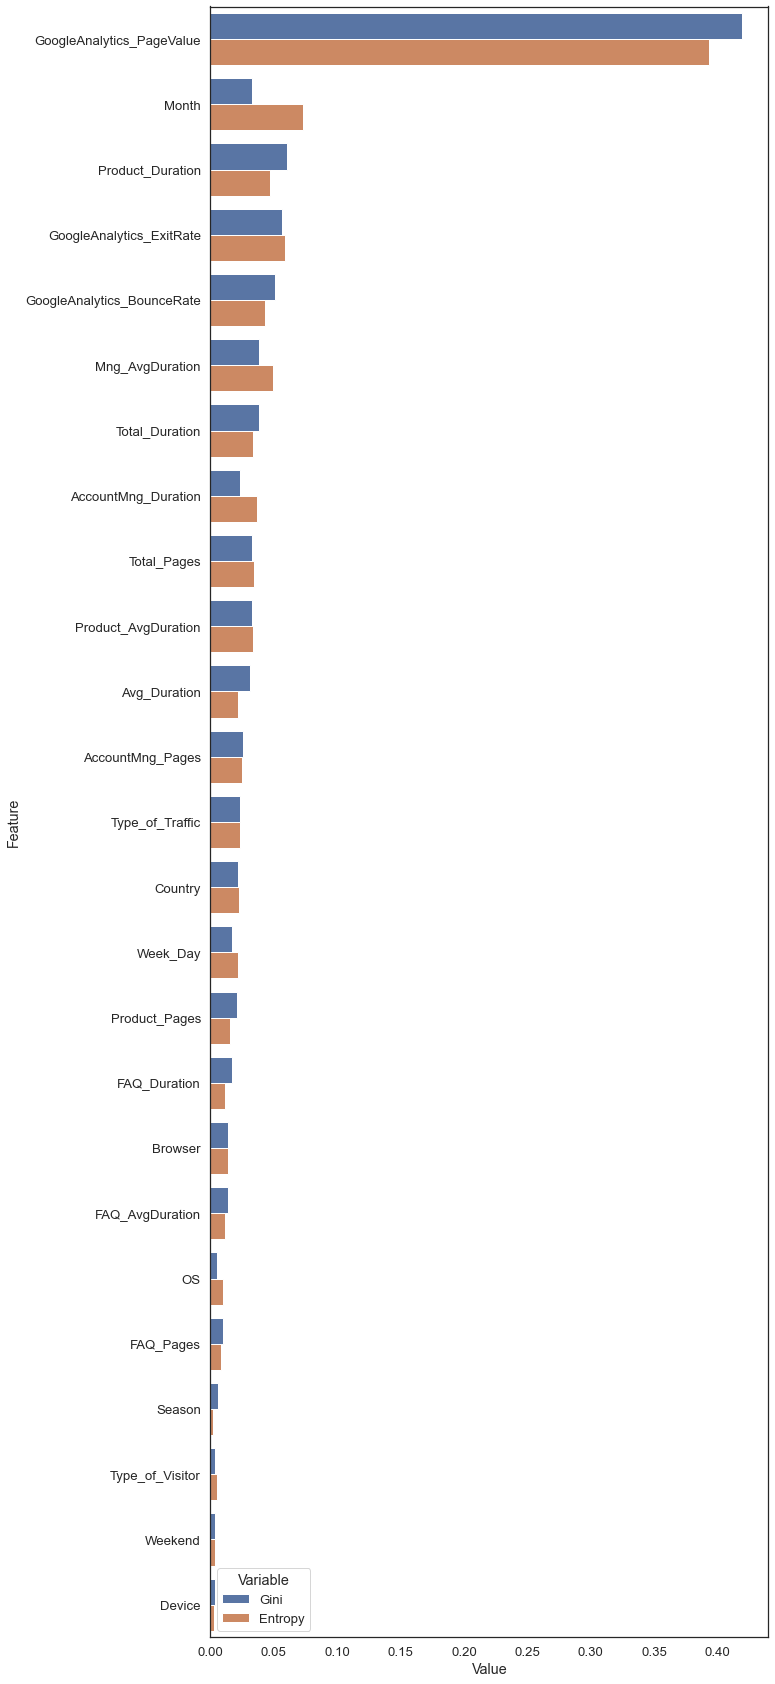

In [75]:
feat_names = pd.Series(list(part_metric_features)+non_metric_features, name = "Feature")

# decision tree with Gini
dt_gini = DecisionTreeClassifier().fit(X_train[list(part_metric_features)+non_metric_features], y_train)
gini_feat_imp = pd.Series(dt_gini.feature_importances_, name = "Gini")

# decision tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion = "entropy").fit(X_train[list(part_metric_features)+non_metric_features], y_train)
entropy_feat_imp = pd.Series(dt_entropy.feature_importances_, name = "Entropy")

# merge everything in a single dataframe
tree_imp_df = pd.concat([gini_feat_imp, entropy_feat_imp, feat_names], axis = 1)
tree_imp_df = tree_imp_df.melt(id_vars = "Feature").rename(columns=str.title)
tree_imp_df.sort_values(['Value'], ascending = False, inplace = True)

# plot figure
plt.figure(figsize=(10,30))
sns.barplot(data = tree_imp_df, x = "Value", hue = "Variable", y = "Feature")

<AxesSubplot:xlabel='Value', ylabel='Feature'>

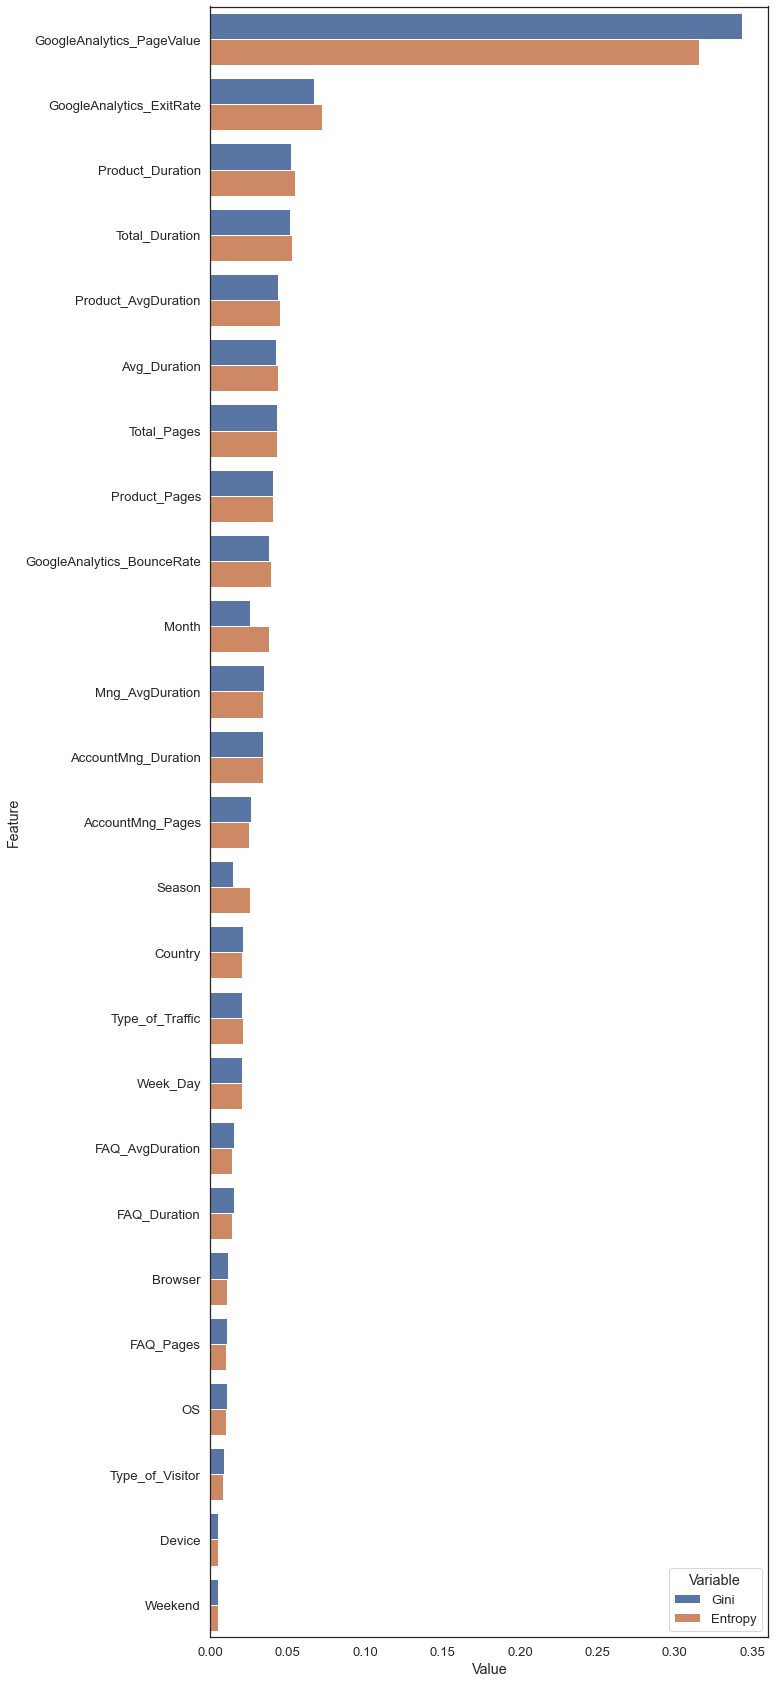

In [76]:
# random forest with Gini
rfclf_gini = RandomForestClassifier(n_estimators=1000, random_state=15, n_jobs=-1).fit(X_train[list(part_metric_features)+non_metric_features], y_train)
gini_feat_imp = pd.Series(rfclf_gini.feature_importances_, name = "Gini")

# random forest with Entropy
rfclf_entropy = RandomForestClassifier(n_estimators=1000, criterion = "entropy", random_state=15, n_jobs=-1).fit(X_train[list(part_metric_features)+non_metric_features], y_train)
entropy_feat_imp = pd.Series(rfclf_entropy.feature_importances_, name = "Entropy")

# merge everything in a single dataframe
rf_imp_df = pd.concat([gini_feat_imp, entropy_feat_imp, feat_names], axis = 1)
rf_imp_df = rf_imp_df.melt(id_vars = "Feature").rename(columns=str.title)
rf_imp_df.sort_values(['Value'], ascending = False, inplace = True)

# plot figure
plt.figure(figsize=(10,30))
sns.barplot(data = rf_imp_df, x = "Value", hue = "Variable", y = "Feature")

### AdaBoost

<AxesSubplot:xlabel='importances', ylabel='features'>

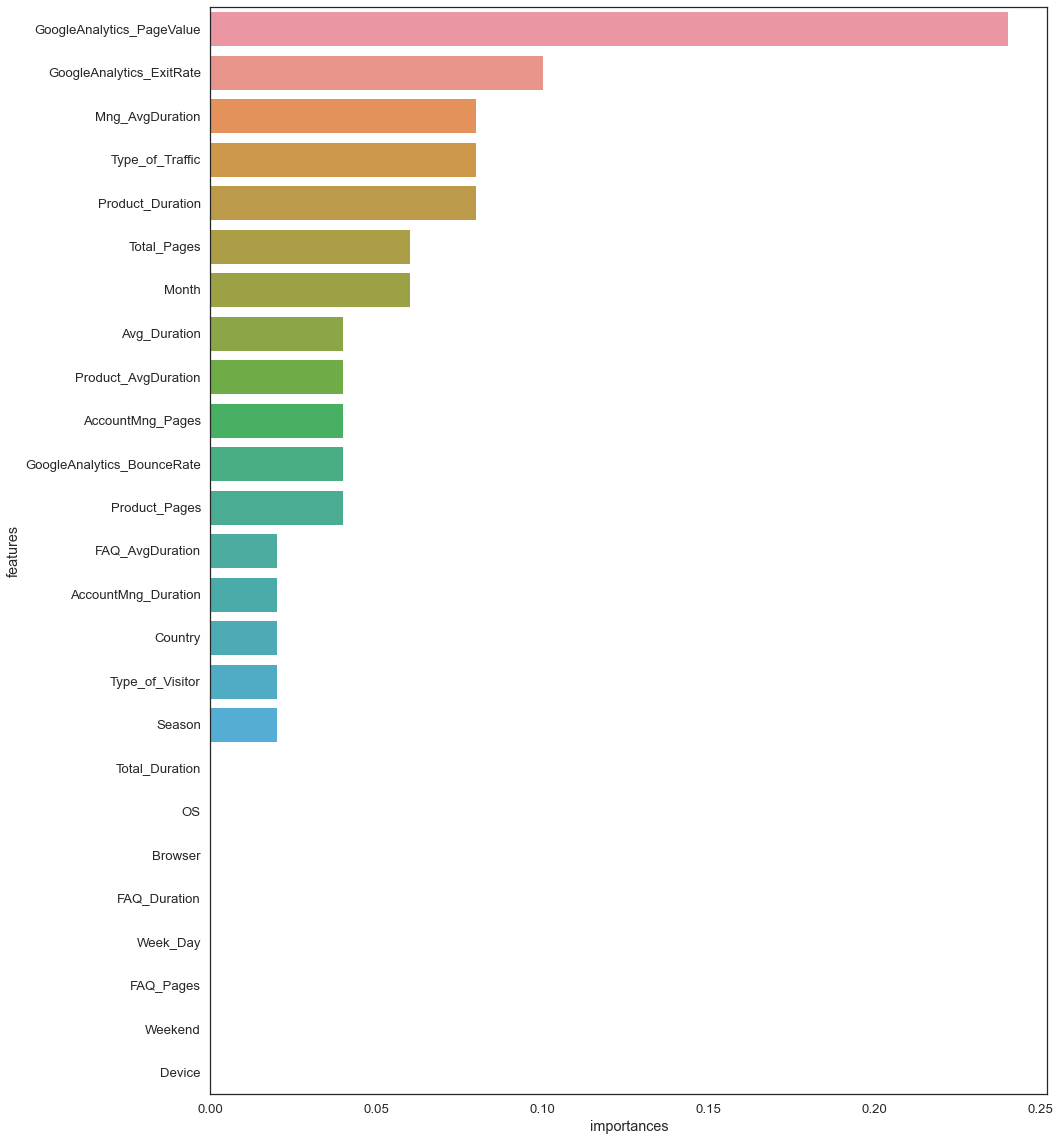

In [77]:
abclf = AdaBoostClassifier(random_state = 123).fit(X_train[list(part_metric_features)+non_metric_features], y_train)

plt.figure(figsize=(15,20))
importances = abclf.feature_importances_
features = list(part_metric_features)+non_metric_features
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], orient = 'h')

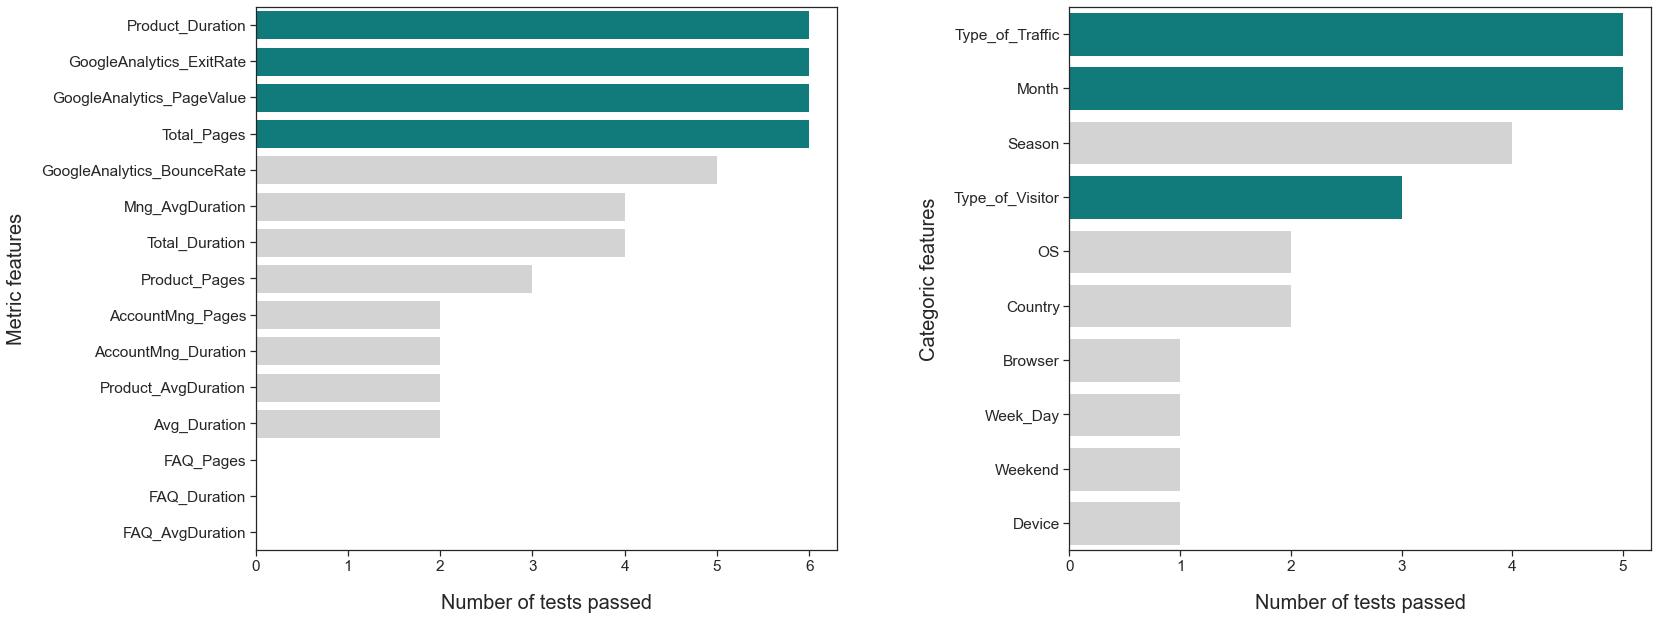

In [78]:
# create dataframe based on the results obtained for the metric features
# 1 and 0 is assigned to each feature for each test based on designated cut-off points
metric_selection_df = pd.DataFrame(index = part_metric_features)
metric_selection_df["RFE"] = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
metric_selection_df["Lasso"] = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
metric_selection_df["Ridge"] = [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
metric_selection_df["MIC"] = [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
metric_selection_df["RFC"] = [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
metric_selection_df["AB"] =  [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]
metric_selection_df["Total"] = metric_selection_df[list(metric_selection_df.columns)].sum(axis=1)
# sort values in descending order, add binary feature for those selected
metric_selection_df = metric_selection_df.sort_values("Total", ascending = False)
metric_selection_df["Selected"] = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# create dataframe based on the results obtained for categoric features
# 1 and 0 is assigned to each feature for each test based on designated cut-off points
cat_selection_df = pd.DataFrame(index = non_metric_features)
cat_selection_df["ChiSquared"] = [2, 0, 0, 2, 2, 0, 2, 0, 2, 0] # extra weight to chi-squared test
cat_selection_df["MIC"] = [0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
cat_selection_df["RFC"] = [0, 0, 1, 1, 0, 1, 1, 0, 1, 0]
cat_selection_df["AB"] =  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
cat_selection_df["Total"] = cat_selection_df[list(cat_selection_df.columns)].sum(axis=1)
# sort values in descending order
cat_selection_df = cat_selection_df.sort_values("Total", ascending = False)
cat_selection_df["Selected"] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0]

# plot results for both metric and categoric features and establish a threshold
sns.set(style = "ticks", font_scale = 1.4)
fig, axes = plt.subplots(1, 2, figsize = [25, 10])
fig.subplots_adjust(wspace = 0.4)

for ax, df in zip(axes.flatten(), [metric_selection_df, cat_selection_df]):
    sns.barplot(
        x = df.Total,
        y = df.index,
        palette = ["darkcyan" if x == 1 else "lightgray" for x in df.Selected],
        ax = ax
    )
    ax.set_xlabel("Number of tests passed", fontsize = 20, labelpad = 20)

axes[0].set_ylabel("Metric features", fontsize = 20, labelpad = 15)
axes[1].set_ylabel("Categoric features", fontsize = 20, labelpad = 15)

plt.savefig('FeatureSelection_Barplots.jpeg', dpi=300, bbox_inches='tight')

### Selecting final features, scaling, OneHotEncoding

In [79]:
# Product_AvgDuration and Mng_AvgDuration may be useful but were mediocre in feature selection
metric_features_normal = [
    "GoogleAnalytics_PageValue",
    "GoogleAnalytics_ExitRate",
    "Total_Pages",
    "Product_Duration",
]

metric_features_log = [
    "GoogleAnalytics_PageValue_log10",
    "GoogleAnalytics_ExitRate_log10",
    "Total_Pages_log10",
    "Product_Duration_log10",
]

categorical_feats = [
    "Month", # alternatively, Season
    "Type_of_Visitor",
    "Type_of_Traffic"
]

# update dataframes to only contain seleced features
data = data[set(metric_features_normal + metric_features_log + categorical_feats)]
test = test[set(metric_features_normal + metric_features_log + categorical_feats)]
data_scaled = data_scaled[set(metric_features_normal + metric_features_log + categorical_feats)]
test_scaled = test_scaled[set(metric_features_normal + metric_features_log + categorical_feats)]

X_train = X_train[set(metric_features_normal + metric_features_log + categorical_feats)]
X_val = X_val[set(metric_features_normal + metric_features_log + categorical_feats)]
X_train_scaled = X_train_scaled[set(metric_features_normal + metric_features_log + categorical_feats)]
X_val_scaled = X_val_scaled[set(metric_features_normal + metric_features_log + categorical_feats)]

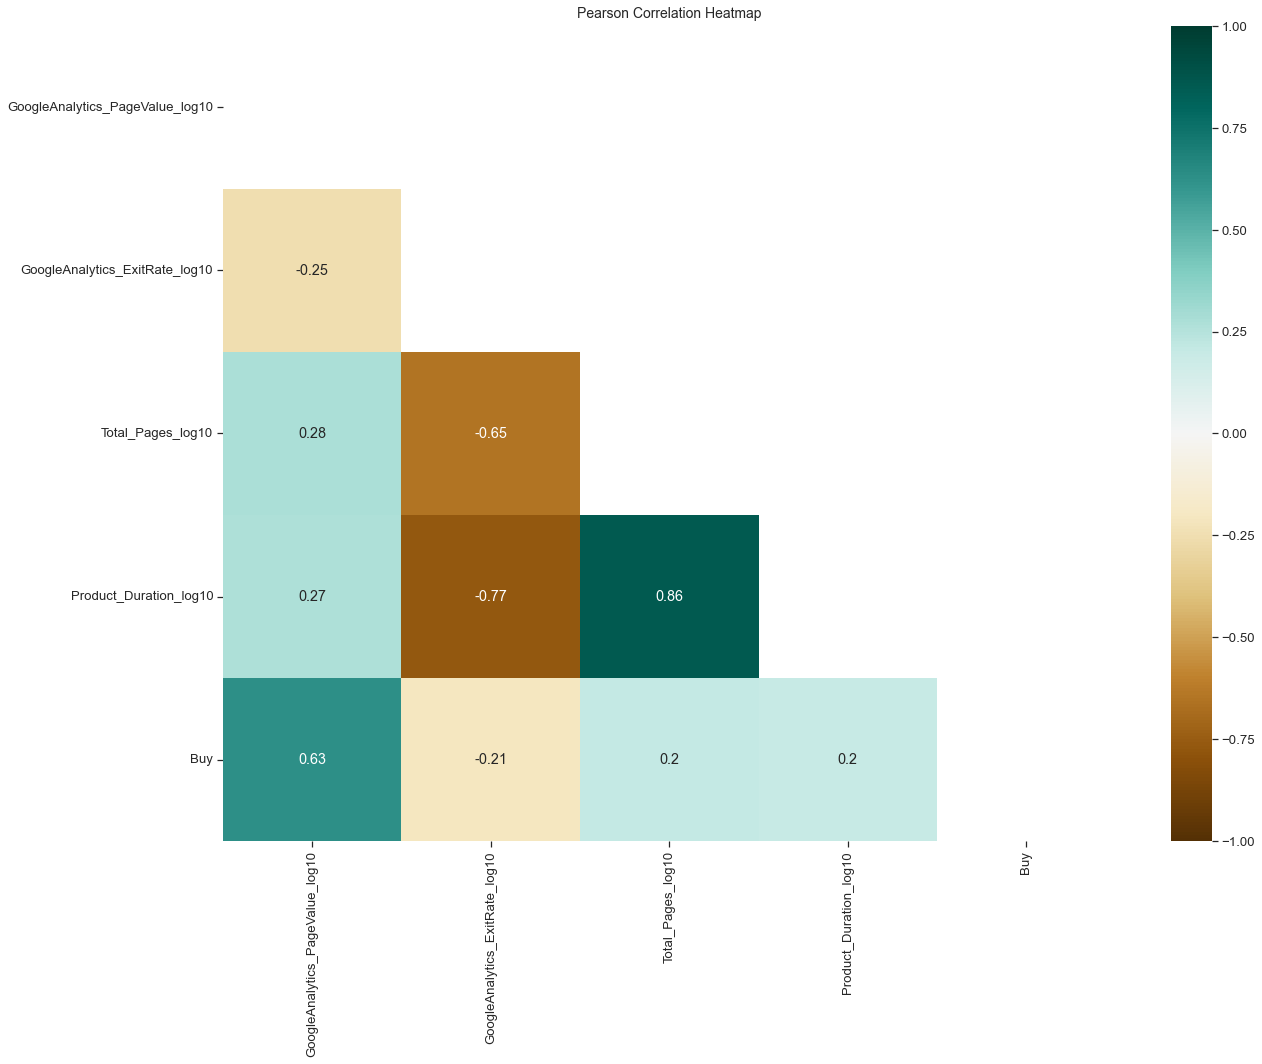

In [80]:
# compared to unstransformed metric features
df_corr = pd.concat([data[metric_features_log], target], axis = 1)

corr_heatmap(df_corr, 0, method = "pearson")

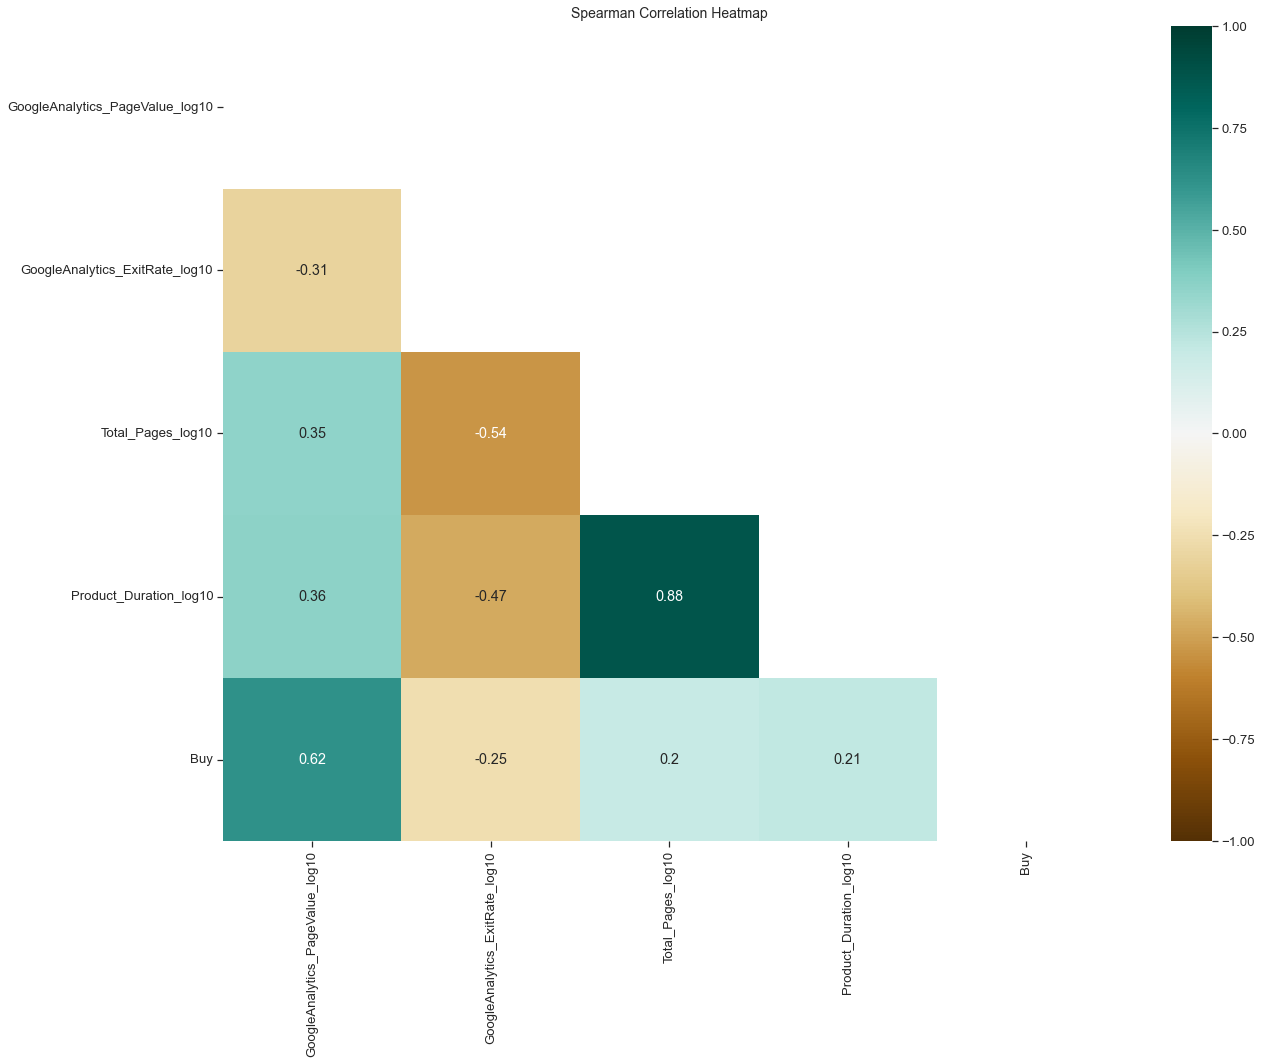

In [81]:
corr_heatmap(df_corr, 0, method = "spearman")

In [82]:
def onehotencode_categoricals(train, test, cat_features):

    encoder = OneHotEncoder(sparse = False, drop = None, handle_unknown = "ignore")
    ohc_train = encoder.fit_transform(np.array(train[cat_features]))
    ohc_test = encoder.transform(np.array(test[cat_features]))
    ohc_features = encoder.get_feature_names()
    ohc_train_df = pd.DataFrame(ohc_train, index = train.index, columns = ohc_features)
    ohc_test_df = pd.DataFrame(ohc_test, index = test.index, columns = ohc_features)
    train_ohc = pd.concat([train, ohc_train_df], axis = 1).drop(columns = cat_features)
    test_ohc = pd.concat([test, ohc_test_df], axis = 1).drop(columns = cat_features)

    return (train_ohc, test_ohc)

In [83]:
# onehotencoded categorical features of data and test dataframes (not scaled and scaled versions)
data_ohc, test_ohc = onehotencode_categoricals(data, test, categorical_feats)
data_ohc_scaled, test_ohc_scaled = onehotencode_categoricals(data_scaled, test_scaled, categorical_feats)

# onehotencoded categorical features of X_train and X_val (not scaled and scaled versions)
X_train_ohc, X_val_ohc = onehotencode_categoricals(X_train, X_val, categorical_feats)
X_train_ohc_scaled, X_val_ohc_scaled = onehotencode_categoricals(X_train_scaled, X_val_scaled, categorical_feats)

# store the onehotencoded columns arising from each categorical feature
month_bundle = X_train_ohc.columns[[X_train_ohc.columns.str.startswith("x0_")]].tolist()
visitor_bundle = X_train_ohc.columns[[X_train_ohc.columns.str.startswith("x1_")]].tolist()
traffic_bundle = X_train_ohc.columns[[X_train_ohc.columns.str.startswith("x2_")]].tolist()

In [84]:
# drop one type of visitor (only two types possible, no need for two columns)
# couldnt do this in onehotencode because of handle_unknown = "ignore"
# rename columns
dfs = [
    data_ohc,
    test_ohc,
    data_ohc_scaled,
    test_ohc_scaled,
    X_train_ohc,
    X_val_ohc,
    X_train_ohc_scaled,
    X_val_ohc_scaled
]

for df in dfs:
    df.drop(columns = "x1_2", inplace = True)
    df.rename(columns = {"x1_1": "Type_of_Visitor"}, inplace = True)

# all ohc cat features selected in a single list
sel_cat_bundles = month_bundle + traffic_bundle

In [85]:
# RECAP OF IMPORTANT DATAFRAMES

# To be used on Kaggle submissions (depending on model):

# | BASE |    OHC   |    SCALED   |  SCALED + OHC   |
# | ----------------------------------------------- |
# | data | data_ohc | data_scaled | data_ohc_scaled |
# | test | test_ohc | test_scaled | test_ohc_scaled |
# (target)

# To be used for inhouse testing (depending on model):

# |    BASE  |    OHC      |    SCALED      |   SCALED + OHC     |
# | ------------------------------------------------------------ |
# |  X_train | X_train_ohc | X_train_scaled | X_train_ohc_scaled |
# |  X_val   | X_val_ohc   | X_val_scaled   | X_val_ohc_scaled   |

# Select features as required

# Modelling

### Functions for modelling

In [86]:
# get evaluators of predicted values

def evaluate_estimator(model, X_train, y_train, verbose = False):

    skfold = StratifiedKFold(n_splits = 5)
    results = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = skfold)
    results = pd.DataFrame(results)

    accuracy = round(results.test_accuracy.mean()*100, 3)
    precision = round(results.test_precision.mean()*100, 3)
    recall = round(results.test_recall.mean()*100, 3)
    f1 = round(results.test_f1.mean()*100, 3)

    if verbose == True:
        print("Metrics (training):")
        print(f"Accuracy: {accuracy} %")
        print(f"Precision: {precision} %")
        print(f"Recall: {recall} %")
        print(f"F1 score: {f1} %")

    return (accuracy, precision, recall, f1)


def categorical_metrics(y_val, y_pred, verbose):
    
    # metrics for this decision tree
    conf_matrix = metrics.confusion_matrix(y_val, y_pred)
    conf_matrix = pd.DataFrame(conf_matrix)
    accuracy = round(metrics.accuracy_score(y_val, y_pred)*100, 2)
    precision = round(metrics.precision_score(y_val, y_pred)*100, 2)
    recall = round(metrics.recall_score(y_val, y_pred)*100, 2)
    f1 = round(metrics.f1_score(y_val, y_pred)*100, 2)
    if verbose:
        print("Accuracy:", accuracy, "%")
        print("Precision:", precision, "%")
        print("Recall:", recall, "%")
        print("F1 score:", f1, "%")
        print("Confusion matrix:\n", conf_matrix)
    
    return (accuracy,precision,recall,f1)

In [87]:
def plot_roc_curve(model, X_val, y_val):

    y_pred_proba = model.predict_proba(X_val)
    yhat_positive = y_pred_proba[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, yhat_positive)

    plt.plot(fpr, tpr, marker='.')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    roc_auc = roc_auc_score(y_val, yhat_positive)
    print('AUROC: %.3f' % roc_auc)

    fpr, tpr, thresholds = roc_curve(y_val, yhat_positive)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold: %f' % (best_thresh))

    return


def plot_pr_curve(model, X_val, y_val):

    y_pred_proba = model.predict_proba(X_val)
    yhat_positive = y_pred_proba[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, yhat_positive)

    # plot PR curve
    plt.plot(recall, precision, marker='.')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # Calculate F-Scores and find the index of ideal score
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    best_thresh = thresholds[ix]
    print('Best Threshold: %f' % (best_thresh))

    return

In [88]:
def test_resamplers(model, X_train, X_val, y_train, y_val, cat_indexes, verbose = False):

    resample_results = []
    ratios = np.arange(0.25, 0.7, .1)
    n_iters = len(ratios) * 3
    count = 1

    for ratio in ratios:
        for resampler in [
            RandomOverSampler(sampling_strategy = ratio, random_state = 123),
            RandomUnderSampler(sampling_strategy = ratio, random_state = 123),
            SMOTENC(categorical_features = cat_indexes, sampling_strategy = ratio, random_state = 123),
            ]:
            # pipeline of resampler/model
            imba_pipeline = make_pipeline(
                resampler,
                model
            )
            # apply resampling and determine metrics for the training set
            tr_acc, tr_prec, tr_rec, tr_f1 = evaluate_estimator(imba_pipeline, X_train, y_train)
            # resample to determine F1 score of the validation set
            X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
            # fit model, make predictions
            model.fit(X_resampled, y_resampled)
            y_pred = model.predict(X_val)
            # determine F1 score for the validation set
            val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
            # store metrics in a list
            resample_results.append((type(resampler).__name__, ratio, tr_acc, tr_prec, tr_rec, tr_f1, val_f1))

            if verbose == True:
                print(f"Iteration {count}/{n_iters} done")

            count += 1

    # convert list to df and rename columns
    resample_results = pd.DataFrame(resample_results).rename(columns = {
        0: "Resampler",
        1: "Strategy",
        2: "Accuracy",
        3: "Precision",
        4: "Recall",
        5: "F1_train",
        6: "F1_val"
    })

    return resample_results

### Modelling

In [89]:
# same categorical problem with SMOTE
data_scaled[data_scaled.select_dtypes("category").columns] = data_scaled[data_scaled.select_dtypes("category").columns].astype("int")
data_ohc_scaled[data_ohc_scaled.select_dtypes("category").columns] = data_ohc_scaled[data_ohc_scaled.select_dtypes("category").columns].astype("int")

test_scaled[test_scaled.select_dtypes("category").columns] = test_scaled[test_scaled.select_dtypes("category").columns].astype("int")
test_ohc_scaled[test_ohc_scaled.select_dtypes("category").columns] = test_ohc_scaled[test_ohc_scaled.select_dtypes("category").columns].astype("int")

X_train[X_train.select_dtypes("category").columns] = X_train[X_train.select_dtypes("category").columns].astype("int")
X_train_scaled[X_train_scaled.select_dtypes("category").columns] = X_train_scaled[X_train_scaled.select_dtypes("category").columns].astype("int")
X_train_ohc_scaled[X_train_ohc_scaled.select_dtypes("category").columns] = X_train_ohc_scaled[X_train_ohc_scaled.select_dtypes("category").columns].astype("int")

X_val[X_val.select_dtypes("category").columns] = X_val[X_val.select_dtypes("category").columns].astype("int")
X_val_scaled[X_val_scaled.select_dtypes("category").columns] = X_val_scaled[X_val_scaled.select_dtypes("category").columns].astype("int")
X_val_ohc_scaled[X_val_ohc_scaled.select_dtypes("category").columns] = X_val_ohc_scaled[X_val_ohc_scaled.select_dtypes("category").columns].astype("int")

#### Model overview

In [90]:
ohc_df_feats = sel_cat_bundles+["Type_of_Visitor"]

In [91]:
# Test models on features selected with preliminary feature selection techniques (features will be adjusted further for promising models)
# can make this faster by limiting not onehotencoded (1,2,3) and onehotencoded dataframes to the models they make sense in !!!!!!!!!!!!!!!
skf = StratifiedKFold(n_splits = 5)
# dataframes to test (based on features obtained with feature selection methods)


test_dfs = (
    ("log", X_train_scaled[metric_features_log+categorical_feats], X_val_scaled[metric_features_log+categorical_feats]), # log metric, labelled categories
    ("log_ohc", X_train_ohc_scaled[metric_features_log+ohc_df_feats], X_val_ohc_scaled[metric_features_log+ohc_df_feats]), # log metric,ohc categories
)
models=[
    RidgeClassifier(),
    RidgeClassifierCV(),
    LogisticRegression(random_state = 123),
    LogisticRegressionCV(random_state = 123),
    SGDClassifier(random_state = 123),
    PassiveAggressiveClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SVC(random_state = 123),
    NearestCentroid(),
    KNeighborsClassifier(),
    GaussianNB(),
    BernoulliNB(),
    DecisionTreeClassifier(random_state = 123),
    BaggingClassifier(random_state = 123),
    RandomForestClassifier(random_state = 123),
    ExtraTreesClassifier(random_state = 123),
    AdaBoostClassifier(random_state = 123),
    GradientBoostingClassifier(random_state = 123),
    HistGradientBoostingClassifier(random_state = 123),
    LabelPropagation(),
    LabelSpreading(),
    CalibratedClassifierCV(),
    MLPClassifier(random_state = 123),
]
n_iters = len(models) * len(test_dfs)
n = 1
basic_screening_results = []

for id, X_train_df, X_val_df in test_dfs:
    for model in models:
        tr_accuracy, tr_precision, tr_recall, tr_f1 = evaluate_estimator(model, X_train_df, y_train)
        model.fit(X_train_df, y_train)
        prediction = model.predict(X_val_df)
        f1_val = round(metrics.f1_score(y_val, prediction), 4) * 100

        model_name = type(model).__name__
        basic_screening_results.append((id, model_name, round(tr_accuracy, 3), round(tr_precision, 3), round(tr_recall, 3), round(tr_f1, 3), f1_val))
        print(f"Iteration {n}/{n_iters}...")
        print((id, model_name, round(tr_accuracy, 3), round(tr_precision, 3), round(tr_recall, 3), round(tr_f1, 3), f1_val))
        n += 1

basic_screening_organized = pd.DataFrame(basic_screening_results).rename(
    columns = {
        0: "DataFrame",
        1: "Model",
        2: "Accuracy",
        3: "Precision",
        4: "Recall",
        5: "F1_train",
        6: "F1_val"
    }
)

basic_screening_organized = basic_screening_organized.sort_values("F1_train", ascending = False)

Iteration 1/48...
('log', 'RidgeClassifier', 89.117, 67.381, 58.35, 62.504, 61.27)
Iteration 2/48...
('log', 'RidgeClassifierCV', 89.117, 67.381, 58.35, 62.504, 61.27)
Iteration 3/48...
('log', 'LogisticRegression', 89.13, 69.164, 54.439, 60.897, 60.73)
Iteration 4/48...
('log', 'LogisticRegressionCV', 89.13, 69.464, 53.788, 60.619, 60.73)
Iteration 5/48...
('log', 'SGDClassifier', 88.331, 70.148, 49.869, 54.431, 64.53)
Iteration 6/48...
('log', 'PassiveAggressiveClassifier', 87.673, 74.455, 41.579, 45.32, 40.32)
Iteration 7/48...
('log', 'LinearDiscriminantAnalysis', 89.003, 64.13, 66.501, 65.275, 64.98)
Iteration 8/48...
('log', 'QuadraticDiscriminantAnalysis', 88.344, 60.261, 73.836, 66.338, 66.2)
Iteration 9/48...
('log', 'SVC', 89.231, 66.562, 61.856, 64.111, 63.470000000000006)
Iteration 10/48...
('log', 'NearestCentroid', 59.673, 22.221, 63.731, 32.952, 34.02)
Iteration 11/48...
('log', 'KNeighborsClassifier', 88.661, 66.81, 53.705, 59.54, 62.7)
Iteration 12/48...
('log', 'Gauss

In [92]:
basic_screening_organized.sort_values(["F1_train"], ascending = False).head(15)
#basic_screening_organized.to_excel("basic_model_screening.xlsx", sheet_name = "Sheet1")

DataFrame                           Model  Accuracy  Precision  Recall  \
7        log   QuadraticDiscriminantAnalysis    88.344     60.261  73.836   
30   log_ohc      LinearDiscriminantAnalysis    89.206     64.865  66.908   
47   log_ohc                   MLPClassifier    89.978     70.154  61.936   
42   log_ohc      GradientBoostingClassifier    90.093     71.200  60.878   
32   log_ohc                             SVC    90.016     70.712  61.122   
6        log      LinearDiscriminantAnalysis    89.003     64.130  66.501   
28   log_ohc                   SGDClassifier    89.345     66.241  64.393   
11       log                      GaussianNB    87.064     56.104  77.589   
43   log_ohc  HistGradientBoostingClassifier    89.826     70.666  59.247   
18       log      GradientBoostingClassifier    89.852     70.852  59.086   
8        log                             SVC    89.231     66.562  61.856   
23       log                   MLPClassifier    89.674     70.059  59.250   
19       log  HistGradientBoostingClassifier    89.712     70.419  58.432   
15       log          RandomForestClassifier    89.662     70.539  57.451   
24   log_ohc                 RidgeClassifier    89.370     68.533  58.595   

    F1_train  F1_val  
7     66.338   66.20  
30    65.840   66.67  
47    65.754   67.70  
42    65.613   67.89  
32    65.549   65.03  
6     65.275   64.98  
28    65.196   65.80  
11    65.112   63.27  
43    64.399   67.46  
18    64.392   66.90  
8     64.111   63.47  
23    64.094   65.09  
19    63.819   67.45  
15    63.287   67.13  
24    63.155   61.91

In [93]:
# try model and resampling combinations on the dataframe(s) chosen
skf = StratifiedKFold(n_splits = 3)
test_dfs = (
    ("log", X_train_scaled[metric_features_log+categorical_feats], X_val_scaled[metric_features_log+categorical_feats]), # log metric, labelled categories
    ("log_ohc", X_train_ohc_scaled[metric_features_log+ohc_df_feats], X_val_ohc_scaled[metric_features_log+ohc_df_feats]), # log metric,ohc categories
)
samplers = [SMOTENC, RandomUnderSampler, RandomOverSampler]
strats = np.arange(0.2, 0.7, 0.1)
categorical_indexes = []
models=[
    RidgeClassifier(),
    RidgeClassifierCV(),
    LogisticRegression(random_state = 123),
    #LogisticRegressionCV(random_state = 123),
    SGDClassifier(random_state = 123),
    #PassiveAggressiveClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SVC(random_state = 123),
    #NearestCentroid(),
    #KNeighborsClassifier(),
    #ComplementNB(),
    GaussianNB(),
    #BernoulliNB(),
    #DecisionTreeClassifier(random_state = 123),
    #BaggingClassifier(random_state = 123),
    RandomForestClassifier(random_state = 123),
    ExtraTreesClassifier(random_state = 123),
    #AdaBoostClassifier(random_state = 123),
    GradientBoostingClassifier(random_state = 123),
    HistGradientBoostingClassifier(categorical_features = categorical_indexes, random_state = 123),
    #LabelPropagation(),
    #LabelSpreading(),
    #CalibratedClassifierCV(),
    MLPClassifier(random_state = 123),
]
n_iters = len(samplers) * len(strats) * len(models) * len(test_dfs)
n = 1
resample_screening_results = []

for id, X_train_df, X_val_df in test_dfs:
    if id == "log":
        categorical_indexes = []
        for feature in categorical_feats:
            categorical_indexes.append(X_train_df.columns.get_loc(feature))

    for model in models:
        if (id == "log"):
            categorical_indexes = []
            for feature in categorical_feats:
                categorical_indexes.append(X_train_df.columns.get_loc(feature))
        elif (id == "log_ohc") and (model != HistGradientBoostingClassifier(random_state = 123)):
            categorical_indexes = []
            for feature in ohc_df_feats:
                categorical_indexes.append(X_train_df.columns.get_loc(feature))

        for sampler in samplers:
            for alpha in strats:
                if sampler == SMOTENC:
                    imba_pipeline = make_pipeline(
                        sampler(categorical_features = categorical_indexes, sampling_strategy = alpha, random_state = 123), 
                        model
                    )
                    X_tr_resampled, y_tr_resampled = sampler(categorical_features = categorical_indexes, sampling_strategy = alpha, random_state = 123).fit_resample(X_train_df, y_train)
                else:
                    imba_pipeline = make_pipeline(
                        sampler(alpha, random_state = 123), 
                        model
                    )
                    X_tr_resampled, y_tr_resampled = sampler(alpha, random_state = 123).fit_resample(X_train_df, y_train)
                    
                tr_accuracy, tr_precision, tr_recall, tr_f1 = evaluate_estimator(imba_pipeline, X_train_df, y_train)
                print(f"Iteration {n}/{n_iters}...")

                model.fit(X_tr_resampled, y_tr_resampled)
                prediction = model.predict(X_val_df)
                f1_val = round(metrics.f1_score(y_val, prediction)*100, 3)

                model_name = type(model).__name__
                sampler_name = sampler.__name__
                resample_screening_results.append((id, model_name, sampler_name, round(alpha, 2), round(tr_accuracy, 3), round(tr_precision, 3), round(tr_recall, 3), round(tr_f1, 3), f1_val))
                print((id, model_name, sampler_name, round(alpha, 2), round(tr_accuracy, 3), round(tr_precision, 3), round(tr_recall, 3), round(tr_f1, 3), f1_val))
                n += 1

Iteration 1/390...
('log', 'RidgeClassifier', 'SMOTENC', 0.2, 88.952, 66.016, 59.817, 62.74, 61.379)
Iteration 2/390...
('log', 'RidgeClassifier', 'SMOTENC', 0.3, 88.838, 63.353, 67.072, 65.139, 65.523)
Iteration 3/390...
('log', 'RidgeClassifier', 'SMOTENC', 0.4, 88.8, 62.33, 70.904, 66.328, 65.574)
Iteration 4/390...
('log', 'RidgeClassifier', 'SMOTENC', 0.5, 88.648, 61.342, 73.105, 66.701, 65.043)
Iteration 5/390...
('log', 'RidgeClassifier', 'SMOTENC', 0.6, 88.331, 60.131, 74.082, 66.373, 65.254)
Iteration 6/390...
('log', 'RidgeClassifier', 'RandomUnderSampler', 0.2, 89.016, 66.204, 60.143, 63.0, 61.856)
Iteration 7/390...
('log', 'RidgeClassifier', 'RandomUnderSampler', 0.3, 88.914, 63.627, 67.234, 65.348, 65.728)
Iteration 8/390...
('log', 'RidgeClassifier', 'RandomUnderSampler', 0.4, 88.636, 61.816, 70.659, 65.924, 65.879)
Iteration 9/390...
('log', 'RidgeClassifier', 'RandomUnderSampler', 0.5, 88.598, 61.188, 73.187, 66.638, 65.057)
Iteration 10/390...
('log', 'RidgeClassifier

In [94]:
resample_screening_organized = pd.DataFrame(resample_screening_results).rename(
    columns = {
        0: "DataFrame",
        1: "Model",
        2: "Resampler",
        3: "Strategy",
        4: "Accuracy",
        5: "Precision",
        6: "Recall",
        7: "F1_train",
        8: "F1_val"
    }
)

resample_screening_organized = resample_screening_organized.sort_values("F1_train", ascending = False)
resample_screening_organized.tail(50)

DataFrame                          Model           Resampler  Strategy  \
342   log_ohc           ExtraTreesClassifier   RandomOverSampler       0.4   
45        log                  SGDClassifier             SMOTENC       0.2   
56        log                  SGDClassifier   RandomOverSampler       0.3   
341   log_ohc           ExtraTreesClassifier   RandomOverSampler       0.3   
78        log  QuadraticDiscriminantAnalysis             SMOTENC       0.5   
340   log_ohc           ExtraTreesClassifier   RandomOverSampler       0.2   
51        log                  SGDClassifier  RandomUnderSampler       0.3   
50        log                  SGDClassifier  RandomUnderSampler       0.2   
344   log_ohc           ExtraTreesClassifier   RandomOverSampler       0.6   
113       log                     GaussianNB  RandomUnderSampler       0.5   
118       log                     GaussianNB   RandomOverSampler       0.5   
79        log  QuadraticDiscriminantAnalysis             SMOTENC       0.6   
107       log                     GaussianNB             SMOTENC       0.4   
119       log                     GaussianNB   RandomOverSampler       0.6   
114       log                     GaussianNB  RandomUnderSampler       0.6   
108       log                     GaussianNB             SMOTENC       0.5   
47        log                  SGDClassifier             SMOTENC       0.4   
109       log                     GaussianNB             SMOTENC       0.6   
280   log_ohc  QuadraticDiscriminantAnalysis   RandomOverSampler       0.2   
305   log_ohc                     GaussianNB  RandomUnderSampler       0.2   
52        log                  SGDClassifier  RandomUnderSampler       0.4   
310   log_ohc                     GaussianNB   RandomOverSampler       0.2   
281   log_ohc  QuadraticDiscriminantAnalysis   RandomOverSampler       0.3   
55        log                  SGDClassifier   RandomOverSampler       0.2   
275   log_ohc  QuadraticDiscriminantAnalysis  RandomUnderSampler       0.2   
300   log_ohc                     GaussianNB             SMOTENC       0.2   
311   log_ohc                     GaussianNB   RandomOverSampler       0.3   
306   log_ohc                     GaussianNB  RandomUnderSampler       0.3   
282   log_ohc  QuadraticDiscriminantAnalysis   RandomOverSampler       0.4   
276   log_ohc  QuadraticDiscriminantAnalysis  RandomUnderSampler       0.3   
277   log_ohc  QuadraticDiscriminantAnalysis  RandomUnderSampler       0.4   
312   log_ohc                     GaussianNB   RandomOverSampler       0.4   
307   log_ohc                     GaussianNB  RandomUnderSampler       0.4   
283   log_ohc  QuadraticDiscriminantAnalysis   RandomOverSampler       0.5   
278   log_ohc  QuadraticDiscriminantAnalysis  RandomUnderSampler       0.5   
308   log_ohc                     GaussianNB  RandomUnderSampler       0.5   
313   log_ohc                     GaussianNB   RandomOverSampler       0.5   
279   log_ohc  QuadraticDiscriminantAnalysis  RandomUnderSampler       0.6   
284   log_ohc  QuadraticDiscriminantAnalysis   RandomOverSampler       0.6   
309   log_ohc                     GaussianNB  RandomUnderSampler       0.6   
314   log_ohc                     GaussianNB   RandomOverSampler       0.6   
301   log_ohc                     GaussianNB             SMOTENC       0.3   
302   log_ohc                     GaussianNB             SMOTENC       0.4   
303   log_ohc                     GaussianNB             SMOTENC       0.5   
304   log_ohc                     GaussianNB             SMOTENC       0.6   
270   log_ohc  QuadraticDiscriminantAnalysis             SMOTENC       0.2   
271   log_ohc  QuadraticDiscriminantAnalysis             SMOTENC       0.3   
272   log_ohc  QuadraticDiscriminantAnalysis             SMOTENC       0.4   
273   log_ohc  QuadraticDiscriminantAnalysis             SMOTENC       0.5   
274   log_ohc  QuadraticDiscriminantAnalysis             SMOTENC       0.6   

     Accuracy  Precision 

In [95]:
# F1_train and F1_val median values
f1_train_median = resample_screening_organized.F1_train.median()
f1_val_median = resample_screening_organized.F1_val.median()

# select the top 8 models based on their F1 score
curated_models = pd.DataFrame(index = list(np.arange(1, 9, 1)), columns = resample_screening_organized.columns)
curated_models.loc[1, :] = resample_screening_organized.loc[357, :]
curated_models.loc[2, :] = resample_screening_organized.loc[287, :]
curated_models.loc[3, :] = resample_screening_organized.loc[381, :]
curated_models.loc[4, :] = resample_screening_organized.loc[249, :]
curated_models.loc[5, :] = resample_screening_organized.loc[127, :]
curated_models.loc[6, :] = resample_screening_organized.loc[178, :]
curated_models.loc[7, :] = resample_screening_organized.loc[239, :]
curated_models.loc[8, :] = resample_screening_organized.loc[267, :]

display(curated_models)

# build a visual representation of the previous table
curated_models["Algorithm"] = [
    "GradientBoostingClassifier",
    "SupportVectorClassifier",
    "MultiLayerPerceptron",
    "StochasticGradientBoosting",
    "RandomForestClassifier",
    "HistGradientBoostingClassifier",
    "LogisticRegression",
    "LinearDiscriminantAnalysis"
]

DataFrame                           Model           Resampler Strategy  \
1   log_ohc      GradientBoostingClassifier   RandomOverSampler      0.4   
2   log_ohc                             SVC             SMOTENC      0.4   
3   log_ohc                   MLPClassifier  RandomUnderSampler      0.3   
4   log_ohc                   SGDClassifier  RandomUnderSampler      0.6   
5       log          RandomForestClassifier  RandomUnderSampler      0.4   
6       log  HistGradientBoostingClassifier   RandomOverSampler      0.5   
7   log_ohc              LogisticRegression   RandomOverSampler      0.6   
8   log_ohc      LinearDiscriminantAnalysis   RandomOverSampler      0.4   

  Accuracy Precision  Recall F1_train  F1_val  
1   89.459    63.911  74.407   68.726  69.944  
2   89.472    64.279  72.778   68.258  69.436  
3     89.7    66.084  69.519   67.744  67.353  
4   88.648    60.816  75.878   67.505  65.867  
5   88.762    61.425  74.897   67.453  67.594  
6   89.294     64.19  70.657   67.233  67.606  
7   88.749    61.523  74.002   67.176   66.76  
8   89.041     63.01  71.719   67.063  65.702

In [96]:
# a sampling_strategy consisting of a 0.4 to 0.6 ratio seems to be the most adequate in most cases
# resampling strategies produce similar results
resample_screening_organized.groupby(["Resampler", "Strategy"]).median().sort_values("F1_train")

Accuracy  Precision   Recall  F1_train   F1_val
Resampler          Strategy                                                 
SMOTENC            0.2        89.1995    67.5355  60.6705   63.7740  65.4680
RandomOverSampler  0.2        89.2245    67.7325  60.5925   63.8490  65.3050
RandomUnderSampler 0.2        89.1930    67.2125  61.0000   63.9360  64.7900
SMOTENC            0.3        89.1610    64.3995  67.1945   65.6000  65.6115
RandomOverSampler  0.3        89.1295    64.5695  67.2770   65.7180  65.7360
RandomUnderSampler 0.3        89.0285    63.9260  69.4360   65.8760  65.7280
                   0.4        88.5785    61.3360  73.6740   66.1205  65.8340
SMOTENC            0.4        88.9020    63.3170  69.9245   66.2845  65.5510
RandomOverSampler  0.4        88.7750    62.4345  71.2365   66.3230  65.8840
SMOTENC            0.6        88.3310    60.0885  73.5500   66.3730  65.4100
RandomUnderSampler 0.5        88.1985    59.4570  76.8540   66.4030  65.7535
                   0.6        87.9385    58.2215  78.6880   66.4130  64.9895
RandomOverSampler  0.5        88.6675    61.2635  72.9410   66.5230  65.8560
SMOTENC            0.5        88.6230    61.4555  71.8815   66.5505  65.6760
RandomOverSampler  0.6        88.3755    60.1415  74.7350   66.6600  66.1060

In [97]:
# overview of best performing models (default hyperparameters)
resample_screening_organized.groupby(["Model", "DataFrame"]).mean().sort_values("F1_train")

Strategy   Accuracy  Precision  \
Model                          DataFrame                                   
QuadraticDiscriminantAnalysis  log_ohc         0.4  74.929733  21.797000   
GaussianNB                     log_ohc         0.4  65.558133  29.989733   
SGDClassifier                  log             0.4  86.432667  60.602333   
GaussianNB                     log             0.4  82.837933  47.952400   
ExtraTreesClassifier           log_ohc         0.4  87.988333  61.964133   
QuadraticDiscriminantAnalysis  log             0.4  85.618267  53.164467   
ExtraTreesClassifier           log             0.4  88.640600  64.007133   
LogisticRegression             log             0.4  88.758867  63.338933   
RandomForestClassifier         log_ohc         0.4  89.006333  64.721667   
LogisticRegression             log_ohc         0.4  89.102667  64.806400   
RidgeClassifier                log             0.4  88.705533  62.609933   
RidgeClassifierCV              log             0.4  88.706400  62.613867   
RandomForestClassifier         log             0.4  89.089067  64.884933   
SGDClassifier                  log_ohc         0.4  88.813667  63.378333   
HistGradientBoostingClassifier log_ohc         0.4  88.839133  63.403600   
                               log             0.4  88.810200  63.347733   
RidgeClassifierCV              log_ohc         0.4  89.022467  63.942133   
RidgeClassifier                log_ohc         0.4  89.019800  63.894133   
SVC                            log             0.4  88.490933  61.236400   
LinearDiscriminantAnalysis     log             0.4  88.649067  61.793267   
MLPClassifier                  log_ohc         0.4  88.811933  63.198133   
                               log             0.4  88.740933  62.490067   
LinearDiscriminantAnalysis     log_ohc         0.4  88.961533  63.046867   
GradientBoostingClassifier     log             0.4  89.213133  64.058667   
SVC                            log_ohc         0.4  89.112600  63.398067   
GradientBoostingClassifier     log_ohc         0.4  89.235200  64.005733   

                                             Recall   F1_train     F1_val  
Model                          DataFrame                                   
QuadraticDiscriminantAnalysis  log_ohc    56.906267  31.459667  31.548000  
GaussianNB                     log_ohc    86.546800  44.383333  45.144400  
SGDClassifier                  log        65.364267  60.036867  62.065333  
GaussianNB                     log        81.675133  60.088467  59.593000  
ExtraTreesClassifier           log_ohc    63.113000  61.901800  64.557733  
QuadraticDiscriminantAnalysis  log        79.287067  63.384667  62.711000  
ExtraTreesClassifier           log        64.931333  63.864600  66.028133  
LogisticRegression             log        67.246600  64.920667  63.994800  
RandomForestClassifier         log_ohc    67.137533  65.443533  67.318133  
LogisticRegression             log_ohc    66.687333  65.454867  64.613733  
RidgeClassifier                log        69.055800  65.462133  64.609867  
RidgeClassifierCV              log        69.050333  65.462200  64.609867  
RandomForestClassifier         log        67.463200  65.707600  67.368600  
SGDClassifier                  log_ohc    69.995867  65.797000  65.571267  
HistGradientBoostingClassifier log_ohc    69.392067  65.886133  67.300333  
                               log        69.565667  65.918867  66.831067  
RidgeClassifierCV              log_ohc    68.430933  65.920667  65.216733  
RidgeClassifier                log_ohc    68.539467  65.953533  65.208867  
SVC                            log        71.990067  66.020533  65.332267  
LinearDiscriminantAnalysis     log        71.272933  66.121200  65.296733  
MLPClassifier                  log_ohc    70.388400  66.214867  66.242000  
                               log        71.722600  66.349533  67.304400  
LinearDiscriminantAnalysis     log_ohc    70.631600  66.552000  66.018067  
GradientBoost

In [98]:
# resample_screening_organized.to_excel("resample_screening_organized.xlsx", sheet_name = "Sheet1")

In [99]:
# results_resampling_reorganized=[]
# for item in results_resampling.items():
#     for key in item[1].keys():
#         results_resampling_reorganized.append(((item[0],key),item[1][key]))
        
# results_resampling=pd.DataFrame(results_resampling_reorganized)
# results_resampling=pd.concat([pd.DataFrame(results_resampling[0].tolist()),pd.DataFrame(results_resampling[1].tolist())],axis=1)
# results_resampling.columns=["Model","Resampling method","Accuracy","Precision","Recall","F1"]
# results_resampling.sort_values("F1",ascending=False).head(10)

In [100]:
# results_resampling_combinations=[]
# for model in [
#     RandomForestClassifier(),
#     SVC(),
#     RidgeClassifierCV(),
#     LogisticRegression(),
#     RidgeClassifier(),
#     AdaBoostClassifier(),
#     CalibratedClassifierCV(),
#     GradientBoostingClassifier()
#     ]:
#     for oversampler in [SMOTE(),RandomOverSampler()]:
#         for undersampler in [TomekLinks(),RandomUnderSampler()]:
#             model.fit(*undersampler.fit_resample(*oversampler.fit_resample(np.array(X_train1),np.array(y_train))))
#             y_val_pred=model.predict(X_val1)
#             results_resampling_combinations.append([(type(model).__name__,type(oversampler).__name__,type(undersampler).__name__),categorical_metrics(y_val,y_val_pred,False)])
#     print(type(model).__name__)

In [101]:
# pd.DataFrame(pd.DataFrame(results_resampling_combinations)[0].tolist())
# results_resampling_combinations_df=pd.concat([pd.DataFrame(pd.DataFrame(results_resampling_combinations)[0].tolist()),pd.DataFrame(pd.DataFrame(results_resampling_combinations)[1].tolist())],axis=1)
# results_resampling_combinations_df.columns=["Model","Oversampler","Undersampler","Accuracy","Precision","Recall","F1"]
# results_resampling_combinations_df.sort_values("F1",ascending=False)

### Individual models

In [102]:
# setup a dataframe to store best metrics obtained for each model (train and validation)
model_metrics = pd.DataFrame(
    index = [
        "RidgeClassifier",
        "LogisticRegression",
        "LogisticRegressionCV",
        # "PassiveAggressiveClassifier",
        "LinearDiscriminantAnalysis",
        "QuadraticDiscriminantAnalysis",
        "SupportVectorClassifier",
        "LinearSupportVectorClassifier",
        "NearestCentroids",
        "KNeighborsClassifier",
        "GaussianNB",
        "ComplementNB",
        # "BernoulliNB",
        # "CalibratedClassifierCV",
        # "LabelPropagation",
        # "LabelSpreading",
        "MultilayerPerceptron",
        "BaggingClassifier",
        "RandomForestClassifier",
        "ExtraTreesClassifier",
        "AdaBoostClassifier",
        "GradientBoostingClassifier",
        "HistGradientBoostingClassifier",
        # "Stacking",
        # "Voting_hard",
        # "Voting_soft"
    ],
    columns = [
        "Accuracy", 
        "Precision", 
        "Recall",
        "F1 (train)", 
        "F1 (val)"
    ]
)

#### Ridge Classification

In [103]:
# # setup dataframes
# rc_X_train = X_train[metric_features_log + categorical_feats]
# rc_X_val = X_val[metric_features_log + categorical_feats]

# # benchmark results (train and validation)
# rc = RidgeClassifier()
# evaluate_estimator(rc, rc_X_train, y_train, verbose = True)
# rc.fit(rc_X_train, y_train)
# y_pred = rc.predict(rc_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.117 %
Precision: 67.36 %
Recall: 58.431 %
F1 score: 62.54 %
F1 score (validation): 61.296 %


I. Test resamplers

In [104]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in categorical_feats:
#     categorical_indexes.append(rc_X_train.columns.get_loc(feature))
# rc = RidgeClassifier(random_state = 123)
# # try different resamplers
# rc_resamplers = test_resamplers(rc, rc_X_train, rc_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [105]:
# rc_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
10  RandomUnderSampler      0.55    88.522     60.723  74.328    66.829   
9    RandomOverSampler      0.55    88.509     60.712  74.164    66.757   
12   RandomOverSampler      0.65    88.331     59.979  75.142    66.703   
13  RandomUnderSampler      0.65    88.319     59.956  75.060    66.655   
14             SMOTENC      0.65    88.319     59.955  74.979    66.625   

    F1_val  
10  65.175  
9   64.888  
12  64.738  
13  64.917  
14  64.820

In [106]:
# rc_sampler = RandomUnderSampler(sampling_strategy = 0.55, random_state = 123)
# rc = RidgeClassifier(
#     # class_weight = {0: 0.7, 1: 1.},
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     rc_sampler,
#     rc
# )
# evaluate_estimator(imba_pipeline, rc_X_train, y_train, verbose = True)
# rc_X_train_resampled, rc_y_train_resampled = rc_sampler.fit_resample(rc_X_train, y_train)
# rc.fit(rc_X_train_resampled, rc_y_train_resampled)
# y_pred = rc.predict(rc_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 88.522 %
Precision: 60.723 %
Recall: 74.328 %
F1 score: 66.829 %
F1 score (validation): 65.17 %


In [107]:
# store best metrics obtained
model_metrics.loc["RidgeClassifier", :] = [88.52, 60.72, 74.33, 66.83, 65.17]

#### Logistic Regression

In [108]:
# # setup dataframes
# lr_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# lr_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# lr = LogisticRegression(random_state = 123)
# evaluate_estimator(lr, lr_X_train, y_train, verbose = True)
# lr.fit(lr_X_train, y_train)
# y_pred = lr.predict(lr_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.256 %
Precision: 69.497 %
Recall: 55.092 %
F1 score: 61.458 %
F1 score (validation): 63.196 %


I. Test resamplers

In [109]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(lr_X_train.columns.get_loc(feature))
# lr = LogisticRegression(random_state = 123)
# # try different resamplers
# lr_resamplers = test_resamplers(lr, lr_X_train, lr_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [110]:
# lr_resamplers.sort_values("F1_train", ascending = False)

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
9    RandomOverSampler      0.55    88.838     62.056  72.861    67.008   
12   RandomOverSampler      0.65    88.572     60.882  74.327    66.924   
13  RandomUnderSampler      0.65    88.547     60.833  74.246    66.856   
10  RandomUnderSampler      0.55    88.775     61.899  72.697    66.838   
11             SMOTENC      0.55    89.016     63.164  70.740    66.701   
6    RandomOverSampler      0.45    89.041     63.305  70.415    66.660   
7   RandomUnderSampler      0.45    88.965     63.097  70.334    66.489   
8              SMOTENC      0.45    89.155     64.280  68.376    66.235   
14             SMOTENC      0.65    88.521     61.128  72.207    66.179   
3    RandomOverSampler      0.35    89.294     65.293  66.664    65.948   
4   RandomUnderSampler      0.35    89.180     64.760  66.910    65.795   
5              SMOTENC      0.35    89.282     65.605  65.442    65.503   
1   RandomUnderSampler      0.25    89.358     66.969  62.426    64.589   
2              SMOTENC      0.25    89.358     67.229  61.692    64.319   
0    RandomOverSampler      0.25    89.294     66.862  61.856    64.249   

    F1_val  
9   65.808  
12  66.758  
13  65.844  
10  66.289  
11  65.373  
6   66.469  
7   65.868  
8   65.337  
14  66.092  
3   64.252  
4   64.992  
5   63.651  
1   62.521  
2   62.564  
0   62.267

In [111]:
# confirm results, tweak parameters (if applicable)
# lr_sampler = RandomOverSampler(sampling_strategy = 0.65, random_state = 123)
# lr = LogisticRegression(random_state = 123)
# imba_pipeline = make_pipeline(
#     lr_sampler,
#     lr
# )
# evaluate_estimator(imba_pipeline, lr_X_train, y_train, verbose = True)
# lr_X_train_resampled, lr_y_train_resampled = lr_sampler.fit_resample(lr_X_train, y_train)
# lr.fit(lr_X_train_resampled, lr_y_train_resampled)
# y_pred = lr.predict(lr_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 88.572 %
Precision: 60.882 %
Recall: 74.327 %
F1 score: 66.924 %
F1 score (validation): 66.76 %


In [112]:
# store best metrics obtained
model_metrics.loc["LogisticRegression", :] = [88.57, 60.88, 74.33, 66.92, 66.76]

#### Logistic Regression CV

In [113]:
# # setup dataframes
# lrcv_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# lrcv_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# lrcv = LogisticRegressionCV(random_state = 123)
# evaluate_estimator(lrcv, lrcv_X_train, y_train, verbose = True)
# lrcv.fit(lrcv_X_train, y_train)
# y_pred = lrcv.predict(lrcv_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.244 %
Precision: 69.587 %
Recall: 54.766 %
F1 score: 61.291 %
F1 score (validation): 62.95 %


I. Test resamplers

In [114]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(lrcv_X_train.columns.get_loc(feature))
# lrcv = LogisticRegressionCV()
# # try different resamplers
# lrcv_resamplers = test_resamplers(lrcv, lrcv_X_train, lrcv_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [115]:
# lrcv_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
9    RandomOverSampler      0.55    89.016     62.637  72.942    67.386   
10  RandomUnderSampler      0.55    88.990     62.705  72.453    67.200   
13  RandomUnderSampler      0.65    88.661     61.209  74.165    67.053   
12   RandomOverSampler      0.65    88.559     60.829  74.409    66.924   
6    RandomOverSampler      0.45    89.104     63.618  70.171    66.713   

    F1_val  
9   66.284  
10  66.379  
13  66.483  
12  66.758  
6   67.066

In [116]:
# confirms results and tweak parameters
# lrcv_sampler = RandomOverSampler(sampling_strategy = 0.55, random_state = 123)
# lrcv = LogisticRegressionCV(
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     lrcv_sampler,
#     lrcv
# )
# evaluate_estimator(imba_pipeline, lrcv_X_train, y_train, verbose = True)
# lrcv_X_train_resampled, lrcv_y_train_resampled = lrcv_sampler.fit_resample(lrcv_X_train, y_train)
# lrcv.fit(lrcv_X_train_resampled, lrcv_y_train_resampled)
# y_pred = lrcv.predict(lrcv_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 89.016 %
Precision: 62.637 %
Recall: 72.942 %
F1 score: 67.386 %
F1 score (validation): 66.28 %


In [117]:
# store best metrics obtained
model_metrics.loc["LogisticRegressionCV", :] = [89.02, 62.64, 72.94, 67.39, 66.28]

#### Passive Aggressive Classifier

In [118]:
# # setup dataframes (log transformation harmful to PAC performance)
# pag_X_train = X_train_ohc_scaled[metric_features_normal + ohc_df_feats]
# pag_X_val = X_val_ohc_scaled[metric_features_normal + ohc_df_feats]

# # benchmark results (train and validation)
# pag = PassiveAggressiveClassifier(random_state = 123)
# evaluate_estimator(pag, pag_X_train, y_train, verbose = True)
# pag.fit(pag_X_train, y_train)
# y_pred = pag.predict(pag_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 86.368 %
Precision: 60.485 %
Recall: 64.608 %
F1 score: 56.618 %
F1 score (validation): 61.745 %


I. Test resamplers

In [119]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(pag_X_train.columns.get_loc(feature))
# pag = PassiveAggressiveClassifier(random_state = 123)
# # try different resamplers
# pag_resamplers = test_resamplers(pag, pag_X_train, pag_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [120]:
# pag_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
6    RandomOverSampler      0.45    83.263     50.939  72.789    58.179   
13  RandomUnderSampler      0.65    83.580     49.034  70.317    57.012   
3    RandomOverSampler      0.35    78.676     44.757  84.345    57.009   
9    RandomOverSampler      0.55    83.352     49.519  68.711    56.638   
1   RandomUnderSampler      0.25    86.976     60.806  54.595    55.616   

    F1_val  
6   61.614  
13  51.232  
3   57.310  
9   14.730  
1   62.606

In [121]:
# # confirm results, tweak parameters
# pag_sampler = RandomOverSampler(0.45, random_state = 123)
# pag = PassiveAggressiveClassifier(random_state = 123)

# imba_pipeline = make_pipeline(
#     pag_sampler,
#     pag
# )

# evaluate_estimator(imba_pipeline, pag_X_train, y_train, verbose = True)
# pag_X_train_resampled, pag_y_train_resampled = pag_sampler.fit_resample(pag_X_train, y_train)
# pag.fit(pag_X_train_resampled, pag_y_train_resampled)
# y_pred = pag.predict(pag_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 83.263 %
Precision: 50.939 %
Recall: 72.789 %
F1 score: 58.179 %
F1 score (validation): 61.61 %


#### Linear Discriminant Analysis (LDA)

In [122]:
# # setup dataframes
# lda_X_train = X_train[metric_features_log + categorical_feats]
# lda_X_val = X_val[metric_features_log + categorical_feats]

# # benchmark results (train and validation)
# lda = LinearDiscriminantAnalysis()
# evaluate_estimator(lda, lda_X_train, y_train, verbose = True)
# lda.fit(lda_X_train, y_train)
# y_pred = lda.predict(lda_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.003 %
Precision: 64.13 %
Recall: 66.501 %
F1 score: 65.275 %
F1 score (validation): 64.984 %


I. Test resamplers

In [123]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in categorical_feats:
#     categorical_indexes.append(lda_X_train.columns.get_loc(feature))
# lda = LinearDiscriminantAnalysis()
# # try different resamplers
# lda_resamplers = test_resamplers(lda, lda_X_train, lda_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [124]:
# lda_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
9    RandomOverSampler      0.55    88.521     60.720  74.327    66.829   
10  RandomUnderSampler      0.55    88.521     60.702  74.327    66.819   
7   RandomUnderSampler      0.45    88.623     61.274  73.186    66.688   
14             SMOTENC      0.65    88.319     59.951  74.979    66.623   
13  RandomUnderSampler      0.65    88.306     59.924  74.979    66.604   

    F1_val  
9   64.895  
10  65.169  
7   64.950  
14  64.543  
13  65.278

In [125]:
# # confirm results, tweak parameters
# lda_sampler = RandomOverSampler(0.55, random_state = 123)
# lda = LinearDiscriminantAnalysis()
# imba_pipeline = make_pipeline(
#     lda_sampler,
#     lda
# )
# evaluate_estimator(imba_pipeline, lda_X_train, y_train, verbose = True)
# lda_X_train_resampled, lda_y_train_resampled = lda_sampler.fit_resample(lda_X_train, y_train)
# lda.fit(lda_X_train_resampled, lda_y_train_resampled)
# y_pred = lda.predict(lda_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 88.521 %
Precision: 60.72 %
Recall: 74.327 %
F1 score: 66.829 %
F1 score (validation): 64.9 %


II. Parameter tuning

In [126]:
# # perform grid search for the best parameters
# skf = StratifiedKFold(3)

# imba_pipeline = Pipeline(
#     [("sampling", lda_sampler),
#     ("clf", lda)]
# )

# lda_params = {
#     "clf__solver": ["svd", "lsqr", "eigen"]
# }

# clf = GridSearchCV(imba_pipeline, lda_params, scoring = "f1", cv = skf, n_jobs = -1, verbose = 3).fit(lda_X_train, y_train)
# clf.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'clf__solver': 'svd'}

In [127]:
# # tweak hyperparameters
# lda = LinearDiscriminantAnalysis()
# imba_pipeline = make_pipeline(
#     lda_sampler,
#     lda
# )
# evaluate_estimator(imba_pipeline, lda_X_train, y_train, verbose = True)
# lda_X_train_resampled, lda_y_train_resampled = lda_sampler.fit_resample(lda_X_train, y_train)
# lda.fit(lda_X_train_resampled, lda_y_train_resampled)
# y_pred = lda.predict(lda_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 88.521 %
Precision: 60.72 %
Recall: 74.327 %
F1 score: 66.829 %
F1 score (validation): 64.9 %


In [128]:
# store best metrics obtained
model_metrics.loc["LinearDiscriminantAnalysis", :] = [88.52, 60.72, 74.33, 66.83, 64.9]

#### Quadratic Discriminant Analysis (QDA)

In [129]:
# # setup dataframes
# qda_X_train = X_train[metric_features_log + categorical_feats]
# qda_X_val = X_val[metric_features_log + categorical_feats]

# # benchmark results (train and validation)
# qda = QuadraticDiscriminantAnalysis()
# evaluate_estimator(qda, qda_X_train, y_train, verbose = True)
# qda.fit(qda_X_train, y_train)
# y_pred = qda.predict(qda_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 88.344 %
Precision: 60.261 %
Recall: 73.836 %
F1 score: 66.338 %
F1 score (validation): 66.199 %


I. Test resampler

In [130]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in categorical_feats:
#     categorical_indexes.append(qda_X_train.columns.get_loc(feature))
# qda = QuadraticDiscriminantAnalysis()
# # try different resamplers
# qda_resamplers = test_resamplers(qda, qda_X_train, qda_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [131]:
# qda_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  F1_val
1  RandomUnderSampler      0.25    87.825     58.340  76.119    66.040  65.761
0   RandomOverSampler      0.25    87.749     58.197  75.630    65.759  65.489
2             SMOTENC      0.25    87.559     57.561  76.201    65.574  64.843
4  RandomUnderSampler      0.35    86.811     55.353  78.809    65.016  63.969
3   RandomOverSampler      0.35    86.824     55.433  78.483    64.954  64.332

In [132]:
# # confirm results, tweak parameters
# qda_sampler = RandomUnderSampler(sampling_strategy = 0.25, random_state = 123)
# qda = QuadraticDiscriminantAnalysis(
# )
# imba_pipeline = make_pipeline(
#     qda_sampler,
#     qda
# )
# evaluate_estimator(imba_pipeline, qda_X_train, y_train, verbose = True)
# qda_X_train_resampled, qda_y_train_resampled = qda_sampler.fit_resample(qda_X_train, y_train)
# qda.fit(qda_X_train_resampled, qda_y_train_resampled)
# y_pred = qda.predict(qda_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 87.825 %
Precision: 58.34 %
Recall: 76.119 %
F1 score: 66.04 %
F1 score (validation): 65.76 %


In [133]:
# store best metrics obtained
model_metrics.loc["QuadraticDiscriminantAnalysis", :] = [87.83, 58.34, 76.12, 66.04, 65.76]

#### Support Vector Classification

In [134]:
# # setup dataframes
# svc_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# svc_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# svc = SVC(C = 1, random_state = 123)
# evaluate_estimator(svc, svc_X_train, y_train, verbose = True)
# svc.fit(svc_X_train, y_train)
# y_pred = svc.predict(svc_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 90.016 %
Precision: 70.712 %
Recall: 61.122 %
F1 score: 65.549 %
F1 score (validation): 65.035 %


I. Test resampler

In [135]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(svc_X_train.columns.get_loc(feature))
# svc = SVC(random_state = 123)
# # try different resamplers
# svc_resamplers = test_resamplers(svc, svc_X_train, svc_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [136]:
# svc_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  F1_val
8            SMOTENC      0.45    89.180     62.772  74.978    68.311  68.867
9  RandomOverSampler      0.55    88.572     60.176  78.727    68.196  68.267
3  RandomOverSampler      0.35    89.358     63.784  73.186    68.154  69.231
5            SMOTENC      0.35    89.598     65.070  71.555    68.152  69.733
2            SMOTENC      0.25    90.004     67.592  68.700    68.120  67.190

In [137]:
# # confirm the results with the chosen resampling method
# svc_sampler = SMOTENC(categorical_indexes, sampling_strategy = 0.45, random_state = 123)
# svc = SVC(
#     C = 1,
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     svc_sampler,
#     svc
# )
# evaluate_estimator(imba_pipeline, svc_X_train, y_train, verbose = True)
# svc_X_train_resampled, svc_y_train_resampled = svc_sampler.fit_resample(svc_X_train, y_train)
# svc.fit(svc_X_train_resampled, svc_y_train_resampled)
# y_pred = svc.predict(svc_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 89.18 %
Precision: 62.772 %
Recall: 74.978 %
F1 score: 68.311 %
F1 score (validation): 68.87 %


II. Parameter tuning

In [138]:
# # perform grid search of hyperparameters
# skf = StratifiedKFold(3)

# imba_pipeline = Pipeline(
#     [("sampling", svc_sampler),
#     ("clf", svc)]
# )

# svc_params = {
#     "clf__C": [0.2, 0.5, 1, 10, 30, 60],
#     "clf__kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "clf__degree": [2, 3],
#     "clf__gamma": ["scale", "auto"],
#     "clf__class_weight": [None, {0: 0.6, 1: 1}, {0: 0.8, 1: 1}]
# }

# clf = GridSearchCV(imba_pipeline, svc_params, scoring="f1", cv=skf, n_jobs=-1, verbose = 3).fit(svc_X_train, y_train)
# clf.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'clf__C': 10,
 'clf__class_weight': {0: 0.8, 1: 1},
 'clf__degree': 2,
 'clf__gamma': 'auto',
 'clf__kernel': 'rbf'}

In [139]:
# # testing and tweaking selected hyperparameters
# svc = SVC(
#     kernel = "rbf",
#     C = 10,
#     gamma = "auto",
#     class_weight = {0: 0.8, 1: 1.},
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     svc_sampler,
#     svc
# )
# evaluate_estimator(imba_pipeline, svc_X_train, y_train, verbose = True)
# svc_X_train_resampled, svc_y_train_resampled = svc_sampler.fit_resample(svc_X_train, y_train)
# svc.fit(svc_X_train_resampled, svc_y_train_resampled)
# y_pred = svc.predict(svc_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 88.661 %
Precision: 60.659 %
Recall: 77.423 %
F1 score: 67.998 %
F1 score (validation): 67.93 %


In [140]:
# store best metrics obtained
model_metrics.loc["SupportVectorClassifier", :] = [88.76, 60.97, 77.26, 68.14, 68.49]

#### Linear Support Vector Classification

In [141]:
# # setup dataframes
# lsvc_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# lsvc_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# lsvc = LinearSVC(random_state = 123)
# evaluate_estimator(lsvc, lsvc_X_train, y_train, verbose = True)
# lsvc.fit(lsvc_X_train, y_train)
# y_pred = lsvc.predict(lsvc_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.256 %
Precision: 68.164 %
Recall: 58.107 %
F1 score: 62.716 %
F1 score (validation): 62.105 %


I. Test resamplers

In [142]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(lsvc_X_train.columns.get_loc(feature))
# lsvc = LinearSVC(random_state = 123)
# # try different resamplers
# lsvc_resamplers = test_resamplers(lsvc, lsvc_X_train, lsvc_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [143]:
# lsvc_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
10  RandomUnderSampler      0.55    88.750     61.658  73.431    67.015   
9    RandomOverSampler      0.55    88.712     61.528  73.349    66.906   
11             SMOTENC      0.55    88.927     62.653  71.638    66.822   
6    RandomOverSampler      0.45    88.902     62.507  71.800    66.814   
7   RandomUnderSampler      0.45    88.889     62.470  71.882    66.811   

    F1_val  
10  66.761  
9   66.480  
11  65.982  
6   66.181  
7   66.570

In [144]:
# # check results, tweak parameters
# lsvc_sampler = RandomUnderSampler(sampling_strategy = 0.55, random_state = 123)
# lsvc = LinearSVC(
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     lsvc_sampler,
#     lsvc
# )
# evaluate_estimator(imba_pipeline, lsvc_X_train, y_train, verbose = True)
# lsvc_X_train_resampled, lsvc_y_train_resampled = lsvc_sampler.fit_resample(lsvc_X_train, y_train)
# lsvc.fit(lsvc_X_train_resampled, lsvc_y_train_resampled)
# y_pred = lsvc.predict(lsvc_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 88.75 %
Precision: 61.658 %
Recall: 73.431 %
F1 score: 67.015 %


0.667605633802817

In [145]:
# store best metrics obtained
model_metrics.loc["LinearSupportVectorClassifier", :] = [88.75, 61.66, 73.43, 67.02, 66.76]

#### Nearest Centroids

In [146]:
# # setup dataframes
# nc_X_train = X_train_ohc_scaled[metric_features_normal + ohc_df_feats]
# nc_X_val = X_val_ohc_scaled[metric_features_normal + ohc_df_feats]

# # benchmark results (train and validation)
# nc = NearestCentroid()
# evaluate_estimator(nc, nc_X_train, y_train, verbose = True)
# nc.fit(nc_X_train, y_train)
# y_pred = nc.predict(nc_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 88.813 %
Precision: 67.952 %
Recall: 53.216 %
F1 score: 59.663 %
F1 score (validation): 57.404 %


I. Test resamplers

In [147]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(nc_X_train.columns.get_loc(feature))
# nc = NearestCentroid()
# # try different resamplers
# nc_resamplers = test_resamplers(nc, nc_X_train, nc_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [148]:
# nc_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  F1_val
5    SMOTENC      0.35    88.851     68.004  53.543    59.894  57.404
2    SMOTENC      0.25    88.838     67.931  53.543    59.866  57.404
11   SMOTENC      0.55    88.825     67.943  53.379    59.763  57.455
14   SMOTENC      0.65    88.825     67.978  53.298    59.727  57.455
8    SMOTENC      0.45    88.825     68.020  53.216    59.691  57.404

In [149]:
# # confirm results, tweak hyperparameters
# nc_sampler = SMOTENC(categorical_features = categorical_indexes, sampling_strategy = 0.35, random_state = 123)
# nc = NearestCentroid(
# )
# imba_pipeline = make_pipeline(
#     nc_sampler,
#     nc
# )
# evaluate_estimator(imba_pipeline, nc_X_train, y_train, verbose = True)
# nc_X_train_resampled, nc_y_train_resampled = nc_sampler.fit_resample(nc_X_train, y_train)
# nc.fit(nc_X_train_resampled, nc_y_train_resampled)
# y_pred = nc.predict(nc_X_val)
# print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 88.851 %
Precision: 68.004 %
Recall: 53.543 %
F1 score: 59.894 %
F1 score (validation): 57.4 %


#### KNeighbors Classifier

In [151]:
# # setup dataframes
# knc_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# knc_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# knc = KNeighborsClassifier()
# evaluate_estimator(knc, knc_X_train, y_train, verbose = True)
# knc.fit(knc_X_train, y_train)
# y_pred = knc.predict(knc_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 88.648 %
Precision: 66.885 %
Recall: 53.378 %
F1 score: 59.365 %
F1 score (validation): 62.609 %


In [152]:
# store best metrics obtained
model_metrics.loc["KNeighborsClassifier", :] = [88.65, 66.89, 53.38, 59.37, 62.61]

#### Gaussian Naive Bayes

In [154]:
# # setup dataframes
# gnb_X_train = X_train_scaled[metric_features_log + categorical_feats]
# gnb_X_val = X_val_scaled[metric_features_log + categorical_feats]

# # benchmark results (train and validation)
# gnb = GaussianNB()
# evaluate_estimator(gnb, gnb_X_train, y_train, verbose = True)
# gnb.fit(gnb_X_train, y_train)
# y_pred = gnb.predict(gnb_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

# # resampling has no impact in NB

Metrics (training):
Accuracy: 87.064 %
Precision: 56.104 %
Recall: 77.589 %
F1 score: 65.112 %
F1 score (validation): 63.268 %


In [155]:
# store best metrics obtained
model_metrics.loc["GaussianNB", :] = [87.06, 56.11, 77.59, 65.11, 63.27]

#### Complement Naive Bayes

In [156]:
# # setup dataframes (not scaled, cant handle negative values)
# cnb_X_train = X_train[metric_features_log + categorical_feats]
# cnb_X_val = X_val[metric_features_log + categorical_feats]

# # benchmark results (train and validation)
# cnb = ComplementNB()
# evaluate_estimator(cnb, cnb_X_train, y_train, verbose = True)
# cnb.fit(cnb_X_train, y_train)
# y_pred = cnb.predict(cnb_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

# # resampling has no impact in NB

Metrics (training):
Accuracy: 87.685 %
Precision: 58.013 %
Recall: 75.386 %
F1 score: 65.561 %
F1 score (validation): 64.636 %


In [157]:
# store best metrics obtained
model_metrics.loc["ComplementNB", :] = [87.69, 58.01, 75.39, 65.56, 64.64]

#### Bernoulli Naive Bayes

In [158]:
# # setup dataframes
# bnb_X_train = X_train[metric_features_normal + categorical_feats]
# bnb_X_val = X_val[metric_features_normal + categorical_feats]

# # benchmark results (train and validation)
# bnb = BernoulliNB()
# evaluate_estimator(bnb, bnb_X_train, y_train, verbose = True)
# bnb.fit(bnb_X_train, y_train)
# y_pred = bnb.predict(bnb_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

# # resampling has no impact in NB

Metrics (training):
Accuracy: 87.394 %
Precision: 56.813 %
Recall: 79.299 %
F1 score: 66.19 %
F1 score (validation): 64.304 %


In [159]:
# bnb_results=[]
# for alpha in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
#     for binarize in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
#         for fit_prior in [True, False]:
#                     bnb=BernoulliNB(alpha=alpha,binarize=binarize,fit_prior=fit_prior)
#                     bnb.fit(bnb_X_train,y_train)
#                     prediction=bnb.predict(bnb_X_val)
#                     categorical_metrics(y_val,prediction,False)
#                     bnb_results.append((alpha,binarize,fit_prior))
#                     print(alpha,binarize,fit_prior)
#                     print("-------------------")

#### Calibrated Classifier CV

In [160]:
# # setup dataframes
# cc_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# cc_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# cc = CalibratedClassifierCV()
# evaluate_estimator(cc, cc_X_train, y_train, verbose = True)
# cc.fit(cc_X_train, y_train)
# y_pred = cc.predict(cc_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.294 %
Precision: 69.365 %
Recall: 55.907 %
F1 score: 61.898 %
F1 score (validation): 61.511 %


I. Test resamplers

In [161]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(cc_X_train.columns.get_loc(feature))
# cc = CalibratedClassifierCV()
# # try different resamplers
# cc_resamplers = test_resamplers(cc, cc_X_train, cc_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [162]:
# cc_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
9    RandomOverSampler      0.55    88.712     61.484  73.593    66.979   
10  RandomUnderSampler      0.55    88.711     61.533  73.431    66.941   
6    RandomOverSampler      0.45    88.952     62.713  71.719    66.895   
7   RandomUnderSampler      0.45    88.914     62.571  71.800    66.835   
12   RandomOverSampler      0.65    88.407     60.275  74.897    66.778   

    F1_val  
9   66.573  
10  66.667  
6   66.277  
7   66.374  
12  67.486

In [163]:
# # check results and tweak hyperparameters
# cc_sampler = RandomOverSampler(sampling_strategy = 0.55, random_state = 123)
# cc = CalibratedClassifierCV(
# )
# imba_pipeline = make_pipeline(
#     cc_sampler,
#     cc
# )
# evaluate_estimator(imba_pipeline, cc_X_train, y_train, verbose = True)
# cc_X_train_resampled, cc_y_train_resampled = cc_sampler.fit_resample(cc_X_train, y_train)
# cc.fit(cc_X_train_resampled, cc_y_train_resampled)
# y_pred = cc.predict(cc_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 88.712 %
Precision: 61.484 %
Recall: 73.593 %
F1 score: 66.979 %


0.6657342657342659

In [164]:
# # store best metrics obtained
# model_metrics.loc["CalibratedClassifierCV", :] = [88.71, 61.48, 73.59, 66.98, 66.57]

In [165]:
# cc_results=[]
# for method in ["sigmoid", "isotonic"]:
#     for cv in [3,4,5,6,7]:
#         for ensemble in [True,False]:
#             cc=CalibratedClassifierCV(method=method,cv=cv,ensemble=ensemble)
#             cc.fit(cc_X_train,y_train)
#             prediction=cc.predict(cc_X_val)
#             categorical_metrics(y_val,prediction,True)
#             cc_results.append((method,cv,ensemble))
#             print(method,cv,ensemble)
#             print("-------------------")

#### Label Propagation

In [166]:
# # setup dataframes (only metric features)
# lp_X_train = X_train_scaled[metric_features_log]
# lp_X_val = X_val_scaled[metric_features_log]

# # benchmark results (train and validation)
# lp = LabelPropagation()
# evaluate_estimator(lp, lp_X_train, y_train, verbose = True)
# lp.fit(lp_X_train, y_train)
# y_pred = lp.predict(lp_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 88.965 %
Precision: 68.047 %
Recall: 54.766 %
F1 score: 60.678 %
F1 score (validation): 64.043 %


In [167]:
# # test resamplers, tweak hyperparameters
# lp_sampler = RandomOverSampler(sampling_strategy = 0.45, random_state = 123)
# lp = LabelPropagation()
# imba_pipeline = make_pipeline(
#     lp_sampler,
#     lp
# )
# evaluate_estimator(imba_pipeline, lp_X_train, y_train, verbose = True)
# lp_X_train_resampled, lp_y_train_resampled = lp_sampler.fit_resample(lp_X_train, y_train)
# lp.fit(lp_X_train_resampled, lp_y_train_resampled)
# y_pred = lp.predict(lp_X_val)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 87.977 %
Precision: 58.731 %
Recall: 76.366 %
F1 score: 66.394 %
F1 score (validation): 64.043 %


#### Label Spreading

In [169]:
# # setup dataframes (only metric features)
# ls_X_train = X_train_scaled[metric_features_log]
# ls_X_val = X_val_scaled[metric_features_log]

# # benchmark results (train and validation)
# ls = LabelSpreading()
# evaluate_estimator(ls, ls_X_train, y_train, verbose = True)
# ls.fit(ls_X_train, y_train)
# y_pred = ls.predict(ls_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.104 %
Precision: 68.541 %
Recall: 55.336 %
F1 score: 61.219 %
F1 score (validation): 63.423 %


In [170]:
# # test resamplers, tweak hyperparameters
# ls_sampler = RandomOverSampler(sampling_strategy = 0.45, random_state = 123)
# ls = LabelSpreading(
# )
# imba_pipeline = make_pipeline(
#     ls_sampler,
#     ls
# )
# evaluate_estimator(imba_pipeline, ls_X_train, y_train, verbose = True)
# ls_X_train_resampled, ls_y_train_resampled = ls_sampler.fit_resample(ls_X_train, y_train)
# ls.fit(ls_X_train_resampled, ls_y_train_resampled)
# y_pred = ls.predict(ls_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 87.964 %
Precision: 58.605 %
Recall: 77.018 %
F1 score: 66.556 %


0.660427807486631

#### Multi-layer Perceptron

In [172]:
# # setup dataframes
# mlp_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# mlp_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# mlp = MLPClassifier(
#     activation = "relu",
#     random_state = 123
# )
# evaluate_estimator(mlp, mlp_X_train, y_train, verbose = True)
# mlp.fit(mlp_X_train, y_train)
# y_pred = mlp.predict(mlp_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.978 %
Precision: 70.154 %
Recall: 61.936 %
F1 score: 65.754 %
F1 score (validation): 67.703 %


I. Test resamplers

In [173]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(mlp_X_train.columns.get_loc(feature))
# mlp = MLPClassifier(random_state = 123)
# # try different resamplers
# mlp_resamplers = test_resamplers(mlp, mlp_X_train, mlp_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [174]:
# mlp_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  F1_val
1  RandomUnderSampler      0.25    89.598     66.356  67.479    66.859  66.977
3   RandomOverSampler      0.35    89.396     65.067  68.622    66.793  67.278
4  RandomUnderSampler      0.35    88.901     62.551  71.721    66.791  67.994
0   RandomOverSampler      0.25    89.966     68.905  64.872    66.788  67.230
5             SMOTENC      0.35    89.611     66.488  66.910    66.684  65.827

In [175]:
# # check results and tweak hyperparameters
# mlp_sampler = RandomUnderSampler(sampling_strategy = 0.25, random_state = 123)
# mlp = MLPClassifier(
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     mlp_sampler,
#     mlp
# )
# evaluate_estimator(imba_pipeline, mlp_X_train, y_train, verbose = True)
# mlp_X_train_resampled, mlp_y_train_resampled = mlp_sampler.fit_resample(mlp_X_train, y_train)
# mlp.fit(mlp_X_train_resampled, mlp_y_train_resampled)
# y_pred = mlp.predict(mlp_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 89.598 %
Precision: 66.356 %
Recall: 67.479 %
F1 score: 66.859 %


0.6697674418604651

II. Parameter tuning

In [176]:
# # perform grid search for the best parameters
# skf = StratifiedKFold(2)

# imba_pipeline = Pipeline(
#     [("sampling", mlp_sampler),
#     ("clf", mlp)]
# )

# rf_params = {
#     "clf__hidden_layer_sizes": [2, 4, 8, 12],
#     "clf__activation": ["identity", "logistic", "tanh", "relu"],
#     "clf__solver": ["lbfgs", "sgd", "adam"],
#     "clf__learning_rate": ["constant", "invscaling", "adaptive"],
#     "clf__batch_size": [50, 100, 1000, "auto"]
# }

# clf = GridSearchCV(imba_pipeline, rf_params, scoring = "f1", cv = skf, n_jobs = -1, verbose = 3).fit(mlp_X_train, y_train)
# clf.best_params_

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


{'clf__activation': 'logistic',
 'clf__batch_size': 100,
 'clf__hidden_layer_sizes': 2,
 'clf__learning_rate': 'constant',
 'clf__solver': 'adam'}

In [177]:
# # check and tweak parameters
# mlp = MLPClassifier(
#     activation = "tanh",
#     hidden_layer_sizes = 4,
#     solver = "lbfgs",
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     mlp_sampler,
#     mlp
# )
# evaluate_estimator(imba_pipeline, mlp_X_train, y_train, verbose = True)
# mlp_X_train_resampled, mlp_y_train_resampled = mlp_sampler.fit_resample(mlp_X_train, y_train)
# mlp.fit(mlp_X_train_resampled, mlp_y_train_resampled)
# y_pred = mlp.predict(mlp_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 89.193 %
Precision: 63.638 %
Recall: 71.966 %
F1 score: 67.418 %


0.6799431009957326

In [178]:
# store best metrics obtained
model_metrics.loc["MultilayerPerceptron", :] = [89.19, 63.64, 71.97, 67.42, 67.99]

#### Bagging Classifier

In [179]:
# # setup dataframes for Random Forest
# bag_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# bag_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# bag = BaggingClassifier(random_state = 123)
# evaluate_estimator(bag, bag_X_train, y_train, verbose = True)
# bag.fit(bag_X_train, y_train)
# y_pred = bag.predict(bag_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 88.99 %
Precision: 68.481 %
Recall: 54.117 %
F1 score: 60.41 %
F1 score (validation): 64.727 %


I. Test resamplers

In [180]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(bag_X_train.columns.get_loc(feature))
# bag = BaggingClassifier(random_state = 123)
# # try different resamplers
# bag_resamplers = test_resamplers(bag, bag_X_train, bag_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [181]:
# bag_resamplers.sort_values("F1_train", ascending = False)

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
4   RandomUnderSampler      0.35    88.040     60.253  67.805    63.798   
7   RandomUnderSampler      0.45    87.077     56.754  71.310    63.180   
1   RandomUnderSampler      0.25    88.927     65.557  60.633    62.978   
11             SMOTENC      0.55    87.875     60.161  65.197    62.567   
10  RandomUnderSampler      0.55    86.038     53.673  74.736    62.462   
13  RandomUnderSampler      0.65    85.760     52.919  76.202    62.457   
14             SMOTENC      0.65    87.521     58.731  66.503    62.358   
5              SMOTENC      0.35    88.433     63.253  61.369    62.263   
2              SMOTENC      0.25    88.990     66.783  58.026    62.080   
8              SMOTENC      0.45    87.951     60.894  62.998    61.909   
12   RandomOverSampler      0.65    88.065     61.678  61.532    61.594   
9    RandomOverSampler      0.55    88.167     62.320  60.637    61.439   
3    RandomOverSampler      0.35    88.509     64.491  58.518    61.292   
0    RandomOverSampler      0.25    88.876     67.044  56.151    61.069   
6    RandomOverSampler      0.45    87.913     61.731  58.680    60.140   

    F1_val  
4   66.087  
7   63.764  
1   61.463  
11  63.487  
10  62.295  
13  62.420  
14  60.405  
5   62.258  
2   66.321  
8   63.323  
12  62.400  
9   63.407  
3   63.591  
0   62.995  
6   64.401

In [182]:
# # checking results, tweaking hyperparameters
# bag_sampler = RandomUnderSampler(sampling_strategy = 0.35, random_state = 123)
# bag = BaggingClassifier(
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     bag_sampler,
#     bag
# )
# evaluate_estimator(imba_pipeline, bag_X_train, y_train, verbose = True)
# bag_X_train_resampled, bag_y_train_resampled = bag_sampler.fit_resample(bag_X_train, y_train)
# bag.fit(bag_X_train_resampled, bag_y_train_resampled)
# y_pred = bag.predict(bag_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 88.04 %
Precision: 60.253 %
Recall: 67.805 %
F1 score: 63.798 %


0.6608695652173913

In [183]:
model_metrics.loc["BaggingClassifier", :] = [88.04, 60.25, 67.81, 63.80, 66.09]

#### Random Forest Classifier

In [184]:
# setup dataframes for Random Forest
rf_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
rf_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# benchmark results (train and validation)
rf = RandomForestClassifier(
    criterion = "entropy",
    random_state = 123
)
evaluate_estimator(rf, rf_X_train, y_train, verbose = True)
rf.fit(rf_X_train, y_train)
y_pred = rf.predict(rf_X_val)
val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.662 %
Precision: 70.701 %
Recall: 57.21 %
F1 score: 63.203 %
F1 score (validation): 68.503 %


I. Test resamplers

In [185]:
# retrieve indexes of categorical features (for SMOTENC)
categorical_indexes = []
for feature in ohc_df_feats:
    categorical_indexes.append(rf_X_train.columns.get_loc(feature))
rf = RandomForestClassifier(
    criterion = "entropy",
    random_state = 123
)
# try different resamplers
rf_resamplers = test_resamplers(rf, rf_X_train, rf_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [186]:
rf_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
9    RandomOverSampler      0.55    89.560     66.356  66.746    66.527   
7   RandomUnderSampler      0.45    87.926     58.531  76.935    66.458   
11             SMOTENC      0.55    88.737     62.006  71.311    66.314   
1   RandomUnderSampler      0.25    89.548     66.526  66.011    66.234   
4   RandomUnderSampler      0.35    88.699     61.930  71.147    66.180   

    F1_val  
9   68.125  
7   65.937  
11  65.896  
1   66.667  
4   68.110

In [187]:
# confirm results for the chosen resampler
rf_sampler = RandomOverSampler(sampling_strategy = 0.55, random_state = 123)
rf = RandomForestClassifier(
    criterion = "entropy",
    random_state = 123
)
imba_pipeline = make_pipeline(
    rf_sampler,
    rf
)
evaluate_estimator(imba_pipeline, rf_X_train, y_train, verbose = True)
rf_X_train_resampled, rf_y_train_resampled = rf_sampler.fit_resample(rf_X_train, y_train)
rf.fit(rf_X_train_resampled, rf_y_train_resampled)
y_pred = rf.predict(rf_X_val)
metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 89.56 %
Precision: 66.356 %
Recall: 66.746 %
F1 score: 66.527 %


0.6812500000000001

II. Parameter tuning

In [188]:
# perform grid search for the best parameters
skf = StratifiedKFold(3)

imba_pipeline = Pipeline(
    [("sampling", rf_sampler),
    ("clf", rf)]
)

rf_params = {
    "clf__n_estimators": [50, 100, 200, 250],
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [4, 8, 12, 20],
    "clf__min_samples_leaf": [1, 5, 15, 50],
    "clf__class_weight": [{0: 0.4, 1: 1}, {0: 0.6, 1: 1}, {0: 0.8, 1: 1}, None]
}

clf = GridSearchCV(imba_pipeline, rf_params, scoring = "f1", cv = skf, n_jobs = -1, verbose = 3).fit(rf_X_train, y_train)
clf.best_params_

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


{'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': 20,
 'clf__min_samples_leaf': 5,
 'clf__n_estimators': 200}

In [189]:
# final tweaks to the parameters, get validation F1 score
rf = RandomForestClassifier(
    n_estimators = 200,
    criterion = "gini",
    max_depth = 20,
    min_samples_leaf = 5,
    class_weight = None,
    random_state = 123
)
imba_pipeline = make_pipeline(
    rf_sampler,
    rf
)
evaluate_estimator(imba_pipeline, rf_X_train, y_train, verbose = True)
rf.fit(rf_X_train_resampled, rf_y_train_resampled)
y_pred = rf.predict(rf_X_val)
metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 89.345 %
Precision: 63.295 %
Recall: 75.222 %
F1 score: 68.723 %


0.6972740315638449

In [190]:
model_metrics.loc["RandomForestClassifier", :] = [89.35, 63.30, 75.22, 68.72, 69.73]

#### Extra Trees Classifier

In [191]:
# # setup dataframes for ExtraTrees
# et_X_train = X_train_scaled[metric_features_log + categorical_feats]
# et_X_val = X_val_scaled[metric_features_log + categorical_feats]

# # benchmark results (train and validation)
# et = ExtraTreesClassifier(random_state = 123)
# evaluate_estimator(et, et_X_train, y_train, verbose = True)
# et.fit(et_X_train, y_train)
# y_pred = et.predict(et_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.193 %
Precision: 68.052 %
Recall: 57.453 %
F1 score: 62.273 %
F1 score (validation): 68.048 %


I. Trying resamplers

In [192]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in categorical_feats:
#     categorical_indexes.append(et_X_train.columns.get_loc(feature))
# et = RandomForestClassifier(random_state = 123)
# # try different resamplers
# et_resamplers = test_resamplers(et, et_X_train, et_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [193]:
# et_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
4   RandomUnderSampler      0.35    89.130     63.264  71.881    67.271   
7   RandomUnderSampler      0.45    88.268     59.686  76.119    66.873   
10  RandomUnderSampler      0.55    87.432     56.902  79.135    66.192   
8              SMOTENC      0.45    89.041     63.634  68.946    66.157   
1   RandomUnderSampler      0.25    89.586     66.946  65.278    66.059   

    F1_val  
4   67.332  
7   66.667  
10  65.544  
8   65.889  
1   66.879

In [194]:
# # checking results, tweaking hyperparameters
# et_sampler = RandomUnderSampler(sampling_strategy = 0.35, random_state = 123)
# et = ExtraTreesClassifier(
#     criterion = "entropy",
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     et_sampler,
#     et
# )
# evaluate_estimator(imba_pipeline, et_X_train, y_train, verbose = True)
# et_X_train_resampled, et_y_train_resampled = et_sampler.fit_resample(et_X_train, y_train)
# et.fit(et_X_train_resampled, et_y_train_resampled)
# y_pred = et.predict(et_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 88.471 %
Precision: 61.045 %
Recall: 71.719 %
F1 score: 65.923 %


0.6733524355300861

In [195]:
model_metrics.loc["ExtraTreesClassifier", :] = [88.47, 61.05, 71.72, 65.92, 67.34]

#### AdaBoost

In [196]:
# # setup dataframes for ExtraTrees
# ab_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# ab_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# ab = AdaBoostClassifier(random_state = 123)
# evaluate_estimator(ab, ab_X_train, y_train, verbose = True)
# ab.fit(ab_X_train, y_train)
# y_pred = ab.predict(ab_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 88.433 %
Precision: 65.591 %
Recall: 53.949 %
F1 score: 59.177 %
F1 score (validation): 59.507 %


I. Test resamplers

In [197]:
# # retrieve indexes of categorical features (for SMOTENC)
# categorical_indexes = []
# for feature in ohc_df_feats:
#     categorical_indexes.append(ab_X_train.columns.get_loc(feature))
# ab = AdaBoostClassifier(random_state = 123)
# # try different resamplers
# ab_resamplers = test_resamplers(ab, ab_X_train, ab_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [198]:
# ab_resamplers.sort_values("F1_train", ascending = False)

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
9    RandomOverSampler      0.55    88.407     60.238  75.060    66.823   
12   RandomOverSampler      0.65    87.964     58.583  77.588    66.735   
10  RandomUnderSampler      0.55    88.154     59.310  76.037    66.618   
13  RandomUnderSampler      0.65    87.749     57.994  77.097    66.181   
7   RandomUnderSampler      0.45    88.407     60.656  72.694    66.086   
6    RandomOverSampler      0.45    88.635     61.686  71.148    66.066   
11             SMOTENC      0.55    88.281     60.204  72.939    65.931   
8              SMOTENC      0.45    88.610     61.872  70.331    65.766   
14             SMOTENC      0.65    87.660     58.097  74.731    65.316   
4   RandomUnderSampler      0.35    88.597     62.405  67.155    64.683   
3    RandomOverSampler      0.35    88.737     63.177  66.177    64.627   
5              SMOTENC      0.35    88.800     63.585  65.764    64.598   
0    RandomOverSampler      0.25    88.572     63.998  60.714    62.288   
2              SMOTENC      0.25    88.737     65.130  59.490    62.140   
1   RandomUnderSampler      0.25    88.407     63.390  60.472    61.878   

    F1_val  
9   64.343  
12  64.921  
10  64.042  
13  65.464  
7   65.358  
6   63.689  
11  65.565  
8   65.801  
14  63.696  
4   63.582  
3   65.038  
5   64.506  
0   63.548  
2   62.418  
1   63.226

In [199]:
# # checking results, tweak hyperparameters
# ab_sampler = RandomOverSampler(sampling_strategy = 0.55, random_state = 123)
# ab = AdaBoostClassifier(
#     random_state = 123
# )
# imba_pipeline = make_pipeline(
#     ab_sampler,
#     ab
# )
# evaluate_estimator(imba_pipeline, ab_X_train, y_train, verbose = True)
# ab_X_train_resampled, ab_y_train_resampled = ab_sampler.fit_resample(ab_X_train, y_train)
# ab.fit(ab_X_train_resampled, ab_y_train_resampled)
# y_pred = ab.predict(ab_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 88.407 %
Precision: 60.238 %
Recall: 75.06 %
F1 score: 66.823 %


0.6434316353887399

In [200]:
model_metrics.loc["AdaBoostClassifier", :] = [88.41, 60.24, 75.06, 66.82, 64.34]

#### Gradient Boosting

In [201]:
# # define dataframes
# gb_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
# gb_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# # benchmark results (train and validation)
# gb = GradientBoostingClassifier(random_state = 123)
# evaluate_estimator(gb, gb_X_train, y_train, verbose = True)
# gb.fit(gb_X_train, y_train)
# y_pred = gb.predict(gb_X_val)
# val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
# print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 90.093 %
Precision: 71.2 %
Recall: 60.878 %
F1 score: 65.613 %
F1 score (validation): 67.893 %


I. Test resampling techniques

In [202]:
# # retrieve indexes of categorical features
# categorical_indexes = []

# for feature in ohc_df_feats:
#     categorical_indexes.append(gb_X_train.columns.get_loc(feature))

# gb_resamplers = test_resamplers(gb, gb_X_train, gb_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [203]:
# gb_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  F1_val
6   RandomOverSampler      0.45    89.320     63.222  75.224    68.682  68.690
3   RandomOverSampler      0.35    89.674     65.220  72.289    68.545  68.895
5             SMOTENC      0.35    89.700     65.359  71.881    68.458  69.219
7  RandomUnderSampler      0.45    88.825     61.218  77.340    68.296  69.126
9   RandomOverSampler      0.55    88.724     60.778  77.994    68.292  68.625

III. Tuning parameters

In [204]:
# # double check best performing resampler without changing the default parameters
# # resample and get metrics for the training set
# gb_resampler = RandomOverSampler(0.45, random_state = 123)
# gb = GradientBoostingClassifier(random_state = 123)

# imba_pipeline = make_pipeline(
#     gb_resampler,
#     gb
# )
# evaluate_estimator(imba_pipeline, gb_X_train, y_train, True)

# # resample and get metrics for the validation set
# gb_X_train_resampled, gb_y_train_resampled = gb_resampler.fit_resample(gb_X_train, y_train)
# gb.fit(gb_X_train_resampled, gb_y_train_resampled)
# y_pred = gb.predict(gb_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 89.32 %
Precision: 63.222 %
Recall: 75.224 %
F1 score: 68.682 %


0.6868965517241379

In [205]:
# # perform grid search to optimise parameters for the train
# skf = StratifiedKFold(3)
# imba_pipeline = Pipeline(
#     [("sampling", gb_resampler),
#     ("clf", gb)]
# )

# gb_params = {
#     "clf__n_estimators": [50, 100, 200],
#     "clf__learning_rate": [0.05, 0.1, 0.2],
#     "clf__min_samples_leaf": [1, 5, 20, 50],
#     "clf__max_depth": [2, 3, 5, 8],
#     "clf__subsample": [0.6, 0.8, 1]
# }

# clf = GridSearchCV(imba_pipeline, gb_params, scoring = "f1", cv = skf, n_jobs = -1, verbose = 3).fit(gb_X_train, y_train)
# clf.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'clf__learning_rate': 0.1,
 'clf__max_depth': 5,
 'clf__min_samples_leaf': 1,
 'clf__n_estimators': 50,
 'clf__subsample': 0.8}

In [206]:
# # testing and tweaking best parameters found by gridsearch
# gb = GradientBoostingClassifier(
#     n_estimators = 50,
#     learning_rate = 0.10,
#     max_depth = 6,
#     # min_samples_split = 5,
#     min_samples_leaf = 5,
#     subsample = 0.8,
#     random_state = 123
# )

# imba_pipeline = make_pipeline(
#     gb_resampler,
#     gb
# )
# evaluate_estimator(imba_pipeline, gb_X_train, y_train, True)

# # resample and get metrics for the validation set
# gb_X_train_resampled, gb_y_train_resampled = gb_resampler.fit_resample(gb_X_train, y_train)
# gb.fit(gb_X_train_resampled, gb_y_train_resampled)
# y_pred = gb.predict(gb_X_val)
# metrics.f1_score(y_val, y_pred)

Metrics (training):
Accuracy: 89.826 %
Precision: 65.607 %
Recall: 72.697 %
F1 score: 68.963 %


0.6909620991253644

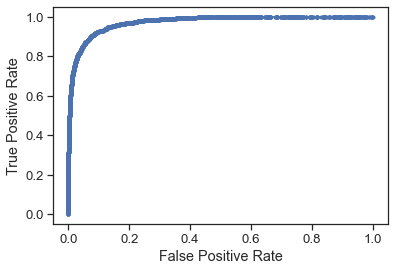

AUROC: 0.973
Best Threshold: 0.312420


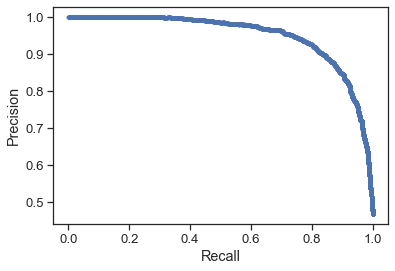

Best Threshold: 0.466166


In [207]:
# plot_roc_curve(gb, gb_X_train_resampled, gb_y_train_resampled)
# plot_pr_curve(gb, gb_X_train_resampled, gb_y_train_resampled)

In [208]:
# # try different probability cutoff to be considered 1
# y_pred_proba = gb.predict_proba(gb_X_val)
# y_pred_pos = y_pred_proba[:,1]
# new_y_pred = []
# for p in y_pred_pos:
#     if p < 0.48:
#         new_y_pred.append(0)
#     else:
#         new_y_pred.append(1)
# metrics.f1_score(y_val, new_y_pred)

0.6885714285714286

In [209]:
# save final gb metrics
model_metrics.loc["GradientBoostingClassifier", :] = [89.83, 65.61, 72.70, 68.96, 69.10]

#### Histogram Gradient Boosting

In [211]:
# setup dataframes
hgb_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
hgb_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# retrieve indexes of categorical features (for SMOTENC)
categorical_indexes = []
for feature in ohc_df_feats:
    categorical_indexes.append(hgb_X_train.columns.get_loc(feature))

# benchmark results (train and validation)
hgb = HistGradientBoostingClassifier(
    categorical_features = categorical_indexes, 
    random_state = 123
)
evaluate_estimator(hgb, hgb_X_train, y_train, verbose = True)
hgb.fit(hgb_X_train, y_train)
y_pred = hgb.predict(hgb_X_val)
val_f1 = round(metrics.f1_score(y_val, y_pred)*100, 3)
print(f"F1 score (validation): {val_f1} %")

Metrics (training):
Accuracy: 89.662 %
Precision: 69.738 %
Recall: 59.409 %
F1 score: 64.094 %
F1 score (validation): 66.78 %


I. Test resamplers

In [212]:
# try different resamplers
hgb_resamplers = test_resamplers(hgb, hgb_X_train, hgb_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


In [213]:
# check resampling results
hgb_resamplers.sort_values("F1_train", ascending = False).head()

Resampler  Strategy  Accuracy  Precision  Recall  F1_train  \
4   RandomUnderSampler      0.35    89.092     63.065  72.289    67.334   
6    RandomOverSampler      0.45    89.307     64.301  70.413    67.186   
12   RandomOverSampler      0.65    88.623     61.023  74.491    67.065   
1   RandomUnderSampler      0.25    89.624     66.470  67.235    66.824   
9    RandomOverSampler      0.55    88.851     62.353  71.800    66.716   

    F1_val  
4   66.572  
6   68.006  
12  66.486  
1   68.246  
9   67.598

In [214]:
# confirming results with chosen resampling algorithmn
hgb_sampler = RandomOverSampler(sampling_strategy = 0.45, random_state = 123)
hgb = HistGradientBoostingClassifier(
    learning_rate = 0.1,
    categorical_features = categorical_indexes,
    random_state = 123
)
imba_pipeline = make_pipeline(
    hgb_sampler,
    hgb
)
evaluate_estimator(imba_pipeline, hgb_X_train, y_train, verbose = True)
hgb_X_train_resampled, hgb_y_train_resampled = hgb_sampler.fit_resample(hgb_X_train, y_train)
hgb.fit(hgb_X_train_resampled, hgb_y_train_resampled)
y_pred = hgb.predict(hgb_X_val)
print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 89.307 %
Precision: 64.301 %
Recall: 70.413 %
F1 score: 67.186 %
F1 score (validation): 68.01 %


II. Parameter Tuning

In [215]:
# perform grid search for the best parameters
skf = StratifiedKFold(3)

imba_pipeline = Pipeline(
    [("sampling", hgb_sampler),
    ("clf", hgb)]
)

hgb_params = {
    "clf__loss": ["auto", "binary_crossentropy"],
    "clf__learning_rate": [0.05, 0.1, 0.15, 0.2, 0.3],
    "clf__max_depth": [None, 2, 3, 4, 5, 6, 10],
    "clf__min_samples_leaf": [20, 50, 80, 100, 120]
}

clf = GridSearchCV(imba_pipeline, hgb_params, scoring = "f1", cv = skf, n_jobs = -1, verbose = 3).fit(hgb_X_train, y_train)
clf.best_params_

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


{'clf__learning_rate': 0.15,
 'clf__loss': 'auto',
 'clf__max_depth': 3,
 'clf__min_samples_leaf': 20}

In [216]:
# tweaking parameters, checking model performance
hgb = HistGradientBoostingClassifier(
    learning_rate = 0.15,
    max_depth = 3,
    loss = "auto",
    min_samples_leaf = 20,
    categorical_features = categorical_indexes,
    random_state = 123
)
imba_pipeline = make_pipeline(
    hgb_sampler,
    hgb
)
evaluate_estimator(imba_pipeline, hgb_X_train, y_train, verbose = True)
hgb_X_train_resampled, hgb_y_train_resampled = hgb_sampler.fit_resample(hgb_X_train, y_train)
hgb.fit(hgb_X_train_resampled, hgb_y_train_resampled)
y_pred = hgb.predict(hgb_X_val)
print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

Metrics (training):
Accuracy: 89.193 %
Precision: 62.818 %
Recall: 75.22 %
F1 score: 68.407 %
F1 score (validation): 69.25 %


In [217]:
model_metrics.loc["HistGradientBoostingClassifier", :] = [89.19, 62.82, 75.22, 68.41, 69.25]

In [218]:
# plot best metrics obtained for each model
model_metrics.reset_index(inplace = True)
model_metrics.rename(columns = {"index": "Model"}, inplace = True)
model_metrics = model_metrics.sort_values("F1 (train)", ascending = False)

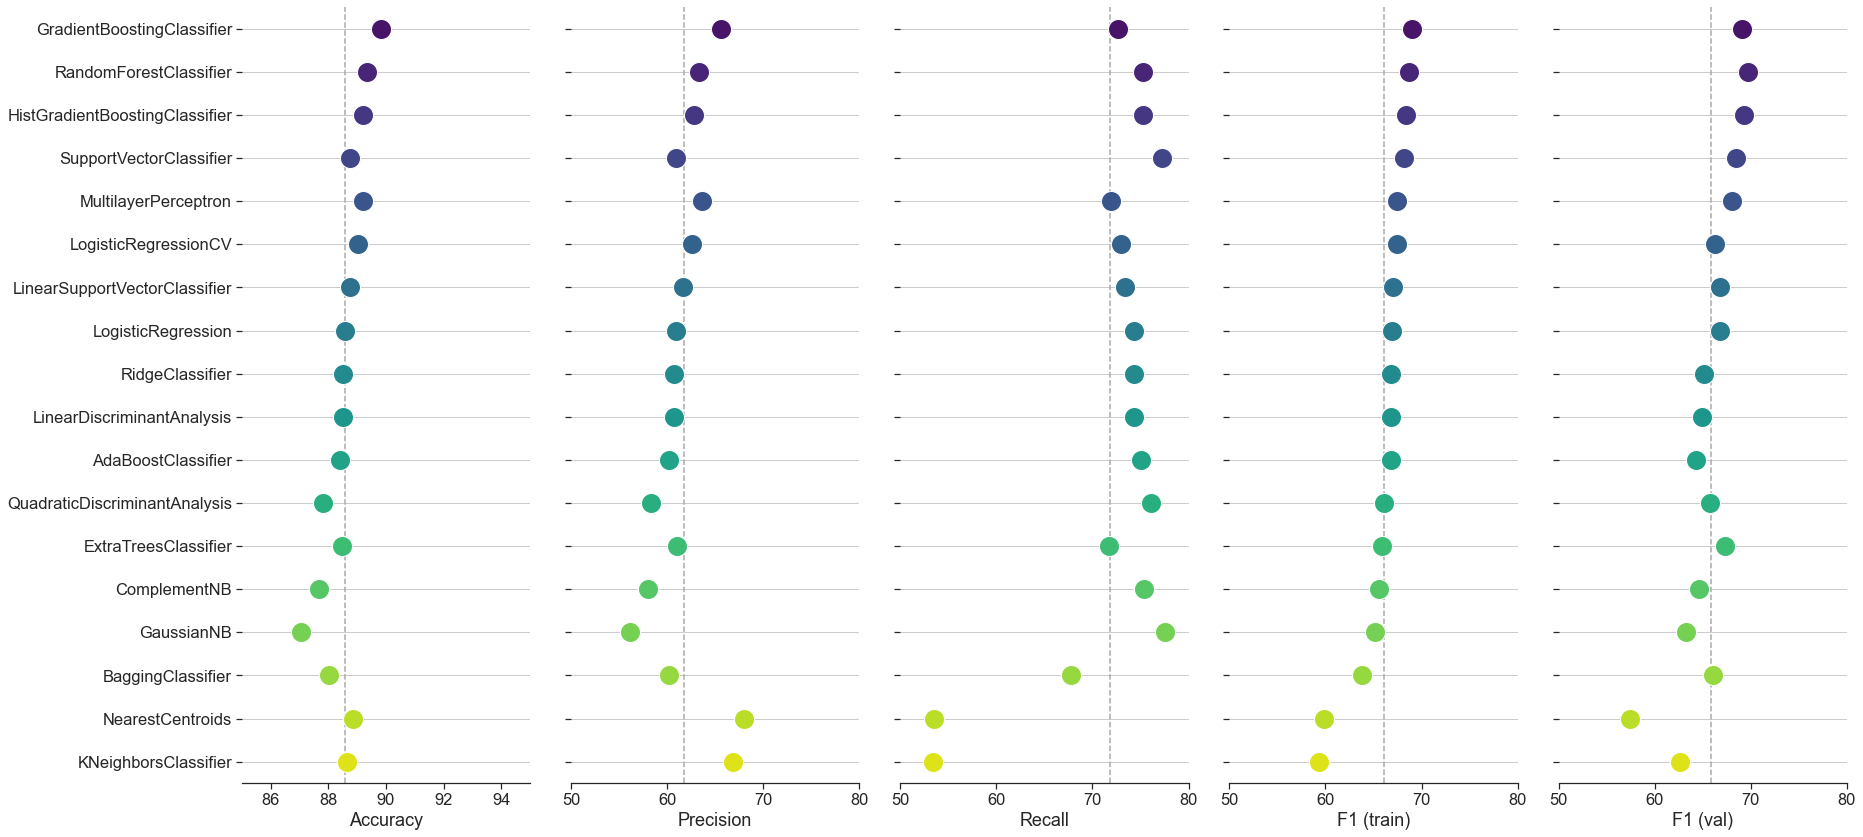

In [233]:
# ref: https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# ref: https://stackoverflow.com/questions/59707483/adjust-the-grid-x-axis-scale-and-y-axis-scale-in-pairgrid-method-of-seaborn

lims = ([85, 95], [50, 80], [50, 80], [50, 80], [50, 80])
means = (
    model_metrics.Accuracy.mean(),
    model_metrics.Precision.mean(),
    model_metrics.Recall.mean(),
    model_metrics["F1 (train)"].mean(),
    model_metrics["F1 (val)"].mean()
)

sns.set(style = "ticks", font_scale = 1.5)

g = sns.PairGrid(
    model_metrics,
    x_vars = ["Accuracy", "Precision", "Recall", "F1 (train)", "F1 (val)"],
    y_vars = "Model",
    height = 12,
    aspect = 0.4
)
g.map(
    sns.stripplot,
    size = 10,
    orient = "h",
    jitter = False,
    palette = "viridis",
    linewidth = 1,
    edgecolor = "w",
    s = 20
)

g.set(ylabel = "")

for ax, xlims, mean in zip(g.axes.flat, lims, means):
    ax.set_xlim(xlims)
    ax.axvline(mean, linestyle = "--", c = "darkgray")
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left = True, bottom = False)

plt.savefig('Fig10_ModelBestMetrics.jpeg', dpi=300, bbox_inches='tight')

#### Stacking

In [220]:
# setting up dataframes
s_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
s_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# get categorical feature indexes
categorical_indexes = []
for feature in ohc_df_feats:
    categorical_indexes.append(s_X_train.columns.get_loc(feature))

In [230]:
# 
skf = StratifiedKFold(5)
s_resampler = RandomOverSampler(0.55, random_state = 123)
estimators = [
    ("rf", RandomForestClassifier(n_estimators = 250, criterion = "entropy", max_depth = 12, min_samples_leaf = 5, random_state = 123)),
    ("hgb", HistGradientBoostingClassifier(learning_rate = 0.1, loss = "auto", categorical_features = categorical_indexes, random_state = 123)),
    ("svc", SVC(C = 1, random_state = 123)),
]

sclf = StackingClassifier(
    estimators = estimators,
    cv = skf,
    final_estimator = LogisticRegression(random_state = 123)
)

imba_pipeline = make_pipeline(
    s_resampler,
    sclf
)

evaluate_estimator(imba_pipeline, s_X_train, y_train, True)

# resample and get metrics for the validation set
# gb_X_train_resampled, gb_y_train_resampled = gb_resampler.fit_resample(gb_X_train, y_train)
sclf.fit(s_X_train, y_train)
y_pred = sclf.predict(s_X_val)
print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)}")

Metrics (training):
Accuracy: 88.825 %
Precision: 63.664 %
Recall: 65.767 %
F1 score: 64.649 %
F1 score (validation): 68.44


#### Voting

In [222]:
# setting up dataframes
v_X_train = X_train_ohc_scaled[metric_features_log + ohc_df_feats]
v_X_val = X_val_ohc_scaled[metric_features_log + ohc_df_feats]

# get categorical feature indexes
categorical_indexes = []
for feature in ohc_df_feats:
    categorical_indexes.append(v_X_train.columns.get_loc(feature))

In [223]:
voting_resampler = RandomOverSampler(sampling_strategy = 0.50, random_state = 123)

# setup estimators
clf1 = SVC(probability = True, C = 1, random_state = 123)
clf2 = RandomForestClassifier(n_estimators = 200, criterion = "gini", max_depth = 20, min_samples_leaf = 5, random_state = 123)
clf3 = HistGradientBoostingClassifier(learning_rate = 0.10, loss = "auto", categorical_features = categorical_indexes, random_state = 123)
# clf4 = MLPClassifier(hidden_layer_sizes = (4), random_state = 123)

# hard voting
print("======= Hard voting =======")
vclf_hard = VotingClassifier(estimators = [
    ("svc", clf1), ("rf", clf2), ("hgb", clf3)], voting = "hard"
)
imba_pipeline = make_pipeline(
    voting_resampler,
    vclf_hard
)
evaluate_estimator(imba_pipeline, v_X_train, y_train, verbose = True)
v_X_train_resampled, v_y_train_resampled = voting_resampler.fit_resample(v_X_train, y_train)
vclf_hard.fit(v_X_train_resampled, v_y_train_resampled)
y_pred = vclf_hard.predict(v_X_val)
print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

# soft voting
print("======= Soft voting =======")
vclf_soft = VotingClassifier(estimators = [
    ("svc", clf1), ("rf", clf2), ("hgb", clf3)], voting = "soft"
)
imba_pipeline = make_pipeline(
    voting_resampler,
    vclf_soft
)
evaluate_estimator(imba_pipeline, v_X_train, y_train, verbose = True)
v_X_train_resampled, v_y_train_resampled = voting_resampler.fit_resample(v_X_train, y_train)
vclf_soft.fit(v_X_train_resampled, v_y_train_resampled)
y_pred = vclf_soft.predict(v_X_val)
print(f"F1 score (validation): {round(metrics.f1_score(y_val, y_pred)*100, 2)} %")

GradientBoostingClassifier(
    n_estimators = 50,
    learning_rate = 0.10,
    max_depth = 6,
    # min_samples_split = 5,
    min_samples_leaf = 5,
    subsample = 0.8,
    random_state = 123
)

======= Hard voting =======
Metrics (training):
Accuracy: 89.383 %
Precision: 63.573 %
Recall: 74.734 %
F1 score: 68.67 %
F1 score (validation): 69.1 %
======= Soft voting =======
Metrics (training):
Accuracy: 89.358 %
Precision: 63.422 %
Recall: 74.897 %
F1 score: 68.658 %
F1 score (validation): 69.19 %


GradientBoostingClassifier(max_depth=6, min_samples_leaf=5, n_estimators=50,
                           random_state=123, subsample=0.8)

In [224]:
# retrieve indexes of categorical features
voting_resamplers = test_resamplers(vclf_hard, v_X_train, v_X_val, y_train, y_val, categorical_indexes, verbose = True)

Iteration 1/15 done
Iteration 2/15 done
Iteration 3/15 done
Iteration 4/15 done
Iteration 5/15 done
Iteration 6/15 done
Iteration 7/15 done
Iteration 8/15 done
Iteration 9/15 done
Iteration 10/15 done
Iteration 11/15 done
Iteration 12/15 done
Iteration 13/15 done
Iteration 14/15 done
Iteration 15/15 done


# Kaggle submission

In [229]:
# voting submission hard
features = metric_features_log+ohc_df_feats
resampler = RandomOverSampler(sampling_strategy = 0.50, random_state = 123)

clf1 = SVC(probability = True, C = 1, random_state = 123)
clf2 = RandomForestClassifier(n_estimators = 200, criterion = "gini", max_depth = 20, min_samples_leaf = 5, random_state = 123)
clf3 = HistGradientBoostingClassifier(learning_rate = 0.10, loss = "auto", categorical_features = categorical_indexes, random_state = 123)
# clf4 = MLPClassifier(hidden_layer_sizes = (4), random_state = 123)
model = VotingClassifier(estimators = [
    ("svc", clf1), ("rf", clf2), ("hgb", clf3)], voting = "hard")

data_submission = data_ohc_scaled[features]
test_data_submission = test_ohc_scaled[features]
###
data_submission_resampled, target_resampled = resampler.fit_resample(data_submission, target)
model.fit(data_submission_resampled, target_resampled)
prediction=model.predict(test_data_submission)
submission=pd.read_csv("sample_submission.csv")
submission.set_index("Access_ID",inplace=True)
submission.Buy=prediction
submission.to_csv("Group30_GodSaveTheQueen.csv")
print(Counter(submission.Buy))
submission

Counter({0: 1893, 1: 407})


Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    1
...        ...
962042726    0
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [226]:
# # voting submission soft
# features = metric_features_log+ohc_df_feats
# resampler = RandomOverSampler(sampling_strategy = 0.55, random_state = 123)

# clf1 = SVC(probability = True, C = 1, random_state = 123)
# clf2 = RandomForestClassifier(n_estimators = 250, criterion = "entropy", max_depth = 12, min_samples_leaf = 5, random_state = 123)
# clf3 = HistGradientBoostingClassifier(learning_rate = 0.1, loss = "auto", categorical_features = categorical_indexes, random_state = 123)
# # clf4 = MLPClassifier(random_state = 123)
# model = VotingClassifier(estimators = [
#     ("svc", clf1), ("rf", clf2), ("hgb", clf3)], voting = "soft")

# data_submission = data_ohc_scaled[features]
# test_data_submission = test_ohc_scaled[features]
# ###
# data_submission_resampled, target_resampled = resampler.fit_resample(data_submission, target)
# model.fit(data_submission_resampled, target_resampled)
# prediction=model.predict(test_data_submission)
# submission=pd.read_csv("sample_submission.csv")
# submission.set_index("Access_ID",inplace=True)
# submission.Buy=prediction
# submission.to_csv("Group30_VersionVotingsoft.csv")
# print(Counter(submission.Buy))
# submission

Counter({0: 1883, 1: 417})


Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    1
...        ...
962042726    0
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [227]:
# # best submission RFC
# features = metric_features_log+ohc_df_feats
# resampler = RandomOverSampler(sampling_strategy = 0.55, random_state = 123)
# model = RandomForestClassifier(
#     n_estimators = 200,
#     criterion = "gini",
#     max_depth = 20,
#     min_samples_leaf = 5,
#     class_weight = None,
#     random_state = 123
# )

# data_submission = data_ohc_scaled[features]
# test_data_submission = test_ohc_scaled[features]
# ###
# data_submission_resampled, target_resampled = resampler.fit_resample(data_submission, target)
# model.fit(data_submission_resampled, target_resampled)
# prediction=model.predict(test_data_submission)
# submission=pd.read_csv("sample_submission.csv")
# submission.set_index("Access_ID",inplace=True)
# submission.Buy=prediction
# submission.to_csv("Group30_VersionRFCtest.csv")
# print(Counter(submission.Buy))
# submission

Counter({0: 1896, 1: 404})


Buy
Access_ID     
798519314    0
798663101    0
798663221    0
798760918    0
798856982    1
...        ...
962042726    0
962063064    0
962147749    1
962182167    0
962218682    0

[2300 rows x 1 columns]

In [228]:
# # best submission HGB
# features = metric_features_log+categorical_feats
# resampler = SMOTENC(categorical_indexes, sampling_strategy = 0.45, k_neighbors = 3, random_state = 123)
# model = HistGradientBoostingClassifier(
#     learning_rate = 0.1,
#     categorical_features = categorical_indexes,
#     random_state = 123
# )
# data_submission = data_scaled[features]
# test_data_submission = test_scaled[features]
# ###
# data_submission_resampled, target_resampled = resampler.fit_resample(data_submission, target)
# model.fit(data_submission_resampled, target_resampled)
# prediction=model.predict(test_data_submission)
# submission=pd.read_csv("sample_submission.csv")
# submission.set_index("Access_ID",inplace=True)
# submission.Buy=prediction
# submission.to_csv("Group30_VersionHGB2.csv")
# print(Counter(submission.Buy))
# submission

ValueError: Some of the categorical indices are out of range. Indices should be between 0 and 7

In [ ]:
# # submission GB
# features = metric_features_normal+ohc_df_feats
# resampler = RandomOverSampler(0.45, random_state = 123)
# model = GradientBoostingClassifier(
#     n_estimators = 50,
#     learning_rate = 0.10,
#     max_depth = 6,
#     # min_samples_split = 5,
#     min_samples_leaf = 5,
#     subsample = 0.8,
#     random_state = 123
# )
# data_submission = data_ohc_scaled[features]
# test_data_submission = test_ohc_scaled[features]
# ###
# data_submission_resampled, target_resampled = resampler.fit_resample(data_submission, target)
# model.fit(data_submission_resampled, target_resampled)
# prediction=model.predict(test_data_submission)
# submission=pd.read_csv("sample_submission.csv")
# submission.set_index("Access_ID",inplace=True)
# submission.Buy=prediction
# submission.to_csv("Group30_VersionGBtest.csv")
# print(Counter(submission.Buy))
# submission

In [ ]:
# # submissions for SVC
# features = metric_features_log + ohc_df_feats
# resampler = SMOTENC(categorical_indexes, sampling_strategy = 0.45, random_state = 123)
# model = SVC(
#     kernel = "rbf",
#     C = 10,
#     gamma = "auto",
#     class_weight = {0: 0.8, 1: 1.},
#     random_state = 123
# )

# data_submission = data_ohc_scaled[features]
# test_data_submission = test_ohc_scaled[features]
# ###
# data_submission_resampled, target_resampled = resampler.fit_resample(data_submission, target)
# model.fit(data_submission_resampled, target_resampled)
# prediction=model.predict(test_data_submission)
# submission=pd.read_csv("sample_submission.csv")
# submission.set_index("Access_ID",inplace=True)
# submission.Buy=prediction
# submission.to_csv("Group30_VersionSVC.csv")
# print(Counter(submission.Buy))
# submission